In [1]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Methods
from sklearn.svm import SVC # support vector classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR # support vector regression
from sklearn.ensemble import RandomForestRegressor

# Adv
from sklearn.pipeline import Pipeline


# import Keras packages for ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

# Daten

Bei der Bekanntgabe der dritten Prüfungsleistung war mir schnell klar, wo und nach welchen Daten ich suchen möchte. Ich komme gebürtig aus Koblenz und lebe auch momentan wieder hier und wollte deshalb Daten mit Heimatbezug verwenden. Der erste Gedanke war eine Zeitreihenanalyse zu erstellen, um den Grundwasserstand zu beziehen. Doch leider gab es hier seitens der DWD keine verwertbaren Daten. Auf der weiteren Suche nach Daten sind im Umweltportal des Landes Rheinland-Pfalz drei verschiedene Datensätze zu Wasserstände und Abflüsse, Grundwasser (Chemie) und Grundwasserstände vorhanden.
Deshalb habe ich mich dazu entschieden herauszufinden, ob die Daten zur Grundwasserchemie ausreichen, um den Chloridgehalt anhand einer Regression mit verschiedenen Methoden vorherzusagen. 
Den Chloridgehalt wurde ausgewählt, da ich vor ein paar Jahren ein Praktikum im Wasserwerk Koblenz absolvierte und von der Problematik erhöhter Chloridgehalte mitbekommen habe. Zwar gibt es einige Ansätze, woher dieses Problem stammen könnte, doch die Fragestellung reizt mich sehr, um ein künstliches neuronales Netz darauf anzuwenden. 

Die Daten wurden vom Ministerium für Klimaschutz, Umwelt,
Energie und Mobilität Rheinland-Pfalz bezogen, aus: https://wasserportal.rlp-umwelt.de/servlet/is/1500/


In [2]:
# Loading the data 
filename = 'Messwerte_Koblenz.csv'
data = pd.read_csv(filename, delimiter=',')
data

,Wassertemperatur,pH-Wert,elektrische Leitfähigkeit bei 25 °C,Natrium,Kalium,Magnesium,Calcium,Kieselsäure als Si,Bor,Nitrat,Nitrit,Ammonium,Gesamtphosphor als P,Sauerstoffgehalt,Sulfat,DOC,Chlorid
0,12.2,6.1,232.0,45.30,5.70,16.0,86.0,11.1,0.12,0.5,0.02,0.35,0.04,5.0,94.4,0.40,37
1,12.6,7.1,75.0,45.80,4.30,15.6,95.0,3.4,0.07,17.2,0.02,0.02,0.02,8.2,70.4,1.00,110
2,11.4,7.0,80.0,41.84,4.90,14.0,89.1,3.1,0.07,18.7,0.03,0.02,0.02,5.1,63.7,1.20,127
3,15.7,7.1,81.0,41.00,4.39,14.0,86.0,2.8,0.09,16.2,0.02,0.01,0.03,6.6,73.7,1.10,113
4,12.2,7.1,79.0,43.70,4.51,14.0,86.0,3.4,0.07,38.9,0.02,0.03,0.02,4.5,61.6,1.30,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,12.4,7.1,76.0,47.00,5.20,14.0,87.0,NaN,0.12,14.1,0.01,0.02,NaN,5.3,78.4,0.70,116
105,11.9,7.0,86.0,49.00,5.30,16.0,93.0,NaN,0.05,17.3,0.02,0.02,NaN,4.6,70.0,0.80,143
106,13.2,7.0,73.0,42.00,4.60,13.0,80.0,NaN,0.07,16.5,0.01,0.02,NaN,4.6,77.0,0.80,115
107,12.4,7.1,80.0,49.00,5.40,16.0,97.0,NaN,NaN,16.5,0.01,0.02,NaN,5.2,77.0,0.70,119


Der Datensatz weißt einige Lücken auf und im ML Kontext ein eher kleiner Datensatz, gerade für ein KNN. Allerdings lassen sich keine anderen Daten im Netz auffinden und auch die Behörden scheinen keine genaue Pflege dieser Datensätze zu betreiben. Die letzten Einträge stammen aus 2019. Da ich aber unbedingt mit Daten aus meiner Heimat arbeiten wollte habe ich mich trotzdem dazu entschieden, diesen Datensatz zu nehmen. 
Aber auf Grund der Tatsache, dass die Werte aus den gleichen Messstellen komme, habe ich mich dazu entschieden die fehlenden Werte mit dem mean zu ersetzen, um eine größere Datenmenge zu Verfügung zu haben. 

In [3]:
#displaceing of NAN's with mean
data =data.fillna(data.mean())
#verify the data
data.isnull().sum()

Wassertemperatur                       0
pH-Wert                                0
elektrische Leitfähigkeit bei 25 °C    0
Natrium                                0
Kalium                                 0
Magnesium                              0
Calcium                                0
Kieselsäure als Si                     0
Bor                                    0
Nitrat                                 0
Nitrit                                 0
Ammonium                               0
Gesamtphosphor als P                   0
Sauerstoffgehalt                       0
Sulfat                                 0
DOC                                    0
Chlorid                                0
dtype: int64

# KNN zur Vorhersage des Chloridgehaltes

Im folgenden wird ein KNN aufgesetzt und probiert die Chlroidgehalte anhand der anderen Parameter vorherzusagen. Ich habe mich für ein KNN entschieden, weil es in der Lage sein könnte nicht bekannte Beziehungen zum Chloridgehalt in einer normaler Fluidanalyse zu erkennen. Normalerweise werden andere Parameter benutzt um den Chloridgehalt zu interpolieren wie die mittlere Grundwasserhöhe, mittlere Grundwasserfließrichtung und die Distanz zum Rhein. 
(Liesch, Tanja. Ermittlung der Grundwassergefährdung mit Hilfe künstlicher neuronaler Netze. Lehrstuhl für Angewandte Geologie der Univ., 2006.) In dieser Region des Mittelrheins 
könnte normalerweise auch die Distanz zur Mosel als Parameter mit in die Bewertung miteinfließen. Aber um eine andere Herangehensweise zu testen wurde die Fluidchemie ausgewählt. 

Um bestimmte Beziehungen zwischen einer abhängingen und einer oder mehreren unabhängigen Variablen zu modellieren, eignet sich eine Regression. Neben dem künstlichen neuronalen Netz werden auch andere Methoden (Support Vector Machine und Regression Forrest) angewendet und miteinander verglichen. 

Im ersten Schritt werden die Daten gesplittet und skaliert. Ich wähle die Standardisierung, die für Regressionsprobleme gut geeignet ist. Der Scaler wird erst an die Daten des Trainings-Set gefittet. Anschließend werden sowohl Trainings-Set, Validation-Set und Test-Set transformiert.

In [4]:
#splitting the data into train, test and validationsets 
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

from sklearn.model_selection import train_test_split

temp, test = train_test_split(data, test_size=0.2, random_state=27)

train, val = train_test_split(temp, test_size=0.1, random_state=27)

print('Größe Trainings-Set: ', train.shape)
print('Größe Validation-Set: ', val.shape)
print('Größe Test-Set: ', test.shape)

Größe Trainings-Set:  (78, 17)
Größe Validation-Set:  (9, 17)
Größe Test-Set:  (22, 17)


In [5]:
#scaling of the data 
scaler = StandardScaler()
scaler.fit(train)

train = scaler.transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

In [6]:
X_train = train[:, :-1] # for all but last column --> Input variables
y_train = train[:, -1] # for last column --> Target variable

X_val = val[:, :-1] # for all but last column --> Input variables
y_val = val[:, -1] # for last column --> Target variable

X_test = test[:, :-1] # for all but last column --> Input variables
y_test = test[:, -1] # for last column --> Target variable

Anschließend erstelle ich ein einfaches neuronales Netz mit einer Eingabeschicht, einer verdeckten Schicht mit 10 Neuronen und einer Ausgabeschicht mit einem Neuron für den Zielwert Chlorid.

Die anderen Hyperparameter des Modells werden erstmal wahllos ausgewählt und bei der späteren Hyperparameteroptimierung überprüft. Als Aktivierungsfunktion verwende ich für die verdeckte Schicht "ReLu", was für Regressionsprobleme in der Regel gut funktioniert. Der Adam-Optimizer ist aus erfahrungsgemäß oft geeignet für derartige Probleme. Als loss-Funktion kommt für die Regression der mean squared error zum Einsatz.

Nach dem eigentlichen Training wird eine Vorhersage mit den validation-Inputs ausgeführt, um einen Hinweis dafür zu bekommen, wie gut das Modell ist.

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoc

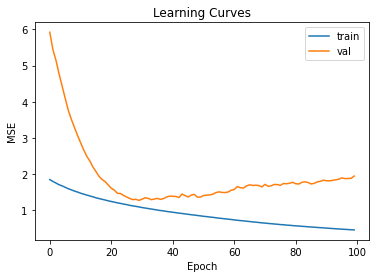

In [7]:
#for reproductivity setting seeds
seed(1)
tf.random.set_seed(2)

# determine the number of input features
n_features = X_train.shape[1]

# set initializer
kernel_initializer = initializers.glorot_uniform()

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer=kernel_initializer, input_shape=(n_features,)))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=3, validation_data=(X_val,y_val))

# predict test set
yhat = model.predict(X_val)

# evaluate predictions
score = mean_squared_error(y_val, yhat)
print('MSE: %.3f' % score)

# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Man sieht, dass ab etwa 30 Epochen ein Overfitting eintritt. Um dies zu verhindern wird die Technik des Early Stoppings verwerdendet, die im Folgenden Code implentiert wird. 


Train on 78 samples, validate on 9 samples
Epoch 1/100
78/78 [==============================] - 1s 16ms/sample - loss: 1.8502 - val_loss: 5.9223
Epoch 2/100
78/78 [==============================] - 0s 1ms/sample - loss: 1.7988 - val_loss: 5.4493
Epoch 3/100
78/78 [==============================] - 0s 1ms/sample - loss: 1.7543 - val_loss: 5.1483
Epoch 4/100
78/78 [==============================] - 0s 2ms/sample - loss: 1.7074 - val_loss: 4.7777
Epoch 5/100
78/78 [==============================] - 0s 3ms/sample - loss: 1.6759 - val_loss: 4.4386
Epoch 6/100
78/78 [==============================] - 0s 2ms/sample - loss: 1.6368 - val_loss: 4.1016
Epoch 7/100
78/78 [==============================] - 0s 2ms/sample - loss: 1.5971 - val_loss: 3.7694
Epoch 8/100
78/78 [==============================] - 0s 2ms/sample - loss: 1.5663 - val_loss: 3.5182
Epoch 9/100
78/78 [==============================] - 0s 2ms/sample - loss: 1.5325 - val_loss: 3.2956
Epoch 10/100
78/78 [===========================

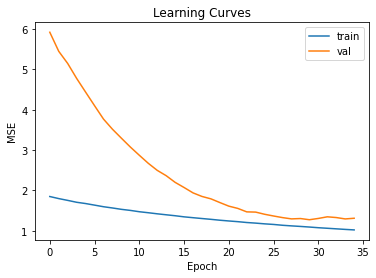

In [8]:
# import packages
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot

seed(1)
tf.random.set_seed(2)

# determine the number of input features
n_features = X_train.shape[1]

# set initializer
kernel_initializer = initializers.glorot_uniform()

# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer=kernel_initializer, input_shape=(n_features,)))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_val,y_val),
                    callbacks=[es])

# predict test set
yhat = model.predict(X_val)

# evaluate predictions
score = mean_squared_error(y_val, yhat)
print('MSE: %.3f' % score)

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MSE')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

### kfold Crossvalidation
Um nun zu testen, wie robust die Vorhersage ist, wird das Ganze mit einer kfold crossvalidation wiederholt. Hierfür werden die Daten in jeweils 90% Trainings- und 10% Validierungsdaten geteilt. Das Training und die Validation werden anschließend in einer Schleife ausgeführt.

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping
MSE: 1.111


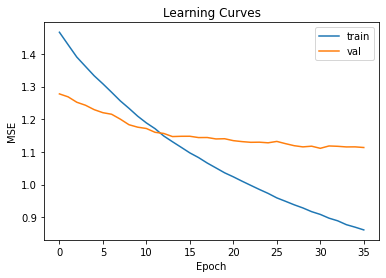

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping
MSE: 1.269


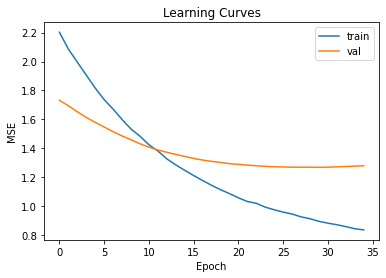

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoc

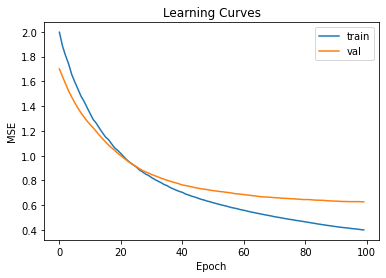

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
MSE: 0.781


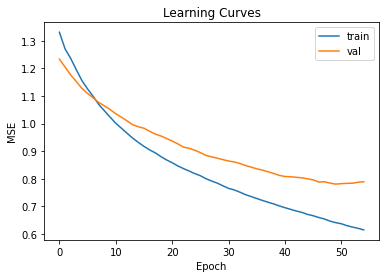

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
MSE: 0.398


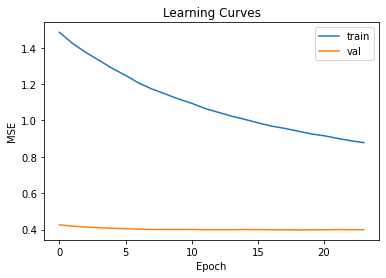

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoc

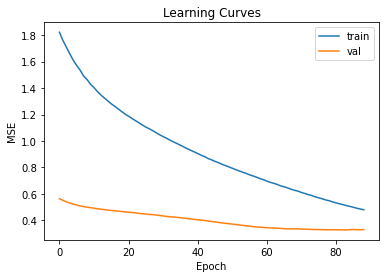

Train on 78 samples, validate on 9 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Restoring model weights from the end of the best epoch.
Epoch 00063: early stopping
MSE: 0.190


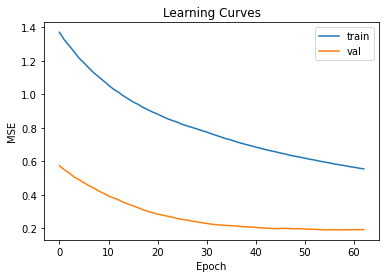

Train on 79 samples, validate on 8 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoc

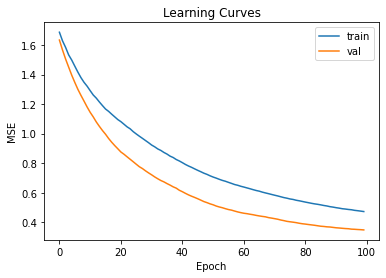

Train on 79 samples, validate on 8 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
MSE: 1.248


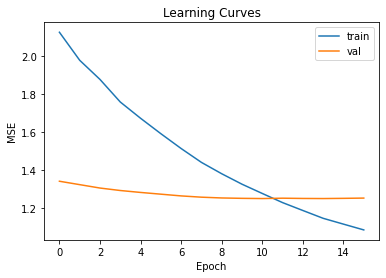

Train on 79 samples, validate on 8 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoc

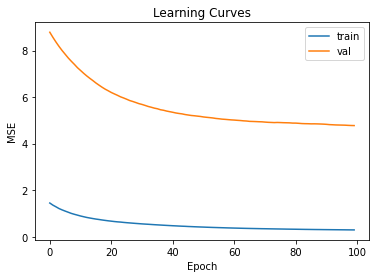

Mean MSE: 1.108 (1.279)


In [9]:
seed(1)
tf.random.set_seed(2)

temp, test = train_test_split(data, test_size=0.2, random_state=27)

scaler = StandardScaler()
scaler.fit(temp)

temp = scaler.transform(temp)
test = scaler.transform(test)

X, y = temp[:, :-1], temp[:, -1]

X_test, y_test = test[:, :-1], test[:, -1]


# prepare cross validation
from numpy import mean
from numpy import std

kfold = KFold(10, shuffle=True, random_state=27)

# enumerate splits
scores = list()


for train_ix, val_ix in kfold.split(X, y):
    # split data
    X_train, X_val, y_train, y_val = X[train_ix], X[val_ix], y[train_ix], y[val_ix]
    # determine the number of input features
    n_features = X.shape[1]
    # set initializer
    kernel_initializer = initializers.glorot_uniform
    
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer=kernel_initializer, input_shape=(n_features,)))
    model.add(Dense(1))

    # compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=3, validation_data=(X_val,y_val),
                       callbacks=[es])

    # predict test set
    yhat = model.predict(X_val)
    score = mean_squared_error(y_val, yhat)
    print('MSE: %.3f' % score)
    scores.append(score)
    
    # plot learning curves
    pyplot.title('Learning Curves')
    pyplot.xlabel('Epoch')
    pyplot.ylabel('MSE')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='val')
    pyplot.legend()
    pyplot.show()


# summarize all scores
print('Mean MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Man kann erkennen, dass sich sowohl der Verlauf der Lernkurven als auch die Performance, in Form des MSE, der einzelnen Durchläufe zum Teil stark unterscheidet. Das kann zum Einen von den unterschiedlichen Initialisierungen und zum Anderem von der Aufteilung des Datensatzes abhängen. 

Man kann die kfold-Crossvalidation dazu nutzen, die mittlere Performance des Modells zu betrachten. 

### Hyperparameteroptimierung

In diesem Schritt werden die Hyperparameter, wie die Batchsize, Lernregel etc. optimiert, indem viele mögliche Kombinationen getestet werden. Eine Variante wäre die sogenannte GridSearchCV mit der man die beste Variante des Modells finden kann. Allerdings ist es nicht die effizienteste Methode, da sie viel Zeit und Rechenleistung benötigt. Aus diesem Grund habe ich mich dazu entschieden eine RandomsearchCV durchzuführen. Hier werden eine definierte Anzahl an zufällig gewählten Kombination aus dem vorgegebenen Parameter-Space getestet. Allerdings ist nicht garantiert, dass die absolut beste Kombination gefunden wird, jedoch liefert es meistens bei einem geringeren Rechenaufwand schon ganz brauchbare Hinweise, welche Kombinationen gut funktionieren und welche nicht.

In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

seed(1)
tf.random.set_seed(2)

def baseline_model(optimizer='adam', neurons=5, activation='relu'):
   
    # define model
    model = Sequential()
    model.add(Dense(neurons, activation=activation, kernel_initializer='glorot_uniform', input_shape=(n_features,)))
    model.add(Dense(1))

    # compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

# import, split and scale data
temp, test = train_test_split(data, test_size=0.2, random_state=27)

scaler = StandardScaler()
scaler.fit(temp)

temp = scaler.transform(temp)
test = scaler.transform(test)

X, y = temp[:, :-1], temp[:, -1]

    
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=16, verbose=1)

# grid search epochs, batch size and optimizer
neurons = [5,10, 15, 17,50, 100]
optimizers = ['rmsprop', 'adam', 'SGD', 'Adagrad']
epochs = [30, 50, 70, 100, 200]
batches = [8, 16, 32]

param_grid = dict(neurons=neurons, optimizer=optimizers,
epochs=epochs,
batch_size=batches)

grid = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, scoring='neg_mean_squared_error', n_iter=50)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Using TensorFlow backend.


Train on 69 samples
Epoch 1/30
69/69 [==============================] - 1s 11ms/sample - loss: 1.3206
Epoch 2/30
69/69 [==============================] - 0s 254us/sample - loss: 1.2121
Epoch 3/30
69/69 [==============================] - 0s 376us/sample - loss: 1.1444
Epoch 4/30
69/69 [==============================] - 0s 243us/sample - loss: 1.0876
Epoch 5/30
69/69 [==============================] - 0s 171us/sample - loss: 1.0402
Epoch 6/30
69/69 [==============================] - 0s 258us/sample - loss: 1.0145
Epoch 7/30
69/69 [==============================] - 0s 241us/sample - loss: 0.9746
Epoch 8/30
69/69 [==============================] - 0s 171us/sample - loss: 0.9513
Epoch 9/30
69/69 [==============================] - 0s 241us/sample - loss: 0.9294
Epoch 10/30
69/69 [==============================] - 0s 220us/sample - loss: 0.9065
Epoch 11/30
69/69 [==============================] - 0s 339us/sample - loss: 0.8838
Epoch 12/30
69/69 [==============================] - 0s 298us/samp

70/70 [==============================] - 0s 138us/sample - loss: 0.6028
Epoch 25/30
70/70 [==============================] - 0s 137us/sample - loss: 0.5957
Epoch 26/30
70/70 [==============================] - 0s 129us/sample - loss: 0.5805
Epoch 27/30
70/70 [==============================] - 0s 159us/sample - loss: 0.5737
Epoch 28/30
70/70 [==============================] - 0s 140us/sample - loss: 0.5644
Epoch 29/30
70/70 [==============================] - 0s 159us/sample - loss: 0.5503
Epoch 30/30
17/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 496us/sample - loss: 1.2468
Epoch 13/70
69/69 [==============================] - 0s 236us/sample - loss: 1.2315
Epoch 14/70
69/69 [==============================] - 0s 270us/sample - loss: 1.2152
Epoch 15/70
69/69 [==============================] - 0s 348us/sample - loss: 1.1986
Epoch 16/70
69/69 [==============================] - 0s 271us/sample - loss: 1.1851
Epoch 17/70
69/69 [==============================] - 0s 353us/sample - loss: 1.1691
Epoch 18/70
69/69 [==============================] - 0s 255us/sample - loss: 1.1543
Epoch 19/70
69/69 [==============================] - 0s 166us/sample - loss: 1.1416
Epoch 20/70
69/69 [==============================] - 0s 150us/sample - loss: 1.1274
Epoch 21/70
69/69 [==============================] - 0s 146us/sample - loss: 1.1140
Epoch 22/70
69/69 [==============================] - 0s 157us/sample - loss: 1.0996
Epoch 23/70
69/69 [==============================] - 0s 148us/sample - loss: 1.0860
Epoc

69/69 [==============================] - 0s 200us/sample - loss: 0.5082
Epoch 33/70
69/69 [==============================] - 0s 209us/sample - loss: 0.5001
Epoch 34/70
69/69 [==============================] - 0s 158us/sample - loss: 0.4943
Epoch 35/70
69/69 [==============================] - 0s 180us/sample - loss: 0.4863
Epoch 36/70
69/69 [==============================] - 0s 203us/sample - loss: 0.4804
Epoch 37/70
69/69 [==============================] - 0s 197us/sample - loss: 0.4737
Epoch 38/70
69/69 [==============================] - 0s 187us/sample - loss: 0.4682
Epoch 39/70
69/69 [==============================] - 0s 230us/sample - loss: 0.4625
Epoch 40/70
69/69 [==============================] - 0s 212us/sample - loss: 0.4573
Epoch 41/70
69/69 [==============================] - 0s 173us/sample - loss: 0.4534
Epoch 42/70
69/69 [==============================] - 0s 161us/sample - loss: 0.4478
Epoch 43/70
69/69 [==============================] - 0s 146us/sample - loss: 0.4426
Epoc

70/70 [==============================] - 0s 316us/sample - loss: 0.6888
Epoch 53/70
70/70 [==============================] - 0s 245us/sample - loss: 0.6826
Epoch 54/70
70/70 [==============================] - 0s 381us/sample - loss: 0.6763
Epoch 55/70
70/70 [==============================] - 0s 288us/sample - loss: 0.6710
Epoch 56/70
70/70 [==============================] - 0s 391us/sample - loss: 0.6637
Epoch 57/70
70/70 [==============================] - 0s 250us/sample - loss: 0.6575
Epoch 58/70
70/70 [==============================] - 0s 214us/sample - loss: 0.6513
Epoch 59/70
70/70 [==============================] - 0s 159us/sample - loss: 0.6456
Epoch 60/70
70/70 [==============================] - 0s 220us/sample - loss: 0.6394
Epoch 61/70
70/70 [==============================] - 0s 139us/sample - loss: 0.6331
Epoch 62/70
70/70 [==============================] - 0s 164us/sample - loss: 0.6268
Epoch 63/70
70/70 [==============================] - 0s 221us/sample - loss: 0.6223
Epoc

Train on 70 samples
Epoch 1/70
70/70 [==============================] - 1s 16ms/sample - loss: 3.1738
Epoch 2/70
70/70 [==============================] - 0s 150us/sample - loss: 3.0319
Epoch 3/70
70/70 [==============================] - 0s 169us/sample - loss: 2.9178
Epoch 4/70
70/70 [==============================] - 0s 246us/sample - loss: 2.7937
Epoch 5/70
70/70 [==============================] - 0s 325us/sample - loss: 2.6818
Epoch 6/70
70/70 [==============================] - 0s 305us/sample - loss: 2.5729
Epoch 7/70
70/70 [==============================] - 0s 472us/sample - loss: 2.4849
Epoch 8/70
70/70 [==============================] - 0s 521us/sample - loss: 2.3847
Epoch 9/70
70/70 [==============================] - 0s 475us/sample - loss: 2.2910
Epoch 10/70
70/70 [==============================] - 0s 356us/sample - loss: 2.2140
Epoch 11/70
70/70 [==============================] - 0s 289us/sample - loss: 2.1352
Epoch 12/70
70/70 [==============================] - 0s 150us/samp

69/69 [==============================] - 0s 325us/sample - loss: 0.3151
Epoch 22/100
69/69 [==============================] - 0s 316us/sample - loss: 0.3019
Epoch 23/100
69/69 [==============================] - 0s 356us/sample - loss: 0.2848
Epoch 24/100
69/69 [==============================] - 0s 357us/sample - loss: 0.2678
Epoch 25/100
69/69 [==============================] - 0s 384us/sample - loss: 0.2575
Epoch 26/100
69/69 [==============================] - 0s 768us/sample - loss: 0.2419
Epoch 27/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.2287
Epoch 28/100
69/69 [==============================] - 0s 711us/sample - loss: 0.2168
Epoch 29/100
69/69 [==============================] - 0s 665us/sample - loss: 0.2045
Epoch 30/100
69/69 [==============================] - 0s 427us/sample - loss: 0.1939
Epoch 31/100
69/69 [==============================] - 0s 324us/sample - loss: 0.1845
Epoch 32/100
69/69 [==============================] - 0s 331us/sample - loss: 0.

69/69 [==============================] - 0s 619us/sample - loss: 0.2247
Epoch 12/100
69/69 [==============================] - 0s 333us/sample - loss: 0.2126
Epoch 13/100
69/69 [==============================] - 0s 336us/sample - loss: 0.1992
Epoch 14/100
69/69 [==============================] - 0s 332us/sample - loss: 0.1889
Epoch 15/100
69/69 [==============================] - 0s 373us/sample - loss: 0.1803
Epoch 16/100
69/69 [==============================] - 0s 311us/sample - loss: 0.1677
Epoch 17/100
69/69 [==============================] - 0s 306us/sample - loss: 0.1622
Epoch 18/100
69/69 [==============================] - 0s 362us/sample - loss: 0.1530
Epoch 19/100
69/69 [==============================] - 0s 359us/sample - loss: 0.1453
Epoch 20/100
69/69 [==============================] - 0s 345us/sample - loss: 0.1367
Epoch 21/100
69/69 [==============================] - 0s 324us/sample - loss: 0.1299
Epoch 22/100
69/69 [==============================] - 0s 313us/sample - loss: 

Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 13ms/sample - loss: 1.8119
Epoch 2/100
70/70 [==============================] - 0s 313us/sample - loss: 1.4064
Epoch 3/100
70/70 [==============================] - 0s 312us/sample - loss: 1.1970
Epoch 4/100
70/70 [==============================] - 0s 306us/sample - loss: 1.0362
Epoch 5/100
70/70 [==============================] - 0s 305us/sample - loss: 0.8971
Epoch 6/100
70/70 [==============================] - 0s 313us/sample - loss: 0.7559
Epoch 7/100
70/70 [==============================] - 0s 303us/sample - loss: 0.7058
Epoch 8/100
70/70 [==============================] - 0s 319us/sample - loss: 0.6172
Epoch 9/100
70/70 [==============================] - 0s 308us/sample - loss: 0.5683
Epoch 10/100
70/70 [==============================] - 0s 329us/sample - loss: 0.5282
Epoch 11/100
70/70 [==============================] - 0s 319us/sample - loss: 0.4862
Epoch 12/100
70/70 [==============================] - 0

70/70 [==============================] - 0s 387us/sample - loss: 0.0244
Epoch 98/100
70/70 [==============================] - 0s 361us/sample - loss: 0.0236
Epoch 99/100
70/70 [==============================] - 0s 406us/sample - loss: 0.0227
Epoch 100/100
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 17ms/sample - loss: 2.0419
Epoch 2/100
70/70 [==============================] - 0s 351us/sample - loss: 1.6222
Epoch 3/100
70/70 [====

70/70 [==============================] - 0s 313us/sample - loss: 0.0367
Epoch 88/100
70/70 [==============================] - 0s 392us/sample - loss: 0.0298
Epoch 89/100
70/70 [==============================] - 0s 361us/sample - loss: 0.0304
Epoch 90/100
70/70 [==============================] - 0s 398us/sample - loss: 0.0265
Epoch 91/100
70/70 [==============================] - 0s 409us/sample - loss: 0.0248
Epoch 92/100
70/70 [==============================] - 0s 369us/sample - loss: 0.0239
Epoch 93/100
70/70 [==============================] - 0s 390us/sample - loss: 0.0234
Epoch 94/100
70/70 [==============================] - 0s 349us/sample - loss: 0.0222
Epoch 95/100
70/70 [==============================] - 0s 375us/sample - loss: 0.0214
Epoch 96/100
70/70 [==============================] - 0s 440us/sample - loss: 0.0201
Epoch 97/100
70/70 [==============================] - 0s 343us/sample - loss: 0.0197
Epoch 98/100
70/70 [==============================] - 0s 311us/sample - loss: 

70/70 [==============================] - 0s 765us/sample - loss: 0.0507
Epoch 78/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.0490
Epoch 79/100
70/70 [==============================] - 0s 811us/sample - loss: 0.0472
Epoch 80/100
70/70 [==============================] - 0s 750us/sample - loss: 0.0463
Epoch 81/100
70/70 [==============================] - 0s 757us/sample - loss: 0.0444
Epoch 82/100
70/70 [==============================] - 0s 663us/sample - loss: 0.0437
Epoch 83/100
70/70 [==============================] - 0s 628us/sample - loss: 0.0426
Epoch 84/100
70/70 [==============================] - 0s 692us/sample - loss: 0.0428
Epoch 85/100
70/70 [==============================] - 0s 621us/sample - loss: 0.0389
Epoch 86/100
70/70 [==============================] - 0s 554us/sample - loss: 0.0382
Epoch 87/100
70/70 [==============================] - 0s 321us/sample - loss: 0.0371
Epoch 88/100
70/70 [==============================] - 0s 357us/sample - loss: 0.

Train on 70 samples
Epoch 1/30
70/70 [==============================] - 5s 66ms/sample - loss: 1.1153
Epoch 2/30
70/70 [==============================] - 0s 228us/sample - loss: 1.0265
Epoch 3/30
70/70 [==============================] - 0s 281us/sample - loss: 0.9782
Epoch 4/30
70/70 [==============================] - 0s 308us/sample - loss: 0.9355
Epoch 5/30
70/70 [==============================] - 0s 687us/sample - loss: 0.8918
Epoch 6/30
70/70 [==============================] - 0s 198us/sample - loss: 0.8602
Epoch 7/30
70/70 [==============================] - 0s 270us/sample - loss: 0.8318
Epoch 8/30
70/70 [==============================] - 0s 206us/sample - loss: 0.8007
Epoch 9/30
70/70 [==============================] - 0s 234us/sample - loss: 0.7714
Epoch 10/30
70/70 [==============================] - 0s 242us/sample - loss: 0.7442
Epoch 11/30
70/70 [==============================] - 0s 224us/sample - loss: 0.7165
Epoch 12/30
70/70 [==============================] - 0s 217us/samp

70/70 [==============================] - 0s 197us/sample - loss: 0.7332
Epoch 26/30
70/70 [==============================] - 0s 192us/sample - loss: 0.7184
Epoch 27/30
70/70 [==============================] - 0s 203us/sample - loss: 0.7046
Epoch 28/30
70/70 [==============================] - 0s 255us/sample - loss: 0.6930
Epoch 29/30
70/70 [==============================] - 0s 244us/sample - loss: 0.6770
Epoch 30/30
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample
Train on 69 samples
Epoch 1/70
69/69 [========

69/69 [==============================] - 0s 517us/sample - loss: 0.9844
Epoch 10/70
69/69 [==============================] - 0s 919us/sample - loss: 0.9812
Epoch 11/70
69/69 [==============================] - 0s 481us/sample - loss: 0.9772
Epoch 12/70
69/69 [==============================] - 0s 498us/sample - loss: 0.9737
Epoch 13/70
69/69 [==============================] - 0s 314us/sample - loss: 0.9710
Epoch 14/70
69/69 [==============================] - 0s 624us/sample - loss: 0.9679
Epoch 15/70
69/69 [==============================] - 0s 329us/sample - loss: 0.9653
Epoch 16/70
69/69 [==============================] - 0s 306us/sample - loss: 0.9622
Epoch 17/70
69/69 [==============================] - 0s 329us/sample - loss: 0.9595
Epoch 18/70
69/69 [==============================] - 0s 321us/sample - loss: 0.9571
Epoch 19/70
69/69 [==============================] - 0s 326us/sample - loss: 0.9547
Epoch 20/70
69/69 [==============================] - 0s 496us/sample - loss: 0.9519
Epoc

Epoch 30/70
70/70 [==============================] - 0s 267us/sample - loss: 1.4211
Epoch 31/70
70/70 [==============================] - 0s 229us/sample - loss: 1.4165
Epoch 32/70
70/70 [==============================] - 0s 220us/sample - loss: 1.4107
Epoch 33/70
70/70 [==============================] - 0s 232us/sample - loss: 1.4070
Epoch 34/70
70/70 [==============================] - 0s 294us/sample - loss: 1.4030
Epoch 35/70
70/70 [==============================] - 0s 293us/sample - loss: 1.3989
Epoch 36/70
70/70 [==============================] - 0s 294us/sample - loss: 1.3951
Epoch 37/70
70/70 [==============================] - 0s 233us/sample - loss: 1.3910
Epoch 38/70
70/70 [==============================] - 0s 194us/sample - loss: 1.3858
Epoch 39/70
70/70 [==============================] - 0s 235us/sample - loss: 1.3808
Epoch 40/70
70/70 [==============================] - 0s 202us/sample - loss: 1.3772
Epoch 41/70
70/70 [==============================] - 0s 266us/sample - loss:

70/70 [==============================] - 0s 214us/sample - loss: 1.2505
Epoch 52/70
70/70 [==============================] - 0s 234us/sample - loss: 1.2487
Epoch 53/70
70/70 [==============================] - 0s 211us/sample - loss: 1.2472
Epoch 54/70
70/70 [==============================] - 0s 195us/sample - loss: 1.2456
Epoch 55/70
70/70 [==============================] - 0s 211us/sample - loss: 1.2441
Epoch 56/70
70/70 [==============================] - 0s 193us/sample - loss: 1.2423
Epoch 57/70
70/70 [==============================] - 0s 256us/sample - loss: 1.2407
Epoch 58/70
70/70 [==============================] - 0s 263us/sample - loss: 1.2392
Epoch 59/70
70/70 [==============================] - 0s 227us/sample - loss: 1.2377
Epoch 60/70
70/70 [==============================] - 0s 261us/sample - loss: 1.2364
Epoch 61/70
70/70 [==============================] - 0s 277us/sample - loss: 1.2352
Epoch 62/70
70/70 [==============================] - 0s 227us/sample - loss: 1.2339
Epoc

Train on 69 samples
Epoch 1/50
69/69 [==============================] - 1s 17ms/sample - loss: 1.9653
Epoch 2/50
69/69 [==============================] - 0s 221us/sample - loss: 1.7825
Epoch 3/50
69/69 [==============================] - 0s 217us/sample - loss: 1.5700
Epoch 4/50
69/69 [==============================] - 0s 210us/sample - loss: 1.3639
Epoch 5/50
69/69 [==============================] - 0s 214us/sample - loss: 1.2232
Epoch 6/50
69/69 [==============================] - 0s 206us/sample - loss: 1.1419
Epoch 7/50
69/69 [==============================] - 0s 222us/sample - loss: 1.0218
Epoch 8/50
69/69 [==============================] - 0s 213us/sample - loss: 0.9186
Epoch 9/50
69/69 [==============================] - 0s 212us/sample - loss: 0.8555
Epoch 10/50
69/69 [==============================] - 0s 224us/sample - loss: 0.7988
Epoch 11/50
69/69 [==============================] - 0s 222us/sample - loss: 0.7654
Epoch 12/50
69/69 [==============================] - 0s 209us/samp

69/69 [==============================] - 0s 443us/sample - loss: 0.1972
Epoch 42/50
69/69 [==============================] - 0s 395us/sample - loss: 0.1916
Epoch 43/50
69/69 [==============================] - 0s 344us/sample - loss: 0.1862
Epoch 44/50
69/69 [==============================] - 0s 265us/sample - loss: 0.1825
Epoch 45/50
69/69 [==============================] - 0s 257us/sample - loss: 0.1784
Epoch 46/50
69/69 [==============================] - 0s 283us/sample - loss: 0.1744
Epoch 47/50
69/69 [==============================] - 0s 236us/sample - loss: 0.1707
Epoch 48/50
69/69 [==============================] - 0s 295us/sample - loss: 0.1675
Epoch 49/50
69/69 [==============================] - 0s 236us/sample - loss: 0.1636
Epoch 50/50
18/1 [==============================================================================================================================================================================================================================================

70/70 [==============================] - 0s 236us/sample - loss: 0.5890
Epoch 26/50
70/70 [==============================] - 0s 238us/sample - loss: 0.5743
Epoch 27/50
70/70 [==============================] - 0s 263us/sample - loss: 0.5582
Epoch 28/50
70/70 [==============================] - 0s 440us/sample - loss: 0.5452
Epoch 29/50
70/70 [==============================] - 0s 697us/sample - loss: 0.5342
Epoch 30/50
70/70 [==============================] - 0s 940us/sample - loss: 0.5195
Epoch 31/50
70/70 [==============================] - 0s 699us/sample - loss: 0.5074
Epoch 32/50
70/70 [==============================] - 0s 570us/sample - loss: 0.4964
Epoch 33/50
70/70 [==============================] - 0s 273us/sample - loss: 0.4809
Epoch 34/50
70/70 [==============================] - 0s 345us/sample - loss: 0.4723
Epoch 35/50
70/70 [==============================] - 0s 232us/sample - loss: 0.4610
Epoch 36/50
70/70 [==============================] - 0s 240us/sample - loss: 0.4497
Epoc

69/69 [==============================] - 0s 330us/sample - loss: 0.9955
Epoch 10/30
69/69 [==============================] - 0s 335us/sample - loss: 0.9611
Epoch 11/30
69/69 [==============================] - 0s 332us/sample - loss: 0.9357
Epoch 12/30
69/69 [==============================] - 0s 339us/sample - loss: 0.9119
Epoch 13/30
69/69 [==============================] - 0s 339us/sample - loss: 0.8888
Epoch 14/30
69/69 [==============================] - 0s 329us/sample - loss: 0.8663
Epoch 15/30
69/69 [==============================] - 0s 326us/sample - loss: 0.8511
Epoch 16/30
69/69 [==============================] - 0s 327us/sample - loss: 0.8325
Epoch 17/30
69/69 [==============================] - 0s 375us/sample - loss: 0.8169
Epoch 18/30
69/69 [==============================] - 0s 613us/sample - loss: 0.8014
Epoch 19/30
69/69 [==============================] - 0s 785us/sample - loss: 0.7874
Epoch 20/30
69/69 [==============================] - 0s 738us/sample - loss: 0.7741
Epoc

Train on 70 samples
Epoch 1/30
70/70 [==============================] - 1s 17ms/sample - loss: 1.6154
Epoch 2/30
70/70 [==============================] - 0s 745us/sample - loss: 1.5488
Epoch 3/30
70/70 [==============================] - 0s 335us/sample - loss: 1.4933
Epoch 4/30
70/70 [==============================] - 0s 314us/sample - loss: 1.4452
Epoch 5/30
70/70 [==============================] - 0s 328us/sample - loss: 1.3992
Epoch 6/30
70/70 [==============================] - 0s 321us/sample - loss: 1.3502
Epoch 7/30
70/70 [==============================] - 0s 310us/sample - loss: 1.3230
Epoch 8/30
70/70 [==============================] - 0s 323us/sample - loss: 1.2770
Epoch 9/30
70/70 [==============================] - 0s 326us/sample - loss: 1.2447
Epoch 10/30
70/70 [==============================] - 0s 321us/sample - loss: 1.2193
Epoch 11/30
70/70 [==============================] - 0s 338us/sample - loss: 1.1857
Epoch 12/30
70/70 [==============================] - 0s 329us/samp

Epoch 25/100
69/69 [==============================] - 0s 133us/sample - loss: 0.6778
Epoch 26/100
69/69 [==============================] - 0s 156us/sample - loss: 0.6640
Epoch 27/100
69/69 [==============================] - 0s 149us/sample - loss: 0.6549
Epoch 28/100
69/69 [==============================] - 0s 160us/sample - loss: 0.6413
Epoch 29/100
69/69 [==============================] - 0s 151us/sample - loss: 0.6319
Epoch 30/100
69/69 [==============================] - 0s 148us/sample - loss: 0.6222
Epoch 31/100
69/69 [==============================] - 0s 139us/sample - loss: 0.6050
Epoch 32/100
69/69 [==============================] - 0s 165us/sample - loss: 0.5975
Epoch 33/100
69/69 [==============================] - 0s 180us/sample - loss: 0.5914
Epoch 34/100
69/69 [==============================] - 0s 210us/sample - loss: 0.5882
Epoch 35/100
69/69 [==============================] - 0s 185us/sample - loss: 0.5805
Epoch 36/100
69/69 [==============================] - 0s 183us/sa

69/69 [==============================] - 0s 320us/sample - loss: 0.5107
Epoch 15/100
69/69 [==============================] - 0s 450us/sample - loss: 0.5018
Epoch 16/100
69/69 [==============================] - 0s 219us/sample - loss: 0.4897
Epoch 17/100
69/69 [==============================] - 0s 224us/sample - loss: 0.4805
Epoch 18/100
69/69 [==============================] - 0s 239us/sample - loss: 0.4746
Epoch 19/100
69/69 [==============================] - 0s 189us/sample - loss: 0.4656
Epoch 20/100
69/69 [==============================] - 0s 145us/sample - loss: 0.4581
Epoch 21/100
69/69 [==============================] - 0s 143us/sample - loss: 0.4490
Epoch 22/100
69/69 [==============================] - 0s 139us/sample - loss: 0.4398
Epoch 23/100
69/69 [==============================] - 0s 147us/sample - loss: 0.4297
Epoch 24/100
69/69 [==============================] - 0s 169us/sample - loss: 0.4258
Epoch 25/100
69/69 [==============================] - 0s 156us/sample - loss: 

70/70 [==============================] - 0s 341us/sample - loss: 1.1682
Epoch 4/100
70/70 [==============================] - 0s 316us/sample - loss: 1.0387
Epoch 5/100
70/70 [==============================] - 0s 241us/sample - loss: 0.9818
Epoch 6/100
70/70 [==============================] - 0s 425us/sample - loss: 0.9437
Epoch 7/100
70/70 [==============================] - 0s 352us/sample - loss: 0.9116
Epoch 8/100
70/70 [==============================] - 0s 156us/sample - loss: 0.8802
Epoch 9/100
70/70 [==============================] - 0s 130us/sample - loss: 0.8565
Epoch 10/100
70/70 [==============================] - 0s 438us/sample - loss: 0.8302
Epoch 11/100
70/70 [==============================] - 0s 294us/sample - loss: 0.8009
Epoch 12/100
70/70 [==============================] - 0s 148us/sample - loss: 0.7838
Epoch 13/100
70/70 [==============================] - 0s 141us/sample - loss: 0.7701
Epoch 14/100
70/70 [==============================] - 0s 161us/sample - loss: 0.7436

70/70 [==============================] - 0s 191us/sample - loss: 0.3984
Epoch 100/100
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 13ms/sample - loss: 1.7004
Epoch 2/100
70/70 [==============================] - 0s 253us/sample - loss: 1.5673
Epoch 3/100
70/70 [==============================] - 0s 317us/sample - loss: 1.4855
Epoch 4/100
70/70 [==============================] - 0s 272us/sample - loss: 1.4264
Epoch 5/100
70/70 [======

70/70 [==============================] - 0s 320us/sample - loss: 0.7007
Epoch 90/100
70/70 [==============================] - 0s 197us/sample - loss: 0.6995
Epoch 91/100
70/70 [==============================] - 0s 209us/sample - loss: 0.6937
Epoch 92/100
70/70 [==============================] - 0s 430us/sample - loss: 0.6916
Epoch 93/100
70/70 [==============================] - 0s 275us/sample - loss: 0.6892
Epoch 94/100
70/70 [==============================] - 0s 237us/sample - loss: 0.6850
Epoch 95/100
70/70 [==============================] - 0s 285us/sample - loss: 0.6829
Epoch 96/100
70/70 [==============================] - 0s 166us/sample - loss: 0.6802
Epoch 97/100
70/70 [==============================] - 0s 187us/sample - loss: 0.6792
Epoch 98/100
70/70 [==============================] - 0s 196us/sample - loss: 0.6751
Epoch 99/100
70/70 [==============================] - 0s 215us/sample - loss: 0.6729
Epoch 100/100
17/1 [==========================================================

70/70 [==============================] - 0s 126us/sample - loss: 0.5377
Epoch 79/100
70/70 [==============================] - 0s 137us/sample - loss: 0.5360
Epoch 80/100
70/70 [==============================] - 0s 131us/sample - loss: 0.5317
Epoch 81/100
70/70 [==============================] - 0s 139us/sample - loss: 0.5297
Epoch 82/100
70/70 [==============================] - 0s 139us/sample - loss: 0.5263
Epoch 83/100
70/70 [==============================] - 0s 130us/sample - loss: 0.5258
Epoch 84/100
70/70 [==============================] - 0s 290us/sample - loss: 0.5252
Epoch 85/100
70/70 [==============================] - 0s 448us/sample - loss: 0.5204
Epoch 86/100
70/70 [==============================] - 0s 472us/sample - loss: 0.5202
Epoch 87/100
70/70 [==============================] - 0s 765us/sample - loss: 0.5182
Epoch 88/100
70/70 [==============================] - 0s 225us/sample - loss: 0.5180
Epoch 89/100
70/70 [==============================] - 0s 143us/sample - loss: 

69/69 [==============================] - 0s 167us/sample - loss: 0.6948
Epoch 68/200
69/69 [==============================] - 0s 143us/sample - loss: 0.6921
Epoch 69/200
69/69 [==============================] - 0s 179us/sample - loss: 0.6900
Epoch 70/200
69/69 [==============================] - 0s 220us/sample - loss: 0.6870
Epoch 71/200
69/69 [==============================] - 0s 217us/sample - loss: 0.6839
Epoch 72/200
69/69 [==============================] - 0s 181us/sample - loss: 0.6823
Epoch 73/200
69/69 [==============================] - 0s 197us/sample - loss: 0.6807
Epoch 74/200
69/69 [==============================] - 0s 181us/sample - loss: 0.6788
Epoch 75/200
69/69 [==============================] - 0s 164us/sample - loss: 0.6768
Epoch 76/200
69/69 [==============================] - 0s 199us/sample - loss: 0.6747
Epoch 77/200
69/69 [==============================] - 0s 157us/sample - loss: 0.6723
Epoch 78/200
69/69 [==============================] - 0s 240us/sample - loss: 

69/69 [==============================] - 0s 163us/sample - loss: 0.5036
Epoch 163/200
69/69 [==============================] - 0s 213us/sample - loss: 0.5015
Epoch 164/200
69/69 [==============================] - 0s 183us/sample - loss: 0.4992
Epoch 165/200
69/69 [==============================] - 0s 153us/sample - loss: 0.4976
Epoch 166/200
69/69 [==============================] - 0s 178us/sample - loss: 0.4959
Epoch 167/200
69/69 [==============================] - 0s 192us/sample - loss: 0.4935
Epoch 168/200
69/69 [==============================] - 0s 164us/sample - loss: 0.4925
Epoch 169/200
69/69 [==============================] - 0s 141us/sample - loss: 0.4894
Epoch 170/200
69/69 [==============================] - 0s 153us/sample - loss: 0.4875
Epoch 171/200
69/69 [==============================] - 0s 204us/sample - loss: 0.4856
Epoch 172/200
69/69 [==============================] - 0s 348us/sample - loss: 0.4843
Epoch 173/200
69/69 [==============================] - 0s 631us/samp

69/69 [==============================] - 0s 184us/sample - loss: 0.6500
Epoch 52/200
69/69 [==============================] - 0s 196us/sample - loss: 0.6457
Epoch 53/200
69/69 [==============================] - 0s 195us/sample - loss: 0.6404
Epoch 54/200
69/69 [==============================] - 0s 250us/sample - loss: 0.6360
Epoch 55/200
69/69 [==============================] - 0s 436us/sample - loss: 0.6306
Epoch 56/200
69/69 [==============================] - 0s 239us/sample - loss: 0.6252
Epoch 57/200
69/69 [==============================] - 0s 169us/sample - loss: 0.6195
Epoch 58/200
69/69 [==============================] - 0s 198us/sample - loss: 0.6159
Epoch 59/200
69/69 [==============================] - 0s 182us/sample - loss: 0.6097
Epoch 60/200
69/69 [==============================] - 0s 207us/sample - loss: 0.6032
Epoch 61/200
69/69 [==============================] - 0s 198us/sample - loss: 0.5975
Epoch 62/200
69/69 [==============================] - 0s 161us/sample - loss: 

Epoch 147/200
69/69 [==============================] - 0s 186us/sample - loss: 0.4581
Epoch 148/200
69/69 [==============================] - 0s 142us/sample - loss: 0.4568
Epoch 149/200
69/69 [==============================] - 0s 140us/sample - loss: 0.4561
Epoch 150/200
69/69 [==============================] - 0s 254us/sample - loss: 0.4555
Epoch 151/200
69/69 [==============================] - 0s 201us/sample - loss: 0.4544
Epoch 152/200
69/69 [==============================] - 0s 151us/sample - loss: 0.4535
Epoch 153/200
69/69 [==============================] - 0s 177us/sample - loss: 0.4528
Epoch 154/200
69/69 [==============================] - 0s 228us/sample - loss: 0.4522
Epoch 155/200
69/69 [==============================] - 0s 157us/sample - loss: 0.4515
Epoch 156/200
69/69 [==============================] - 0s 148us/sample - loss: 0.4510
Epoch 157/200
69/69 [==============================] - 0s 165us/sample - loss: 0.4502
Epoch 158/200
69/69 [==============================] -

70/70 [==============================] - 0s 256us/sample - loss: 0.8021
Epoch 37/200
70/70 [==============================] - 0s 356us/sample - loss: 0.7929
Epoch 38/200
70/70 [==============================] - 0s 484us/sample - loss: 0.7834
Epoch 39/200
70/70 [==============================] - 0s 400us/sample - loss: 0.7752
Epoch 40/200
70/70 [==============================] - 0s 361us/sample - loss: 0.7682
Epoch 41/200
70/70 [==============================] - 0s 399us/sample - loss: 0.7619
Epoch 42/200
70/70 [==============================] - 0s 199us/sample - loss: 0.7568
Epoch 43/200
70/70 [==============================] - 0s 323us/sample - loss: 0.7491
Epoch 44/200
70/70 [==============================] - 0s 364us/sample - loss: 0.7425
Epoch 45/200
70/70 [==============================] - 0s 470us/sample - loss: 0.7379
Epoch 46/200
70/70 [==============================] - 0s 454us/sample - loss: 0.7311
Epoch 47/200
70/70 [==============================] - 0s 323us/sample - loss: 

70/70 [==============================] - 0s 181us/sample - loss: 0.4647
Epoch 132/200
70/70 [==============================] - 0s 151us/sample - loss: 0.4628
Epoch 133/200
70/70 [==============================] - 0s 145us/sample - loss: 0.4610
Epoch 134/200
70/70 [==============================] - 0s 160us/sample - loss: 0.4603
Epoch 135/200
70/70 [==============================] - 0s 165us/sample - loss: 0.4579
Epoch 136/200
70/70 [==============================] - 0s 138us/sample - loss: 0.4556
Epoch 137/200
70/70 [==============================] - 0s 148us/sample - loss: 0.4538
Epoch 138/200
70/70 [==============================] - 0s 140us/sample - loss: 0.4531
Epoch 139/200
70/70 [==============================] - 0s 147us/sample - loss: 0.4510
Epoch 140/200
70/70 [==============================] - 0s 138us/sample - loss: 0.4491
Epoch 141/200
70/70 [==============================] - 0s 128us/sample - loss: 0.4474
Epoch 142/200
70/70 [==============================] - 0s 135us/samp

70/70 [==============================] - 0s 216us/sample - loss: 1.4340
Epoch 21/200
70/70 [==============================] - 0s 333us/sample - loss: 1.4092
Epoch 22/200
70/70 [==============================] - 0s 273us/sample - loss: 1.3798
Epoch 23/200
70/70 [==============================] - 0s 275us/sample - loss: 1.3578
Epoch 24/200
70/70 [==============================] - ETA: 0s - loss: 1.456 - 0s 365us/sample - loss: 1.3388
Epoch 25/200
70/70 [==============================] - 0s 314us/sample - loss: 1.3160
Epoch 26/200
70/70 [==============================] - 0s 425us/sample - loss: 1.2906
Epoch 27/200
70/70 [==============================] - 0s 267us/sample - loss: 1.2725
Epoch 28/200
70/70 [==============================] - 0s 859us/sample - loss: 1.2502
Epoch 29/200
70/70 [==============================] - 0s 214us/sample - loss: 1.2325
Epoch 30/200
70/70 [==============================] - 0s 280us/sample - loss: 1.2176
Epoch 31/200
70/70 [==============================] - 

70/70 [==============================] - 0s 213us/sample - loss: 0.6318
Epoch 116/200
70/70 [==============================] - 0s 168us/sample - loss: 0.6291
Epoch 117/200
70/70 [==============================] - 0s 140us/sample - loss: 0.6268
Epoch 118/200
70/70 [==============================] - 0s 153us/sample - loss: 0.6246
Epoch 119/200
70/70 [==============================] - 0s 145us/sample - loss: 0.6220
Epoch 120/200
70/70 [==============================] - 0s 130us/sample - loss: 0.6193
Epoch 121/200
70/70 [==============================] - 0s 143us/sample - loss: 0.6164
Epoch 122/200
70/70 [==============================] - 0s 134us/sample - loss: 0.6151
Epoch 123/200
70/70 [==============================] - 0s 139us/sample - loss: 0.6117
Epoch 124/200
70/70 [==============================] - 0s 148us/sample - loss: 0.6099
Epoch 125/200
70/70 [==============================] - 0s 137us/sample - loss: 0.6062
Epoch 126/200
70/70 [==============================] - 0s 140us/samp

70/70 [==============================] - 0s 175us/sample - loss: 3.1227
Epoch 5/200
70/70 [==============================] - 0s 209us/sample - loss: 3.0558
Epoch 6/200
70/70 [==============================] - 0s 167us/sample - loss: 2.9867
Epoch 7/200
70/70 [==============================] - 0s 179us/sample - loss: 2.9150
Epoch 8/200
70/70 [==============================] - 0s 374us/sample - loss: 2.8595
Epoch 9/200
70/70 [==============================] - 0s 166us/sample - loss: 2.8056
Epoch 10/200
70/70 [==============================] - 0s 618us/sample - loss: 2.7518
Epoch 11/200
70/70 [==============================] - 0s 491us/sample - loss: 2.7022
Epoch 12/200
70/70 [==============================] - 0s 490us/sample - loss: 2.6524
Epoch 13/200
70/70 [==============================] - 0s 687us/sample - loss: 2.6035
Epoch 14/200
70/70 [==============================] - 0s 266us/sample - loss: 2.5417
Epoch 15/200
70/70 [==============================] - 0s 267us/sample - loss: 2.495

70/70 [==============================] - 0s 156us/sample - loss: 0.8323
Epoch 101/200
70/70 [==============================] - 0s 151us/sample - loss: 0.8286
Epoch 102/200
70/70 [==============================] - 0s 143us/sample - loss: 0.8263
Epoch 103/200
70/70 [==============================] - 0s 144us/sample - loss: 0.8233
Epoch 104/200
70/70 [==============================] - 0s 160us/sample - loss: 0.8198
Epoch 105/200
70/70 [==============================] - 0s 155us/sample - loss: 0.8175
Epoch 106/200
70/70 [==============================] - 0s 185us/sample - loss: 0.8138
Epoch 107/200
70/70 [==============================] - 0s 167us/sample - loss: 0.8103
Epoch 108/200
70/70 [==============================] - 0s 149us/sample - loss: 0.8066
Epoch 109/200
70/70 [==============================] - 0s 291us/sample - loss: 0.8032
Epoch 110/200
70/70 [==============================] - 0s 173us/sample - loss: 0.8008
Epoch 111/200
70/70 [==============================] - 0s 157us/samp

70/70 [==============================] - 0s 162us/sample - loss: 0.6382
Epoch 196/200
70/70 [==============================] - 0s 135us/sample - loss: 0.6369
Epoch 197/200
70/70 [==============================] - 0s 156us/sample - loss: 0.6357
Epoch 198/200
70/70 [==============================] - 0s 141us/sample - loss: 0.6335
Epoch 199/200
70/70 [==============================] - 0s 135us/sample - loss: 0.6328
Epoch 200/200
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 69 samples
Epoch 1/200
69/6

69/69 [==============================] - 0s 195us/sample - loss: 0.6391
Epoch 86/200
69/69 [==============================] - 0s 182us/sample - loss: 0.6361
Epoch 87/200
69/69 [==============================] - 0s 150us/sample - loss: 0.6323
Epoch 88/200
69/69 [==============================] - 0s 189us/sample - loss: 0.6291
Epoch 89/200
69/69 [==============================] - 0s 375us/sample - loss: 0.6274
Epoch 90/200
69/69 [==============================] - 0s 313us/sample - loss: 0.6226
Epoch 91/200
69/69 [==============================] - 0s 456us/sample - loss: 0.6193
Epoch 92/200
69/69 [==============================] - 0s 621us/sample - loss: 0.6171
Epoch 93/200
69/69 [==============================] - 0s 665us/sample - loss: 0.6151
Epoch 94/200
69/69 [==============================] - 0s 654us/sample - loss: 0.6116
Epoch 95/200
69/69 [==============================] - 0s 549us/sample - loss: 0.6090
Epoch 96/200
69/69 [==============================] - 0s 150us/sample - loss: 

69/69 [==============================] - 0s 175us/sample - loss: 0.4355
Epoch 181/200
69/69 [==============================] - 0s 313us/sample - loss: 0.4331
Epoch 182/200
69/69 [==============================] - 0s 224us/sample - loss: 0.4317
Epoch 183/200
69/69 [==============================] - 0s 191us/sample - loss: 0.4281
Epoch 184/200
69/69 [==============================] - 0s 293us/sample - loss: 0.4280
Epoch 185/200
69/69 [==============================] - 0s 292us/sample - loss: 0.4252
Epoch 186/200
69/69 [==============================] - 0s 378us/sample - loss: 0.4231
Epoch 187/200
69/69 [==============================] - 0s 641us/sample - loss: 0.4216
Epoch 188/200
69/69 [==============================] - 0s 975us/sample - loss: 0.4195
Epoch 189/200
69/69 [==============================] - 0s 673us/sample - loss: 0.4180
Epoch 190/200
69/69 [==============================] - 0s 294us/sample - loss: 0.4160
Epoch 191/200
69/69 [==============================] - 0s 196us/samp

69/69 [==============================] - 0s 634us/sample - loss: 0.3778
Epoch 70/200
69/69 [==============================] - 0s 344us/sample - loss: 0.3744
Epoch 71/200
69/69 [==============================] - 0s 419us/sample - loss: 0.3727
Epoch 72/200
69/69 [==============================] - 0s 346us/sample - loss: 0.3695
Epoch 73/200
69/69 [==============================] - 0s 375us/sample - loss: 0.3674
Epoch 74/200
69/69 [==============================] - 0s 260us/sample - loss: 0.3661
Epoch 75/200
69/69 [==============================] - 0s 170us/sample - loss: 0.3630
Epoch 76/200
69/69 [==============================] - 0s 181us/sample - loss: 0.3605
Epoch 77/200
69/69 [==============================] - 0s 144us/sample - loss: 0.3571
Epoch 78/200
69/69 [==============================] - 0s 157us/sample - loss: 0.3549
Epoch 79/200
69/69 [==============================] - 0s 160us/sample - loss: 0.3527
Epoch 80/200
69/69 [==============================] - 0s 144us/sample - loss: 

69/69 [==============================] - 0s 232us/sample - loss: 0.2157
Epoch 165/200
69/69 [==============================] - 0s 169us/sample - loss: 0.2135
Epoch 166/200
69/69 [==============================] - 0s 175us/sample - loss: 0.2125
Epoch 167/200
69/69 [==============================] - 0s 205us/sample - loss: 0.2108
Epoch 168/200
69/69 [==============================] - 0s 206us/sample - loss: 0.2094
Epoch 169/200
69/69 [==============================] - 0s 203us/sample - loss: 0.2084
Epoch 170/200
69/69 [==============================] - 0s 540us/sample - loss: 0.2061
Epoch 171/200
69/69 [==============================] - 0s 515us/sample - loss: 0.2051
Epoch 172/200
69/69 [==============================] - 0s 177us/sample - loss: 0.2037
Epoch 173/200
69/69 [==============================] - 0s 216us/sample - loss: 0.2034
Epoch 174/200
69/69 [==============================] - 0s 207us/sample - loss: 0.2019
Epoch 175/200
69/69 [==============================] - 0s 161us/samp

70/70 [==============================] - 0s 144us/sample - loss: 0.6417
Epoch 54/200
70/70 [==============================] - 0s 177us/sample - loss: 0.6362
Epoch 55/200
70/70 [==============================] - 0s 176us/sample - loss: 0.6303
Epoch 56/200
70/70 [==============================] - 0s 152us/sample - loss: 0.6262
Epoch 57/200
70/70 [==============================] - 0s 167us/sample - loss: 0.6202
Epoch 58/200
70/70 [==============================] - 0s 147us/sample - loss: 0.6174
Epoch 59/200
70/70 [==============================] - 0s 164us/sample - loss: 0.6116
Epoch 60/200
70/70 [==============================] - 0s 146us/sample - loss: 0.6086
Epoch 61/200
70/70 [==============================] - 0s 144us/sample - loss: 0.6047
Epoch 62/200
70/70 [==============================] - 0s 158us/sample - loss: 0.5986
Epoch 63/200
70/70 [==============================] - 0s 209us/sample - loss: 0.5941
Epoch 64/200
70/70 [==============================] - 0s 189us/sample - loss: 

Epoch 149/200
70/70 [==============================] - 0s 450us/sample - loss: 0.3513
Epoch 150/200
70/70 [==============================] - 0s 269us/sample - loss: 0.3484
Epoch 151/200
70/70 [==============================] - 0s 263us/sample - loss: 0.3459
Epoch 152/200
70/70 [==============================] - 0s 360us/sample - loss: 0.3439
Epoch 153/200
70/70 [==============================] - 0s 286us/sample - loss: 0.3418
Epoch 154/200
70/70 [==============================] - 0s 299us/sample - loss: 0.3399
Epoch 155/200
70/70 [==============================] - 0s 255us/sample - loss: 0.3385
Epoch 156/200
70/70 [==============================] - 0s 313us/sample - loss: 0.3370
Epoch 157/200
70/70 [==============================] - 0s 715us/sample - loss: 0.3354
Epoch 158/200
70/70 [==============================] - 0s 603us/sample - loss: 0.3343
Epoch 159/200
70/70 [==============================] - 0s 281us/sample - loss: 0.3328
Epoch 160/200
70/70 [==============================] -

70/70 [==============================] - 0s 149us/sample - loss: 0.7746
Epoch 39/200
70/70 [==============================] - 0s 168us/sample - loss: 0.7652
Epoch 40/200
70/70 [==============================] - 0s 157us/sample - loss: 0.7605
Epoch 41/200
70/70 [==============================] - 0s 164us/sample - loss: 0.7523
Epoch 42/200
70/70 [==============================] - 0s 207us/sample - loss: 0.7458
Epoch 43/200
70/70 [==============================] - 0s 206us/sample - loss: 0.7384
Epoch 44/200
70/70 [==============================] - 0s 788us/sample - loss: 0.7337
Epoch 45/200
70/70 [==============================] - 0s 942us/sample - loss: 0.7288
Epoch 46/200
70/70 [==============================] - 0s 454us/sample - loss: 0.7241
Epoch 47/200
70/70 [==============================] - 0s 359us/sample - loss: 0.7168
Epoch 48/200
70/70 [==============================] - 0s 390us/sample - loss: 0.7123
Epoch 49/200
70/70 [==============================] - 0s 250us/sample - loss: 

70/70 [==============================] - 0s 180us/sample - loss: 0.4245
Epoch 135/200
70/70 [==============================] - 0s 140us/sample - loss: 0.4234
Epoch 136/200
70/70 [==============================] - 0s 141us/sample - loss: 0.4200
Epoch 137/200
70/70 [==============================] - 0s 209us/sample - loss: 0.4191
Epoch 138/200
70/70 [==============================] - 0s 232us/sample - loss: 0.4182
Epoch 139/200
70/70 [==============================] - 0s 175us/sample - loss: 0.4152
Epoch 140/200
70/70 [==============================] - 0s 162us/sample - loss: 0.4144
Epoch 141/200
70/70 [==============================] - 0s 169us/sample - loss: 0.4119
Epoch 142/200
70/70 [==============================] - 0s 136us/sample - loss: 0.4097
Epoch 143/200
70/70 [==============================] - 0s 156us/sample - loss: 0.4081
Epoch 144/200
70/70 [==============================] - 0s 142us/sample - loss: 0.4073
Epoch 145/200
70/70 [==============================] - 0s 144us/samp

70/70 [==============================] - 0s 196us/sample - loss: 1.3236
Epoch 24/200
70/70 [==============================] - 0s 165us/sample - loss: 1.3108
Epoch 25/200
70/70 [==============================] - 0s 148us/sample - loss: 1.2975
Epoch 26/200
70/70 [==============================] - 0s 169us/sample - loss: 1.2770
Epoch 27/200
70/70 [==============================] - 0s 153us/sample - loss: 1.2622
Epoch 28/200
70/70 [==============================] - 0s 173us/sample - loss: 1.2488
Epoch 29/200
70/70 [==============================] - 0s 168us/sample - loss: 1.2359
Epoch 30/200
70/70 [==============================] - 0s 186us/sample - loss: 1.2197
Epoch 31/200
70/70 [==============================] - 0s 155us/sample - loss: 1.2024
Epoch 32/200
70/70 [==============================] - 0s 193us/sample - loss: 1.1829
Epoch 33/200
70/70 [==============================] - 0s 175us/sample - loss: 1.1694
Epoch 34/200
70/70 [==============================] - 0s 158us/sample - loss: 

70/70 [==============================] - 0s 363us/sample - loss: 0.4736
Epoch 119/200
70/70 [==============================] - 0s 283us/sample - loss: 0.4711
Epoch 120/200
70/70 [==============================] - 0s 386us/sample - loss: 0.4679
Epoch 121/200
70/70 [==============================] - 0s 461us/sample - loss: 0.4655
Epoch 122/200
70/70 [==============================] - 0s 539us/sample - loss: 0.4643
Epoch 123/200
70/70 [==============================] - 0s 332us/sample - loss: 0.4617
Epoch 124/200
70/70 [==============================] - 0s 314us/sample - loss: 0.4602
Epoch 125/200
70/70 [==============================] - 0s 212us/sample - loss: 0.4563
Epoch 126/200
70/70 [==============================] - 0s 209us/sample - loss: 0.4550
Epoch 127/200
70/70 [==============================] - 0s 344us/sample - loss: 0.4510
Epoch 128/200
70/70 [==============================] - 0s 321us/sample - loss: 0.4486
Epoch 129/200
70/70 [==============================] - 0s 309us/samp

69/69 [==============================] - 0s 354us/sample - loss: 1.6740
Epoch 7/200
69/69 [==============================] - 0s 335us/sample - loss: 1.6588
Epoch 8/200
69/69 [==============================] - 0s 391us/sample - loss: 1.6448
Epoch 9/200
69/69 [==============================] - 0s 330us/sample - loss: 1.6308
Epoch 10/200
69/69 [==============================] - 0s 535us/sample - loss: 1.6187
Epoch 11/200
69/69 [==============================] - 0s 829us/sample - loss: 1.6070
Epoch 12/200
69/69 [==============================] - 0s 774us/sample - loss: 1.5963
Epoch 13/200
69/69 [==============================] - 0s 610us/sample - loss: 1.5833
Epoch 14/200
69/69 [==============================] - 0s 336us/sample - loss: 1.5737
Epoch 15/200
69/69 [==============================] - 0s 322us/sample - loss: 1.5649
Epoch 16/200
69/69 [==============================] - 0s 335us/sample - loss: 1.5559
Epoch 17/200
69/69 [==============================] - 0s 305us/sample - loss: 1.5

69/69 [==============================] - 0s 438us/sample - loss: 1.2075
Epoch 103/200
69/69 [==============================] - 0s 556us/sample - loss: 1.2052
Epoch 104/200
69/69 [==============================] - 0s 501us/sample - loss: 1.2031
Epoch 105/200
69/69 [==============================] - 0s 603us/sample - loss: 1.2009
Epoch 106/200
69/69 [==============================] - 0s 503us/sample - loss: 1.1986
Epoch 107/200
69/69 [==============================] - 0s 598us/sample - loss: 1.1959
Epoch 108/200
69/69 [==============================] - 0s 396us/sample - loss: 1.1937
Epoch 109/200
69/69 [==============================] - 0s 418us/sample - loss: 1.1915
Epoch 110/200
69/69 [==============================] - 0s 397us/sample - loss: 1.1893
Epoch 111/200
69/69 [==============================] - 0s 410us/sample - loss: 1.1873
Epoch 112/200
69/69 [==============================] - 0s 383us/sample - loss: 1.1852
Epoch 113/200
69/69 [==============================] - 0s 434us/samp

69/69 [==============================] - 0s 515us/sample - loss: 1.0478
Epoch 198/200
69/69 [==============================] - 0s 643us/sample - loss: 1.0463
Epoch 199/200
69/69 [==============================] - 0s 539us/sample - loss: 1.0451
Epoch 200/200
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample
Train on 69 samples
Epoch 1/200
69/69 [==============================] - 1s 14ms/sample - loss: 1.7212
Epoch 2/200
69/69 [==============================] - 0s 500us/sample - loss

Epoch 87/200
69/69 [==============================] - 0s 773us/sample - loss: 1.0568
Epoch 88/200
69/69 [==============================] - 0s 653us/sample - loss: 1.0544
Epoch 89/200
69/69 [==============================] - 0s 1ms/sample - loss: 1.0518
Epoch 90/200
69/69 [==============================] - 0s 1ms/sample - loss: 1.0494
Epoch 91/200
69/69 [==============================] - 0s 954us/sample - loss: 1.0469
Epoch 92/200
69/69 [==============================] - 0s 647us/sample - loss: 1.0446
Epoch 93/200
69/69 [==============================] - 0s 979us/sample - loss: 1.0422
Epoch 94/200
69/69 [==============================] - 0s 629us/sample - loss: 1.0398
Epoch 95/200
69/69 [==============================] - 0s 577us/sample - loss: 1.0375
Epoch 96/200
69/69 [==============================] - 0s 800us/sample - loss: 1.0352
Epoch 97/200
69/69 [==============================] - 0s 584us/sample - loss: 1.0329
Epoch 98/200
69/69 [==============================] - 0s 593us/sample

69/69 [==============================] - 0s 743us/sample - loss: 0.8919
Epoch 183/200
69/69 [==============================] - 0s 825us/sample - loss: 0.8908
Epoch 184/200
69/69 [==============================] - 0s 2ms/sample - loss: 0.8895
Epoch 185/200
69/69 [==============================] - 0s 730us/sample - loss: 0.8883
Epoch 186/200
69/69 [==============================] - 0s 954us/sample - loss: 0.8871
Epoch 187/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.8858
Epoch 188/200
69/69 [==============================] - 0s 939us/sample - loss: 0.8847
Epoch 189/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.8834
Epoch 190/200
69/69 [==============================] - 0s 726us/sample - loss: 0.8823
Epoch 191/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.8812
Epoch 192/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.8801
Epoch 193/200
69/69 [==============================] - 0s 1ms/sample - loss: 0

70/70 [==============================] - 0s 1ms/sample - loss: 1.3000
Epoch 73/200
70/70 [==============================] - 0s 951us/sample - loss: 1.2971
Epoch 74/200
70/70 [==============================] - 0s 632us/sample - loss: 1.2944
Epoch 75/200
70/70 [==============================] - 0s 721us/sample - loss: 1.2916
Epoch 76/200
70/70 [==============================] - 0s 783us/sample - loss: 1.2889
Epoch 77/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2861
Epoch 78/200
70/70 [==============================] - 0s 2ms/sample - loss: 1.2836
Epoch 79/200
70/70 [==============================] - 0s 634us/sample - loss: 1.2808
Epoch 80/200
70/70 [==============================] - 0s 557us/sample - loss: 1.2781
Epoch 81/200
70/70 [==============================] - 0s 607us/sample - loss: 1.2754
Epoch 82/200
70/70 [==============================] - 0s 580us/sample - loss: 1.2730
Epoch 83/200
70/70 [==============================] - 0s 622us/sample - loss: 1.2706

70/70 [==============================] - 0s 314us/sample - loss: 1.1040
Epoch 169/200
70/70 [==============================] - 0s 329us/sample - loss: 1.1019
Epoch 170/200
70/70 [==============================] - 0s 328us/sample - loss: 1.0998
Epoch 171/200
70/70 [==============================] - 0s 311us/sample - loss: 1.0978
Epoch 172/200
70/70 [==============================] - 0s 448us/sample - loss: 1.0959
Epoch 173/200
70/70 [==============================] - 0s 445us/sample - loss: 1.0937
Epoch 174/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.0919
Epoch 175/200
70/70 [==============================] - 0s 664us/sample - loss: 1.0899
Epoch 176/200
70/70 [==============================] - 0s 320us/sample - loss: 1.0879
Epoch 177/200
70/70 [==============================] - 0s 354us/sample - loss: 1.0860
Epoch 178/200
70/70 [==============================] - 0s 329us/sample - loss: 1.0841
Epoch 179/200
70/70 [==============================] - 0s 331us/sample

70/70 [==============================] - 0s 2ms/sample - loss: 1.4088
Epoch 59/200
70/70 [==============================] - 0s 917us/sample - loss: 1.4050
Epoch 60/200
70/70 [==============================] - 0s 363us/sample - loss: 1.4009
Epoch 61/200
70/70 [==============================] - 0s 365us/sample - loss: 1.3970
Epoch 62/200
70/70 [==============================] - 0s 406us/sample - loss: 1.3935
Epoch 63/200
70/70 [==============================] - 0s 363us/sample - loss: 1.3892
Epoch 64/200
70/70 [==============================] - 0s 335us/sample - loss: 1.3856
Epoch 65/200
70/70 [==============================] - 0s 359us/sample - loss: 1.3820
Epoch 66/200
70/70 [==============================] - 0s 359us/sample - loss: 1.3783
Epoch 67/200
70/70 [==============================] - 0s 366us/sample - loss: 1.3744
Epoch 68/200
70/70 [==============================] - 0s 383us/sample - loss: 1.3711
Epoch 69/200
70/70 [==============================] - 0s 374us/sample - loss: 1.

70/70 [==============================] - 0s 3ms/sample - loss: 1.1655
Epoch 154/200
70/70 [==============================] - 0s 771us/sample - loss: 1.1638
Epoch 155/200
70/70 [==============================] - 0s 436us/sample - loss: 1.1619
Epoch 156/200
70/70 [==============================] - 0s 328us/sample - loss: 1.1603
Epoch 157/200
70/70 [==============================] - 0s 329us/sample - loss: 1.1584
Epoch 158/200
70/70 [==============================] - 0s 315us/sample - loss: 1.1569
Epoch 159/200
70/70 [==============================] - 0s 343us/sample - loss: 1.1552
Epoch 160/200
70/70 [==============================] - 0s 341us/sample - loss: 1.1537
Epoch 161/200
70/70 [==============================] - 0s 407us/sample - loss: 1.1521
Epoch 162/200
70/70 [==============================] - 0s 313us/sample - loss: 1.1505
Epoch 163/200
70/70 [==============================] - 0s 342us/sample - loss: 1.1489
Epoch 164/200
70/70 [==============================] - 0s 413us/sample

70/70 [==============================] - 0s 301us/sample - loss: 1.7111
Epoch 43/200
70/70 [==============================] - 0s 309us/sample - loss: 1.7041
Epoch 44/200
70/70 [==============================] - 0s 319us/sample - loss: 1.6971
Epoch 45/200
70/70 [==============================] - 0s 374us/sample - loss: 1.6903
Epoch 46/200
70/70 [==============================] - 0s 526us/sample - loss: 1.6836
Epoch 47/200
70/70 [==============================] - 0s 370us/sample - loss: 1.6770
Epoch 48/200
70/70 [==============================] - 0s 406us/sample - loss: 1.6706
Epoch 49/200
70/70 [==============================] - 0s 441us/sample - loss: 1.6642
Epoch 50/200
70/70 [==============================] - 0s 424us/sample - loss: 1.6579
Epoch 51/200
70/70 [==============================] - 0s 421us/sample - loss: 1.6501
Epoch 52/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.6440
Epoch 53/200
70/70 [==============================] - 0s 911us/sample - loss: 1.

70/70 [==============================] - 0s 2ms/sample - loss: 1.2979
Epoch 139/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2951
Epoch 140/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2925
Epoch 141/200
70/70 [==============================] - 0s 797us/sample - loss: 1.2899
Epoch 142/200
70/70 [==============================] - 0s 756us/sample - loss: 1.2874
Epoch 143/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2848 0s - loss: 1.451
Epoch 144/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2822
Epoch 145/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2796
Epoch 146/200
70/70 [==============================] - 0s 2ms/sample - loss: 1.2771
Epoch 147/200
70/70 [==============================] - 0s 674us/sample - loss: 1.2746
Epoch 148/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.2720
Epoch 149/200
70/70 [==============================] - 0s 1ms/sampl

69/69 [==============================] - 0s 163us/sample - loss: 0.9633
Epoch 28/100
69/69 [==============================] - 0s 150us/sample - loss: 0.9539
Epoch 29/100
69/69 [==============================] - 0s 152us/sample - loss: 0.9439
Epoch 30/100
69/69 [==============================] - 0s 137us/sample - loss: 0.9345
Epoch 31/100
69/69 [==============================] - 0s 145us/sample - loss: 0.9250
Epoch 32/100
69/69 [==============================] - 0s 148us/sample - loss: 0.9152
Epoch 33/100
69/69 [==============================] - 0s 162us/sample - loss: 0.9031
Epoch 34/100
69/69 [==============================] - 0s 173us/sample - loss: 0.8965
Epoch 35/100
69/69 [==============================] - 0s 194us/sample - loss: 0.8847
Epoch 36/100
69/69 [==============================] - 0s 184us/sample - loss: 0.8767
Epoch 37/100
69/69 [==============================] - 0s 141us/sample - loss: 0.8670
Epoch 38/100
69/69 [==============================] - 0s 181us/sample - loss: 

69/69 [==============================] - 0s 141us/sample - loss: 0.8884
Epoch 17/100
69/69 [==============================] - 0s 132us/sample - loss: 0.8660
Epoch 18/100
69/69 [==============================] - 0s 150us/sample - loss: 0.8480
Epoch 19/100
69/69 [==============================] - 0s 140us/sample - loss: 0.8250
Epoch 20/100
69/69 [==============================] - 0s 159us/sample - loss: 0.8075
Epoch 21/100
69/69 [==============================] - 0s 146us/sample - loss: 0.7882
Epoch 22/100
69/69 [==============================] - 0s 148us/sample - loss: 0.7705
Epoch 23/100
69/69 [==============================] - 0s 146us/sample - loss: 0.7541
Epoch 24/100
69/69 [==============================] - 0s 139us/sample - loss: 0.7383
Epoch 25/100
69/69 [==============================] - 0s 158us/sample - loss: 0.7243
Epoch 26/100
69/69 [==============================] - 0s 148us/sample - loss: 0.7116
Epoch 27/100
69/69 [==============================] - 0s 157us/sample - loss: 

70/70 [==============================] - 0s 138us/sample - loss: 1.3924
Epoch 6/100
70/70 [==============================] - 0s 138us/sample - loss: 1.3564
Epoch 7/100
70/70 [==============================] - 0s 140us/sample - loss: 1.3271
Epoch 8/100
70/70 [==============================] - 0s 135us/sample - loss: 1.2931
Epoch 9/100
70/70 [==============================] - 0s 134us/sample - loss: 1.2630
Epoch 10/100
70/70 [==============================] - 0s 138us/sample - loss: 1.2381
Epoch 11/100
70/70 [==============================] - 0s 140us/sample - loss: 1.2096
Epoch 12/100
70/70 [==============================] - 0s 141us/sample - loss: 1.1866
Epoch 13/100
70/70 [==============================] - 0s 136us/sample - loss: 1.1608
Epoch 14/100
70/70 [==============================] - 0s 138us/sample - loss: 1.1387
Epoch 15/100
70/70 [==============================] - 0s 160us/sample - loss: 1.1186
Epoch 16/100
70/70 [==============================] - 0s 137us/sample - loss: 1.09

Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 11ms/sample - loss: 2.2220
Epoch 2/100
70/70 [==============================] - 0s 142us/sample - loss: 2.1466
Epoch 3/100
70/70 [==============================] - 0s 138us/sample - loss: 2.0845
Epoch 4/100
70/70 [==============================] - 0s 136us/sample - loss: 2.0227
Epoch 5/100
70/70 [==============================] - 0s 135us/sample - loss: 1.9670
Epoch 6/100
70/70 [==============================] - 0s 139us/sample - loss: 1.9148
Epoch 7/100
70/70 [==============================] - 0s 134us/sample - loss: 1.8671
Epoch 8/100
70/70 [==============================] - 0s 139us/sample - loss: 1.8151
Epoch 9/100
70/70 [==============================] - 0s 138us/sample - loss: 1.7662
Epoch 10/100
70/70 [==============================] - 0s 134us/sample - loss: 1.7289
Epoch 11/100
70/70 [==============================] - 0s 135us/sample - loss: 1.6926
Epoch 12/100
70/70 [==============================] - 0

70/70 [==============================] - 0s 147us/sample - loss: 0.6048
Epoch 98/100
70/70 [==============================] - 0s 151us/sample - loss: 0.6017
Epoch 99/100
70/70 [==============================] - 0s 137us/sample - loss: 0.5981
Epoch 100/100
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 14ms/sample - loss: 2.4924
Epoch 2/100
70/70 [==============================] - 0s 135us/sample - loss: 2.3692
Epoch 3/100
70/70 [====

70/70 [==============================] - 0s 136us/sample - loss: 0.4850
Epoch 88/100
70/70 [==============================] - 0s 137us/sample - loss: 0.4820
Epoch 89/100
70/70 [==============================] - 0s 136us/sample - loss: 0.4792
Epoch 90/100
70/70 [==============================] - 0s 133us/sample - loss: 0.4760
Epoch 91/100
70/70 [==============================] - 0s 130us/sample - loss: 0.4730
Epoch 92/100
70/70 [==============================] - 0s 130us/sample - loss: 0.4702
Epoch 93/100
70/70 [==============================] - 0s 145us/sample - loss: 0.4673
Epoch 94/100
70/70 [==============================] - 0s 157us/sample - loss: 0.4644
Epoch 95/100
70/70 [==============================] - 0s 133us/sample - loss: 0.4618
Epoch 96/100
70/70 [==============================] - 0s 144us/sample - loss: 0.4594
Epoch 97/100
70/70 [==============================] - 0s 132us/sample - loss: 0.4570
Epoch 98/100
70/70 [==============================] - 0s 129us/sample - loss: 

69/69 [==============================] - 1s 10ms/sample - loss: 0.7791
Epoch 2/70
69/69 [==============================] - 0s 311us/sample - loss: 0.6512
Epoch 3/70
69/69 [==============================] - 0s 313us/sample - loss: 0.5610
Epoch 4/70
69/69 [==============================] - 0s 323us/sample - loss: 0.5039
Epoch 5/70
69/69 [==============================] - 0s 365us/sample - loss: 0.4509
Epoch 6/70
69/69 [==============================] - 0s 315us/sample - loss: 0.4201
Epoch 7/70
69/69 [==============================] - 0s 305us/sample - loss: 0.3931
Epoch 8/70
69/69 [==============================] - 0s 314us/sample - loss: 0.3708
Epoch 9/70
69/69 [==============================] - 0s 315us/sample - loss: 0.3506
Epoch 10/70
69/69 [==============================] - 0s 319us/sample - loss: 0.3365
Epoch 11/70
69/69 [==============================] - 0s 346us/sample - loss: 0.3173
Epoch 12/70
69/69 [==============================] - 0s 310us/sample - loss: 0.3037
Epoch 13/70
6

Epoch 22/70
70/70 [==============================] - 0s 364us/sample - loss: 0.3915
Epoch 23/70
70/70 [==============================] - 0s 305us/sample - loss: 0.3796
Epoch 24/70
70/70 [==============================] - 0s 333us/sample - loss: 0.3710
Epoch 25/70
70/70 [==============================] - 0s 327us/sample - loss: 0.3619
Epoch 26/70
70/70 [==============================] - 0s 329us/sample - loss: 0.3500
Epoch 27/70
70/70 [==============================] - 0s 329us/sample - loss: 0.3403
Epoch 28/70
70/70 [==============================] - 0s 302us/sample - loss: 0.3335
Epoch 29/70
70/70 [==============================] - 0s 306us/sample - loss: 0.3249
Epoch 30/70
70/70 [==============================] - 0s 310us/sample - loss: 0.3162
Epoch 31/70
70/70 [==============================] - 0s 312us/sample - loss: 0.3080
Epoch 32/70
70/70 [==============================] - 0s 310us/sample - loss: 0.3020
Epoch 33/70
70/70 [==============================] - 0s 308us/sample - loss:

70/70 [==============================] - 0s 773us/sample - loss: 0.2333
Epoch 44/70
70/70 [==============================] - 0s 307us/sample - loss: 0.2279
Epoch 45/70
70/70 [==============================] - 0s 309us/sample - loss: 0.2219
Epoch 46/70
70/70 [==============================] - 0s 300us/sample - loss: 0.2156
Epoch 47/70
70/70 [==============================] - 0s 302us/sample - loss: 0.2106
Epoch 48/70
70/70 [==============================] - 0s 311us/sample - loss: 0.2060
Epoch 49/70
70/70 [==============================] - 0s 341us/sample - loss: 0.1991
Epoch 50/70
70/70 [==============================] - 0s 306us/sample - loss: 0.1951
Epoch 51/70
70/70 [==============================] - 0s 300us/sample - loss: 0.1889
Epoch 52/70
70/70 [==============================] - 0s 310us/sample - loss: 0.1845
Epoch 53/70
70/70 [==============================] - 0s 312us/sample - loss: 0.1794
Epoch 54/70
70/70 [==============================] - 0s 306us/sample - loss: 0.1745
Epoc

70/70 [==============================] - 0s 306us/sample - loss: 0.1648
Epoch 65/70
70/70 [==============================] - 0s 318us/sample - loss: 0.1618
Epoch 66/70
70/70 [==============================] - 0s 310us/sample - loss: 0.1584
Epoch 67/70
70/70 [==============================] - 0s 320us/sample - loss: 0.1551
Epoch 68/70
70/70 [==============================] - 0s 319us/sample - loss: 0.1518
Epoch 69/70
70/70 [==============================] - 0s 310us/sample - loss: 0.1498
Epoch 70/70
17/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

70/70 [==============================] - 0s 140us/sample - loss: 0.8054
Epoch 12/30
70/70 [==============================] - 0s 141us/sample - loss: 0.7752
Epoch 13/30
70/70 [==============================] - 0s 139us/sample - loss: 0.7545
Epoch 14/30
70/70 [==============================] - 0s 134us/sample - loss: 0.7282
Epoch 15/30
70/70 [==============================] - 0s 135us/sample - loss: 0.7123
Epoch 16/30
70/70 [==============================] - 0s 135us/sample - loss: 0.6974
Epoch 17/30
70/70 [==============================] - 0s 136us/sample - loss: 0.6844
Epoch 18/30
70/70 [==============================] - 0s 138us/sample - loss: 0.6709
Epoch 19/30
70/70 [==============================] - 0s 142us/sample - loss: 0.6607
Epoch 20/30
70/70 [==============================] - 0s 139us/sample - loss: 0.6423
Epoch 21/30
70/70 [==============================] - 0s 144us/sample - loss: 0.6292
Epoch 22/30
70/70 [==============================] - 0s 143us/sample - loss: 0.6153
Epoc

Train on 69 samples
Epoch 1/70
69/69 [==============================] - 1s 10ms/sample - loss: 2.0226
Epoch 2/70
69/69 [==============================] - 0s 191us/sample - loss: 1.9564
Epoch 3/70
69/69 [==============================] - 0s 191us/sample - loss: 1.8750
Epoch 4/70
69/69 [==============================] - 0s 192us/sample - loss: 1.7846
Epoch 5/70
69/69 [==============================] - 0s 192us/sample - loss: 1.7116
Epoch 6/70
69/69 [==============================] - 0s 186us/sample - loss: 1.6656
Epoch 7/70
69/69 [==============================] - 0s 191us/sample - loss: 1.5998
Epoch 8/70
69/69 [==============================] - 0s 192us/sample - loss: 1.5337
Epoch 9/70
69/69 [==============================] - 0s 192us/sample - loss: 1.4920
Epoch 10/70
69/69 [==============================] - 0s 193us/sample - loss: 1.4471
Epoch 11/70
69/69 [==============================] - 0s 198us/sample - loss: 1.4164
Epoch 12/70
69/69 [==============================] - 0s 188us/samp

69/69 [==============================] - 0s 204us/sample - loss: 0.5549
Epoch 22/70
69/69 [==============================] - 0s 197us/sample - loss: 0.5480
Epoch 23/70
69/69 [==============================] - 0s 192us/sample - loss: 0.5381
Epoch 24/70
69/69 [==============================] - 0s 193us/sample - loss: 0.5289
Epoch 25/70
69/69 [==============================] - 0s 209us/sample - loss: 0.5217
Epoch 26/70
69/69 [==============================] - 0s 204us/sample - loss: 0.5154
Epoch 27/70
69/69 [==============================] - 0s 224us/sample - loss: 0.5067
Epoch 28/70
69/69 [==============================] - 0s 214us/sample - loss: 0.5009
Epoch 29/70
69/69 [==============================] - 0s 210us/sample - loss: 0.4948
Epoch 30/70
69/69 [==============================] - 0s 207us/sample - loss: 0.4880
Epoch 31/70
69/69 [==============================] - 0s 204us/sample - loss: 0.4821
Epoch 32/70
69/69 [==============================] - 0s 203us/sample - loss: 0.4770
Epoc

70/70 [==============================] - 0s 225us/sample - loss: 0.9501
Epoch 42/70
70/70 [==============================] - 0s 189us/sample - loss: 0.9323
Epoch 43/70
70/70 [==============================] - 0s 188us/sample - loss: 0.9170
Epoch 44/70
70/70 [==============================] - 0s 206us/sample - loss: 0.9047
Epoch 45/70
70/70 [==============================] - 0s 203us/sample - loss: 0.8890
Epoch 46/70
70/70 [==============================] - 0s 194us/sample - loss: 0.8768
Epoch 47/70
70/70 [==============================] - 0s 189us/sample - loss: 0.8650
Epoch 48/70
70/70 [==============================] - 0s 197us/sample - loss: 0.8509
Epoch 49/70
70/70 [==============================] - 0s 189us/sample - loss: 0.8399
Epoch 50/70
70/70 [==============================] - 0s 186us/sample - loss: 0.8298
Epoch 51/70
70/70 [==============================] - 0s 201us/sample - loss: 0.8207
Epoch 52/70
70/70 [==============================] - 0s 189us/sample - loss: 0.8114
Epoc

70/70 [==============================] - 0s 189us/sample - loss: 0.7893
Epoch 63/70
70/70 [==============================] - 0s 194us/sample - loss: 0.7842
Epoch 64/70
70/70 [==============================] - 0s 192us/sample - loss: 0.7783
Epoch 65/70
70/70 [==============================] - 0s 194us/sample - loss: 0.7715
Epoch 66/70
70/70 [==============================] - 0s 186us/sample - loss: 0.7666
Epoch 67/70
70/70 [==============================] - 0s 183us/sample - loss: 0.7619
Epoch 68/70
70/70 [==============================] - 0s 194us/sample - loss: 0.7562
Epoch 69/70
70/70 [==============================] - 0s 205us/sample - loss: 0.7518
Epoch 70/70
17/1 [==================================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 320us/sample - loss: 0.7037
Epoch 7/200
69/69 [==============================] - 0s 320us/sample - loss: 0.6601
Epoch 8/200
69/69 [==============================] - 0s 324us/sample - loss: 0.6134
Epoch 9/200
69/69 [==============================] - 0s 319us/sample - loss: 0.5769
Epoch 10/200
69/69 [==============================] - 0s 329us/sample - loss: 0.5458
Epoch 11/200
69/69 [==============================] - 0s 314us/sample - loss: 0.5133
Epoch 12/200
69/69 [==============================] - 0s 328us/sample - loss: 0.4879
Epoch 13/200
69/69 [==============================] - 0s 325us/sample - loss: 0.4602
Epoch 14/200
69/69 [==============================] - 0s 312us/sample - loss: 0.4348
Epoch 15/200
69/69 [==============================] - 0s 324us/sample - loss: 0.4163
Epoch 16/200
69/69 [==============================] - 0s 318us/sample - loss: 0.3935
Epoch 17/200
69/69 [==============================] - 0s 313us/sample - loss: 0.3

69/69 [==============================] - 0s 306us/sample - loss: 0.0057
Epoch 103/200
69/69 [==============================] - 0s 331us/sample - loss: 0.0055
Epoch 104/200
69/69 [==============================] - 0s 321us/sample - loss: 0.0052
Epoch 105/200
69/69 [==============================] - 0s 325us/sample - loss: 0.0050
Epoch 106/200
69/69 [==============================] - 0s 328us/sample - loss: 0.0047
Epoch 107/200
69/69 [==============================] - 0s 331us/sample - loss: 0.0048
Epoch 108/200
69/69 [==============================] - 0s 335us/sample - loss: 0.0045
Epoch 109/200
69/69 [==============================] - 0s 336us/sample - loss: 0.0043
Epoch 110/200
69/69 [==============================] - 0s 316us/sample - loss: 0.0041
Epoch 111/200
69/69 [==============================] - 0s 312us/sample - loss: 0.0040
Epoch 112/200
69/69 [==============================] - 0s 322us/sample - loss: 0.0038
Epoch 113/200
69/69 [==============================] - 0s 321us/samp

69/69 [==============================] - 0s 573us/sample - loss: 9.7640e-05
Epoch 196/200
69/69 [==============================] - 0s 563us/sample - loss: 8.4996e-05
Epoch 197/200
69/69 [==============================] - 0s 419us/sample - loss: 8.2642e-05
Epoch 198/200
69/69 [==============================] - 0s 427us/sample - loss: 7.9975e-05
Epoch 199/200
69/69 [==============================] - 0s 403us/sample - loss: 8.4686e-05
Epoch 200/200
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 

69/69 [==============================] - 0s 454us/sample - loss: 0.0174
Epoch 85/200
69/69 [==============================] - 0s 537us/sample - loss: 0.0169
Epoch 86/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.0163
Epoch 87/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.0154
Epoch 88/200
69/69 [==============================] - 0s 754us/sample - loss: 0.0154
Epoch 89/200
69/69 [==============================] - 0s 690us/sample - loss: 0.0148
Epoch 90/200
69/69 [==============================] - 0s 590us/sample - loss: 0.0143
Epoch 91/200
69/69 [==============================] - 0s 620us/sample - loss: 0.0140
Epoch 92/200
69/69 [==============================] - 0s 640us/sample - loss: 0.0137
Epoch 93/200
69/69 [==============================] - 0s 493us/sample - loss: 0.0127
Epoch 94/200
69/69 [==============================] - 0s 523us/sample - loss: 0.0121
Epoch 95/200
69/69 [==============================] - 0s 611us/sample - loss: 0.01

69/69 [==============================] - 0s 350us/sample - loss: 6.4696e-04
Epoch 180/200
69/69 [==============================] - 0s 353us/sample - loss: 6.4788e-04
Epoch 181/200
69/69 [==============================] - 0s 363us/sample - loss: 6.8865e-04
Epoch 182/200
69/69 [==============================] - 0s 329us/sample - loss: 8.2584e-04
Epoch 183/200
69/69 [==============================] - 0s 317us/sample - loss: 0.0017
Epoch 184/200
69/69 [==============================] - 0s 325us/sample - loss: 0.0077
Epoch 185/200
69/69 [==============================] - 0s 351us/sample - loss: 0.0030
Epoch 186/200
69/69 [==============================] - 0s 337us/sample - loss: 8.7132e-04
Epoch 187/200
69/69 [==============================] - 0s 319us/sample - loss: 0.0043
Epoch 188/200
69/69 [==============================] - 0s 332us/sample - loss: 0.0034
Epoch 189/200
69/69 [==============================] - 0s 446us/sample - loss: 9.3673e-04
Epoch 190/200
69/69 [=======================

Epoch 68/200
70/70 [==============================] - 0s 661us/sample - loss: 0.0686
Epoch 69/200
70/70 [==============================] - 0s 2ms/sample - loss: 0.0680
Epoch 70/200
70/70 [==============================] - 0s 615us/sample - loss: 0.0598
Epoch 71/200
70/70 [==============================] - 0s 427us/sample - loss: 0.0695
Epoch 72/200
70/70 [==============================] - 0s 437us/sample - loss: 0.0558
Epoch 73/200
70/70 [==============================] - 0s 350us/sample - loss: 0.0722
Epoch 74/200
70/70 [==============================] - 0s 329us/sample - loss: 0.0640
Epoch 75/200
70/70 [==============================] - 0s 312us/sample - loss: 0.0509
Epoch 76/200
70/70 [==============================] - 0s 370us/sample - loss: 0.0492
Epoch 77/200
70/70 [==============================] - 0s 364us/sample - loss: 0.0479
Epoch 78/200
70/70 [==============================] - 0s 335us/sample - loss: 0.0462
Epoch 79/200
70/70 [==============================] - 0s 365us/samp

70/70 [==============================] - 0s 631us/sample - loss: 0.0025
Epoch 164/200
70/70 [==============================] - 0s 485us/sample - loss: 0.0025
Epoch 165/200
70/70 [==============================] - 0s 553us/sample - loss: 0.0028
Epoch 166/200
70/70 [==============================] - 0s 821us/sample - loss: 0.0030
Epoch 167/200
70/70 [==============================] - 0s 511us/sample - loss: 0.0021
Epoch 168/200
70/70 [==============================] - 0s 506us/sample - loss: 0.0021
Epoch 169/200
70/70 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 170/200
70/70 [==============================] - 0s 392us/sample - loss: 0.0024
Epoch 171/200
70/70 [==============================] - 0s 616us/sample - loss: 0.0026
Epoch 172/200
70/70 [==============================] - 0s 779us/sample - loss: 0.0033
Epoch 173/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.0019
Epoch 174/200
70/70 [==============================] - 0s 790us/sample

70/70 [==============================] - 0s 437us/sample - loss: 0.0747
Epoch 53/200
70/70 [==============================] - 0s 359us/sample - loss: 0.0707
Epoch 54/200
70/70 [==============================] - 0s 722us/sample - loss: 0.0668
Epoch 55/200
70/70 [==============================] - 0s 370us/sample - loss: 0.0644
Epoch 56/200
70/70 [==============================] - 0s 363us/sample - loss: 0.0615
Epoch 57/200
70/70 [==============================] - 0s 370us/sample - loss: 0.0590
Epoch 58/200
70/70 [==============================] - 0s 353us/sample - loss: 0.0557
Epoch 59/200
70/70 [==============================] - 0s 360us/sample - loss: 0.0534
Epoch 60/200
70/70 [==============================] - 0s 340us/sample - loss: 0.0515
Epoch 61/200
70/70 [==============================] - 0s 381us/sample - loss: 0.0496
Epoch 62/200
70/70 [==============================] - 0s 336us/sample - loss: 0.0471
Epoch 63/200
70/70 [==============================] - 0s 335us/sample - loss: 

Epoch 148/200
70/70 [==============================] - 0s 346us/sample - loss: 8.5478e-04
Epoch 149/200
70/70 [==============================] - 0s 313us/sample - loss: 8.3443e-04
Epoch 150/200
70/70 [==============================] - 0s 305us/sample - loss: 7.7192e-04
Epoch 151/200
70/70 [==============================] - 0s 310us/sample - loss: 7.4275e-04
Epoch 152/200
70/70 [==============================] - 0s 301us/sample - loss: 7.4711e-04
Epoch 153/200
70/70 [==============================] - 0s 311us/sample - loss: 7.5817e-04
Epoch 154/200
70/70 [==============================] - 0s 309us/sample - loss: 7.4817e-04
Epoch 155/200
70/70 [==============================] - 0s 317us/sample - loss: 7.7736e-04
Epoch 156/200
70/70 [==============================] - 0s 308us/sample - loss: 5.7011e-04
Epoch 157/200
70/70 [==============================] - 0s 307us/sample - loss: 5.3266e-04
Epoch 158/200
70/70 [==============================] - 0s 304us/sample - loss: 4.8552e-04
Epoch 159/

70/70 [==============================] - 0s 316us/sample - loss: 0.1604
Epoch 35/200
70/70 [==============================] - 0s 313us/sample - loss: 0.1529
Epoch 36/200
70/70 [==============================] - 0s 323us/sample - loss: 0.1467
Epoch 37/200
70/70 [==============================] - 0s 328us/sample - loss: 0.1429
Epoch 38/200
70/70 [==============================] - 0s 480us/sample - loss: 0.1358
Epoch 39/200
70/70 [==============================] - 0s 541us/sample - loss: 0.1322
Epoch 40/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.1258
Epoch 41/200
70/70 [==============================] - 0s 755us/sample - loss: 0.1214
Epoch 42/200
70/70 [==============================] - 0s 573us/sample - loss: 0.1167
Epoch 43/200
70/70 [==============================] - 0s 346us/sample - loss: 0.1113
Epoch 44/200
70/70 [==============================] - 0s 411us/sample - loss: 0.1076
Epoch 45/200
70/70 [==============================] - 0s 417us/sample - loss: 0.

70/70 [==============================] - 0s 344us/sample - loss: 0.0038
Epoch 131/200
70/70 [==============================] - 0s 338us/sample - loss: 0.0036
Epoch 132/200
70/70 [==============================] - 0s 332us/sample - loss: 0.0036
Epoch 133/200
70/70 [==============================] - 0s 401us/sample - loss: 0.0034
Epoch 134/200
70/70 [==============================] - 0s 632us/sample - loss: 0.0031
Epoch 135/200
70/70 [==============================] - 0s 801us/sample - loss: 0.0030
Epoch 136/200
70/70 [==============================] - 0s 760us/sample - loss: 0.0029
Epoch 137/200
70/70 [==============================] - 0s 473us/sample - loss: 0.0028
Epoch 138/200
70/70 [==============================] - 0s 356us/sample - loss: 0.0029
Epoch 139/200
70/70 [==============================] - 0s 323us/sample - loss: 0.0025
Epoch 140/200
70/70 [==============================] - 0s 308us/sample - loss: 0.0025
Epoch 141/200
70/70 [==============================] - 0s 300us/samp

Epoch 18/50
69/69 [==============================] - 0s 527us/sample - loss: 0.4738
Epoch 19/50
69/69 [==============================] - 0s 484us/sample - loss: 0.4541
Epoch 20/50
69/69 [==============================] - 0s 361us/sample - loss: 0.4358
Epoch 21/50
69/69 [==============================] - 0s 382us/sample - loss: 0.4193
Epoch 22/50
69/69 [==============================] - 0s 903us/sample - loss: 0.4063
Epoch 23/50
69/69 [==============================] - 0s 1ms/sample - loss: 0.3895
Epoch 24/50
69/69 [==============================] - 0s 915us/sample - loss: 0.3717
Epoch 25/50
69/69 [==============================] - 0s 336us/sample - loss: 0.3609
Epoch 26/50
69/69 [==============================] - 0s 334us/sample - loss: 0.3457
Epoch 27/50
69/69 [==============================] - 0s 331us/sample - loss: 0.3328
Epoch 28/50
69/69 [==============================] - 0s 342us/sample - loss: 0.3220
Epoch 29/50
69/69 [==============================] - 0s 851us/sample - loss: 0

Epoch 2/50
70/70 [==============================] - 0s 518us/sample - loss: 0.8682
Epoch 3/50
70/70 [==============================] - 0s 620us/sample - loss: 0.7948
Epoch 4/50
70/70 [==============================] - 0s 545us/sample - loss: 0.7215
Epoch 5/50
70/70 [==============================] - 0s 490us/sample - loss: 0.6661
Epoch 6/50
70/70 [==============================] - 0s 671us/sample - loss: 0.6243
Epoch 7/50
70/70 [==============================] - 0s 737us/sample - loss: 0.5787
Epoch 8/50
70/70 [==============================] - 0s 796us/sample - loss: 0.5424
Epoch 9/50
70/70 [==============================] - 0s 630us/sample - loss: 0.5140
Epoch 10/50
70/70 [==============================] - 0s 524us/sample - loss: 0.4870
Epoch 11/50
70/70 [==============================] - 0s 484us/sample - loss: 0.4620
Epoch 12/50
70/70 [==============================] - 0s 982us/sample - loss: 0.4405
Epoch 13/50
70/70 [==============================] - 0s 1ms/sample - loss: 0.4192
Ep

70/70 [==============================] - 0s 341us/sample - loss: 0.2883
Epoch 44/50
70/70 [==============================] - 0s 371us/sample - loss: 0.2813
Epoch 45/50
70/70 [==============================] - 0s 562us/sample - loss: 0.2750
Epoch 46/50
70/70 [==============================] - 0s 498us/sample - loss: 0.2680
Epoch 47/50
70/70 [==============================] - 0s 478us/sample - loss: 0.2622
Epoch 48/50
70/70 [==============================] - 0s 854us/sample - loss: 0.2576
Epoch 49/50
70/70 [==============================] - 0s 638us/sample - loss: 0.2498
Epoch 50/50
17/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 207us/sample - loss: 0.4394
Epoch 28/100
69/69 [==============================] - 0s 163us/sample - loss: 0.4296
Epoch 29/100
69/69 [==============================] - 0s 166us/sample - loss: 0.4206
Epoch 30/100
69/69 [==============================] - 0s 151us/sample - loss: 0.4111
Epoch 31/100
69/69 [==============================] - 0s 138us/sample - loss: 0.4026
Epoch 32/100
69/69 [==============================] - 0s 213us/sample - loss: 0.3912
Epoch 33/100
69/69 [==============================] - 0s 313us/sample - loss: 0.3840
Epoch 34/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.3763
Epoch 35/100
69/69 [==============================] - 0s 512us/sample - loss: 0.3675
Epoch 36/100
69/69 [==============================] - 0s 465us/sample - loss: 0.3630
Epoch 37/100
69/69 [==============================] - 0s 371us/sample - loss: 0.3530
Epoch 38/100
69/69 [==============================] - 0s 173us/sample - loss: 0.

69/69 [==============================] - 0s 141us/sample - loss: 0.3985
Epoch 17/100
69/69 [==============================] - 0s 138us/sample - loss: 0.3881
Epoch 18/100
69/69 [==============================] - 0s 148us/sample - loss: 0.3820
Epoch 19/100
69/69 [==============================] - 0s 163us/sample - loss: 0.3718
Epoch 20/100
69/69 [==============================] - 0s 209us/sample - loss: 0.3625
Epoch 21/100
69/69 [==============================] - 0s 162us/sample - loss: 0.3506
Epoch 22/100
69/69 [==============================] - 0s 158us/sample - loss: 0.3394
Epoch 23/100
69/69 [==============================] - 0s 200us/sample - loss: 0.3312
Epoch 24/100
69/69 [==============================] - 0s 570us/sample - loss: 0.3232
Epoch 25/100
69/69 [==============================] - 0s 647us/sample - loss: 0.3133
Epoch 26/100
69/69 [==============================] - 0s 528us/sample - loss: 0.3076
Epoch 27/100
69/69 [==============================] - 0s 271us/sample - loss: 

70/70 [==============================] - 0s 1ms/sample - loss: 0.9454
Epoch 6/100
70/70 [==============================] - 0s 503us/sample - loss: 0.9130
Epoch 7/100
70/70 [==============================] - 0s 683us/sample - loss: 0.8786
Epoch 8/100
70/70 [==============================] - 0s 205us/sample - loss: 0.8473
Epoch 9/100
70/70 [==============================] - 0s 184us/sample - loss: 0.8174
Epoch 10/100
70/70 [==============================] - 0s 157us/sample - loss: 0.7935
Epoch 11/100
70/70 [==============================] - 0s 162us/sample - loss: 0.7711
Epoch 12/100
70/70 [==============================] - 0s 130us/sample - loss: 0.7452
Epoch 13/100
70/70 [==============================] - 0s 157us/sample - loss: 0.7209
Epoch 14/100
70/70 [==============================] - 0s 148us/sample - loss: 0.6951
Epoch 15/100
70/70 [==============================] - 0s 138us/sample - loss: 0.6825
Epoch 16/100
70/70 [==============================] - 0s 211us/sample - loss: 0.6702

Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 17ms/sample - loss: 1.9744
Epoch 2/100
70/70 [==============================] - 0s 156us/sample - loss: 1.6964
Epoch 3/100
70/70 [==============================] - 0s 146us/sample - loss: 1.5496
Epoch 4/100
70/70 [==============================] - 0s 176us/sample - loss: 1.4407
Epoch 5/100
70/70 [==============================] - 0s 151us/sample - loss: 1.3651
Epoch 6/100
70/70 [==============================] - 0s 155us/sample - loss: 1.3165
Epoch 7/100
70/70 [==============================] - 0s 162us/sample - loss: 1.2637
Epoch 8/100
70/70 [==============================] - 0s 156us/sample - loss: 1.2196
Epoch 9/100
70/70 [==============================] - 0s 159us/sample - loss: 1.1823
Epoch 10/100
70/70 [==============================] - 0s 189us/sample - loss: 1.1351
Epoch 11/100
70/70 [==============================] - 0s 197us/sample - loss: 1.0963
Epoch 12/100
70/70 [==============================] - 0

70/70 [==============================] - 0s 164us/sample - loss: 0.2579
Epoch 98/100
70/70 [==============================] - 0s 149us/sample - loss: 0.2530
Epoch 99/100
70/70 [==============================] - 0s 165us/sample - loss: 0.2527
Epoch 100/100
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 17ms/sample - loss: 1.4626
Epoch 2/100
70/70 [==============================] - 0s 176us/sample - loss: 1.2752
Epoch 3/100
70/70 [====

70/70 [==============================] - 0s 173us/sample - loss: 0.2463
Epoch 88/100
70/70 [==============================] - 0s 175us/sample - loss: 0.2456
Epoch 89/100
70/70 [==============================] - 0s 182us/sample - loss: 0.2413
Epoch 90/100
70/70 [==============================] - 0s 218us/sample - loss: 0.2375
Epoch 91/100
70/70 [==============================] - 0s 207us/sample - loss: 0.2308
Epoch 92/100
70/70 [==============================] - 0s 207us/sample - loss: 0.2286
Epoch 93/100
70/70 [==============================] - 0s 233us/sample - loss: 0.2248
Epoch 94/100
70/70 [==============================] - 0s 206us/sample - loss: 0.2228
Epoch 95/100
70/70 [==============================] - 0s 202us/sample - loss: 0.2200
Epoch 96/100
70/70 [==============================] - 0s 165us/sample - loss: 0.2181
Epoch 97/100
70/70 [==============================] - 0s 165us/sample - loss: 0.2158
Epoch 98/100
70/70 [==============================] - 0s 232us/sample - loss: 

69/69 [==============================] - 0s 399us/sample - loss: 0.9575
Epoch 78/100
69/69 [==============================] - 0s 421us/sample - loss: 0.9556
Epoch 79/100
69/69 [==============================] - 0s 367us/sample - loss: 0.9537
Epoch 80/100
69/69 [==============================] - 0s 394us/sample - loss: 0.9520
Epoch 81/100
69/69 [==============================] - 0s 412us/sample - loss: 0.9504
Epoch 82/100
69/69 [==============================] - 0s 344us/sample - loss: 0.9485
Epoch 83/100
69/69 [==============================] - 0s 328us/sample - loss: 0.9469
Epoch 84/100
69/69 [==============================] - 0s 333us/sample - loss: 0.9451
Epoch 85/100
69/69 [==============================] - 0s 323us/sample - loss: 0.9435
Epoch 86/100
69/69 [==============================] - 0s 330us/sample - loss: 0.9419
Epoch 87/100
69/69 [==============================] - 0s 752us/sample - loss: 0.9402
Epoch 88/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.

Epoch 67/100
69/69 [==============================] - 0s 337us/sample - loss: 0.4452
Epoch 68/100
69/69 [==============================] - 0s 342us/sample - loss: 0.4440
Epoch 69/100
69/69 [==============================] - 0s 324us/sample - loss: 0.4426
Epoch 70/100
69/69 [==============================] - 0s 305us/sample - loss: 0.4414
Epoch 71/100
69/69 [==============================] - 0s 309us/sample - loss: 0.4402
Epoch 72/100
69/69 [==============================] - 0s 307us/sample - loss: 0.4391
Epoch 73/100
69/69 [==============================] - 0s 384us/sample - loss: 0.4379
Epoch 74/100
69/69 [==============================] - 0s 316us/sample - loss: 0.4368
Epoch 75/100
69/69 [==============================] - 0s 356us/sample - loss: 0.4356
Epoch 76/100
69/69 [==============================] - 0s 376us/sample - loss: 0.4345
Epoch 77/100
69/69 [==============================] - 0s 439us/sample - loss: 0.4334
Epoch 78/100
69/69 [==============================] - 0s 414us/sa

70/70 [==============================] - 0s 405us/sample - loss: 0.7890
Epoch 57/100
70/70 [==============================] - 0s 462us/sample - loss: 0.7863
Epoch 58/100
70/70 [==============================] - 0s 420us/sample - loss: 0.7834
Epoch 59/100
70/70 [==============================] - 0s 430us/sample - loss: 0.7807
Epoch 60/100
70/70 [==============================] - 0s 427us/sample - loss: 0.7780
Epoch 61/100
70/70 [==============================] - 0s 658us/sample - loss: 0.7754
Epoch 62/100
70/70 [==============================] - 0s 838us/sample - loss: 0.7729
Epoch 63/100
70/70 [==============================] - 0s 727us/sample - loss: 0.7699
Epoch 64/100
70/70 [==============================] - 0s 420us/sample - loss: 0.7672
Epoch 65/100
70/70 [==============================] - 0s 306us/sample - loss: 0.7648
Epoch 66/100
70/70 [==============================] - 0s 328us/sample - loss: 0.7623
Epoch 67/100
70/70 [==============================] - 0s 298us/sample - loss: 

70/70 [==============================] - 0s 360us/sample - loss: 0.9537
Epoch 47/100
70/70 [==============================] - 0s 335us/sample - loss: 0.9496
Epoch 48/100
70/70 [==============================] - 0s 322us/sample - loss: 0.9455
Epoch 49/100
70/70 [==============================] - 0s 307us/sample - loss: 0.9416
Epoch 50/100
70/70 [==============================] - 0s 319us/sample - loss: 0.9379
Epoch 51/100
70/70 [==============================] - 0s 313us/sample - loss: 0.9337
Epoch 52/100
70/70 [==============================] - 0s 396us/sample - loss: 0.9304
Epoch 53/100
70/70 [==============================] - 0s 306us/sample - loss: 0.9261
Epoch 54/100
70/70 [==============================] - 0s 414us/sample - loss: 0.9225
Epoch 55/100
70/70 [==============================] - 0s 348us/sample - loss: 0.9189
Epoch 56/100
70/70 [==============================] - 0s 317us/sample - loss: 0.9152
Epoch 57/100
70/70 [==============================] - 0s 328us/sample - loss: 

70/70 [==============================] - 0s 826us/sample - loss: 0.8015
Epoch 37/100
70/70 [==============================] - 0s 439us/sample - loss: 0.7979
Epoch 38/100
70/70 [==============================] - 0s 390us/sample - loss: 0.7941
Epoch 39/100
70/70 [==============================] - 0s 824us/sample - loss: 0.7906
Epoch 40/100
70/70 [==============================] - 0s 772us/sample - loss: 0.7875
Epoch 41/100
70/70 [==============================] - 0s 726us/sample - loss: 0.7843
Epoch 42/100
70/70 [==============================] - 0s 378us/sample - loss: 0.7814
Epoch 43/100
70/70 [==============================] - 0s 467us/sample - loss: 0.7781
Epoch 44/100
70/70 [==============================] - 0s 494us/sample - loss: 0.7752
Epoch 45/100
70/70 [==============================] - 0s 404us/sample - loss: 0.7723
Epoch 46/100
70/70 [==============================] - 0s 402us/sample - loss: 0.7694
Epoch 47/100
70/70 [==============================] - 0s 829us/sample - loss: 

69/69 [==============================] - 0s 187us/sample - loss: 0.5258
Epoch 27/200
69/69 [==============================] - 0s 199us/sample - loss: 0.5128
Epoch 28/200
69/69 [==============================] - 0s 203us/sample - loss: 0.5014
Epoch 29/200
69/69 [==============================] - 0s 184us/sample - loss: 0.4871
Epoch 30/200
69/69 [==============================] - 0s 183us/sample - loss: 0.4757
Epoch 31/200
69/69 [==============================] - 0s 174us/sample - loss: 0.4643
Epoch 32/200
69/69 [==============================] - 0s 205us/sample - loss: 0.4515
Epoch 33/200
69/69 [==============================] - 0s 354us/sample - loss: 0.4407
Epoch 34/200
69/69 [==============================] - 0s 294us/sample - loss: 0.4325
Epoch 35/200
69/69 [==============================] - 0s 298us/sample - loss: 0.4211
Epoch 36/200
69/69 [==============================] - 0s 299us/sample - loss: 0.4132
Epoch 37/200
69/69 [==============================] - 0s 410us/sample - loss: 

69/69 [==============================] - 0s 220us/sample - loss: 0.0584
Epoch 123/200
69/69 [==============================] - 0s 206us/sample - loss: 0.0573
Epoch 124/200
69/69 [==============================] - 0s 188us/sample - loss: 0.0561
Epoch 125/200
69/69 [==============================] - 0s 158us/sample - loss: 0.0547
Epoch 126/200
69/69 [==============================] - 0s 161us/sample - loss: 0.0535
Epoch 127/200
69/69 [==============================] - 0s 154us/sample - loss: 0.0522
Epoch 128/200
69/69 [==============================] - 0s 194us/sample - loss: 0.0510
Epoch 129/200
69/69 [==============================] - 0s 172us/sample - loss: 0.0501
Epoch 130/200
69/69 [==============================] - 0s 148us/sample - loss: 0.0490
Epoch 131/200
69/69 [==============================] - 0s 146us/sample - loss: 0.0477
Epoch 132/200
69/69 [==============================] - 0s 141us/sample - loss: 0.0465
Epoch 133/200
69/69 [==============================] - 0s 159us/samp

69/69 [==============================] - 0s 147us/sample - loss: 0.4479
Epoch 11/200
69/69 [==============================] - 0s 149us/sample - loss: 0.4317
Epoch 12/200
69/69 [==============================] - 0s 140us/sample - loss: 0.4209
Epoch 13/200
69/69 [==============================] - 0s 202us/sample - loss: 0.4078
Epoch 14/200
69/69 [==============================] - 0s 177us/sample - loss: 0.3976
Epoch 15/200
69/69 [==============================] - 0s 175us/sample - loss: 0.3864
Epoch 16/200
69/69 [==============================] - 0s 161us/sample - loss: 0.3761
Epoch 17/200
69/69 [==============================] - 0s 151us/sample - loss: 0.3687
Epoch 18/200
69/69 [==============================] - 0s 171us/sample - loss: 0.3588
Epoch 19/200
69/69 [==============================] - 0s 153us/sample - loss: 0.3497
Epoch 20/200
69/69 [==============================] - 0s 188us/sample - loss: 0.3392
Epoch 21/200
69/69 [==============================] - 0s 256us/sample - loss: 

69/69 [==============================] - 0s 169us/sample - loss: 0.0669
Epoch 107/200
69/69 [==============================] - 0s 164us/sample - loss: 0.0659
Epoch 108/200
69/69 [==============================] - 0s 163us/sample - loss: 0.0648
Epoch 109/200
69/69 [==============================] - 0s 178us/sample - loss: 0.0640
Epoch 110/200
69/69 [==============================] - 0s 202us/sample - loss: 0.0631
Epoch 111/200
69/69 [==============================] - 0s 156us/sample - loss: 0.0621
Epoch 112/200
69/69 [==============================] - 0s 172us/sample - loss: 0.0614
Epoch 113/200
69/69 [==============================] - 0s 174us/sample - loss: 0.0604
Epoch 114/200
69/69 [==============================] - 0s 264us/sample - loss: 0.0592
Epoch 115/200
69/69 [==============================] - 0s 177us/sample - loss: 0.0584
Epoch 116/200
69/69 [==============================] - 0s 192us/sample - loss: 0.0575
Epoch 117/200
69/69 [==============================] - 0s 227us/samp

Train on 70 samples
Epoch 1/200
70/70 [==============================] - 1s 17ms/sample - loss: 1.1532
Epoch 2/200
70/70 [==============================] - 0s 203us/sample - loss: 1.0335
Epoch 3/200
70/70 [==============================] - 0s 231us/sample - loss: 0.9488
Epoch 4/200
70/70 [==============================] - 0s 177us/sample - loss: 0.8905
Epoch 5/200
70/70 [==============================] - 0s 192us/sample - loss: 0.8317
Epoch 6/200
70/70 [==============================] - 0s 232us/sample - loss: 0.7889
Epoch 7/200
70/70 [==============================] - 0s 167us/sample - loss: 0.7555
Epoch 8/200
70/70 [==============================] - 0s 165us/sample - loss: 0.7216
Epoch 9/200
70/70 [==============================] - 0s 186us/sample - loss: 0.6982
Epoch 10/200
70/70 [==============================] - 0s 167us/sample - loss: 0.6736
Epoch 11/200
70/70 [==============================] - 0s 159us/sample - loss: 0.6504
Epoch 12/200
70/70 [==============================] - 0

70/70 [==============================] - 0s 187us/sample - loss: 0.1260
Epoch 98/200
70/70 [==============================] - 0s 170us/sample - loss: 0.1248
Epoch 99/200
70/70 [==============================] - 0s 164us/sample - loss: 0.1228
Epoch 100/200
70/70 [==============================] - 0s 169us/sample - loss: 0.1210
Epoch 101/200
70/70 [==============================] - 0s 194us/sample - loss: 0.1191
Epoch 102/200
70/70 [==============================] - 0s 226us/sample - loss: 0.1176
Epoch 103/200
70/70 [==============================] - 0s 152us/sample - loss: 0.1158
Epoch 104/200
70/70 [==============================] - 0s 148us/sample - loss: 0.1137
Epoch 105/200
70/70 [==============================] - 0s 166us/sample - loss: 0.1114
Epoch 106/200
70/70 [==============================] - 0s 165us/sample - loss: 0.1098
Epoch 107/200
70/70 [==============================] - 0s 153us/sample - loss: 0.1078
Epoch 108/200
70/70 [==============================] - 0s 163us/sample

70/70 [==============================] - 0s 151us/sample - loss: 0.0262
Epoch 193/200
70/70 [==============================] - 0s 145us/sample - loss: 0.0258
Epoch 194/200
70/70 [==============================] - 0s 135us/sample - loss: 0.0251
Epoch 195/200
70/70 [==============================] - 0s 197us/sample - loss: 0.0251
Epoch 196/200
70/70 [==============================] - 0s 139us/sample - loss: 0.0245
Epoch 197/200
70/70 [==============================] - 0s 210us/sample - loss: 0.0239
Epoch 198/200
70/70 [==============================] - 0s 211us/sample - loss: 0.0235
Epoch 199/200
70/70 [==============================] - 0s 243us/sample - loss: 0.0233
Epoch 200/200
17/1 [==================================================================================================================================================================================================================================================================================================================

70/70 [==============================] - 0s 174us/sample - loss: 0.1806
Epoch 82/200
70/70 [==============================] - 0s 270us/sample - loss: 0.1772
Epoch 83/200
70/70 [==============================] - 0s 209us/sample - loss: 0.1745
Epoch 84/200
70/70 [==============================] - 0s 181us/sample - loss: 0.1719
Epoch 85/200
70/70 [==============================] - 0s 162us/sample - loss: 0.1683
Epoch 86/200
70/70 [==============================] - 0s 147us/sample - loss: 0.1652
Epoch 87/200
70/70 [==============================] - 0s 173us/sample - loss: 0.1633
Epoch 88/200
70/70 [==============================] - 0s 168us/sample - loss: 0.1606
Epoch 89/200
70/70 [==============================] - 0s 137us/sample - loss: 0.1582
Epoch 90/200
70/70 [==============================] - 0s 138us/sample - loss: 0.1555
Epoch 91/200
70/70 [==============================] - 0s 159us/sample - loss: 0.1524
Epoch 92/200
70/70 [==============================] - 0s 145us/sample - loss: 

70/70 [==============================] - 0s 224us/sample - loss: 0.0367
Epoch 177/200
70/70 [==============================] - 0s 143us/sample - loss: 0.0361
Epoch 178/200
70/70 [==============================] - 0s 142us/sample - loss: 0.0360
Epoch 179/200
70/70 [==============================] - 0s 148us/sample - loss: 0.0354
Epoch 180/200
70/70 [==============================] - 0s 139us/sample - loss: 0.0348
Epoch 181/200
70/70 [==============================] - 0s 136us/sample - loss: 0.0340
Epoch 182/200
70/70 [==============================] - 0s 166us/sample - loss: 0.0334
Epoch 183/200
70/70 [==============================] - 0s 135us/sample - loss: 0.0325
Epoch 184/200
70/70 [==============================] - 0s 166us/sample - loss: 0.0318
Epoch 185/200
70/70 [==============================] - 0s 157us/sample - loss: 0.0312
Epoch 186/200
70/70 [==============================] - 0s 165us/sample - loss: 0.0305
Epoch 187/200
70/70 [==============================] - 0s 144us/samp

70/70 [==============================] - 0s 149us/sample - loss: 0.2160
Epoch 66/200
70/70 [==============================] - 0s 202us/sample - loss: 0.2129
Epoch 67/200
70/70 [==============================] - 0s 160us/sample - loss: 0.2093
Epoch 68/200
70/70 [==============================] - 0s 176us/sample - loss: 0.2059
Epoch 69/200
70/70 [==============================] - 0s 177us/sample - loss: 0.2029
Epoch 70/200
70/70 [==============================] - 0s 183us/sample - loss: 0.1995
Epoch 71/200
70/70 [==============================] - 0s 304us/sample - loss: 0.1959
Epoch 72/200
70/70 [==============================] - 0s 581us/sample - loss: 0.1931
Epoch 73/200
70/70 [==============================] - 0s 737us/sample - loss: 0.1906
Epoch 74/200
70/70 [==============================] - 0s 688us/sample - loss: 0.1878
Epoch 75/200
70/70 [==============================] - 0s 394us/sample - loss: 0.1842
Epoch 76/200
70/70 [==============================] - 0s 450us/sample - loss: 

70/70 [==============================] - 0s 245us/sample - loss: 0.0471
Epoch 161/200
70/70 [==============================] - 0s 177us/sample - loss: 0.0456
Epoch 162/200
70/70 [==============================] - 0s 176us/sample - loss: 0.0449
Epoch 163/200
70/70 [==============================] - 0s 150us/sample - loss: 0.0445
Epoch 164/200
70/70 [==============================] - 0s 140us/sample - loss: 0.0433
Epoch 165/200
70/70 [==============================] - 0s 152us/sample - loss: 0.0423
Epoch 166/200
70/70 [==============================] - 0s 161us/sample - loss: 0.0422
Epoch 167/200
70/70 [==============================] - 0s 139us/sample - loss: 0.0414
Epoch 168/200
70/70 [==============================] - 0s 140us/sample - loss: 0.0408
Epoch 169/200
70/70 [==============================] - 0s 191us/sample - loss: 0.0400
Epoch 170/200
70/70 [==============================] - 0s 150us/sample - loss: 0.0394
Epoch 171/200
70/70 [==============================] - 0s 177us/samp

69/69 [==============================] - 0s 352us/sample - loss: 1.0822
Epoch 51/70
69/69 [==============================] - 0s 345us/sample - loss: 1.0785
Epoch 52/70
69/69 [==============================] - 0s 381us/sample - loss: 1.0749
Epoch 53/70
69/69 [==============================] - 0s 710us/sample - loss: 1.0713
Epoch 54/70
69/69 [==============================] - 0s 1ms/sample - loss: 1.0681
Epoch 55/70
69/69 [==============================] - 0s 1ms/sample - loss: 1.0651
Epoch 56/70
69/69 [==============================] - 0s 500us/sample - loss: 1.0619
Epoch 57/70
69/69 [==============================] - 0s 360us/sample - loss: 1.0588
Epoch 58/70
69/69 [==============================] - 0s 332us/sample - loss: 1.0557
Epoch 59/70
69/69 [==============================] - 0s 362us/sample - loss: 1.0526
Epoch 60/70
69/69 [==============================] - 0s 325us/sample - loss: 1.0497
Epoch 61/70
69/69 [==============================] - 0s 310us/sample - loss: 1.0469
Epoch 62

18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 70 samples
Epoch 1/70
70/70 [==============================] - 1s 16ms/sample - loss: 1.5724
Epoch 2/70
70/70 [==============================] - 0s 322us/sample - loss: 1.5061
Epoch 3/70
70/70 [==============================] - 0s 347us/sample - loss: 1.4683
Epoch 4/70
70/70 [==============================] - 0s 339us/sample - loss: 1.4392
Epoch 5/70
70/70 [==============================] - 0s 338us/sample - loss: 1.4138
Ep

70/70 [==============================] - 0s 437us/sample - loss: 1.1206
Epoch 16/70
70/70 [==============================] - 0s 1ms/sample - loss: 1.1113
Epoch 17/70
70/70 [==============================] - 0s 448us/sample - loss: 1.1023
Epoch 18/70
70/70 [==============================] - 0s 589us/sample - loss: 1.0935
Epoch 19/70
70/70 [==============================] - 0s 809us/sample - loss: 1.0853
Epoch 20/70
70/70 [==============================] - 0s 1ms/sample - loss: 1.0772
Epoch 21/70
70/70 [==============================] - 0s 849us/sample - loss: 1.0698
Epoch 22/70
70/70 [==============================] - 0s 542us/sample - loss: 1.0628
Epoch 23/70
70/70 [==============================] - 0s 345us/sample - loss: 1.0544
Epoch 24/70
70/70 [==============================] - 0s 338us/sample - loss: 1.0485
Epoch 25/70
70/70 [==============================] - 0s 308us/sample - loss: 1.0417
Epoch 26/70
70/70 [==============================] - 0s 304us/sample - loss: 1.0343
Epoch 27

70/70 [==============================] - 0s 981us/sample - loss: 0.7395
Epoch 37/70
70/70 [==============================] - 0s 781us/sample - loss: 0.7366
Epoch 38/70
70/70 [==============================] - 0s 1ms/sample - loss: 0.7341
Epoch 39/70
70/70 [==============================] - 0s 676us/sample - loss: 0.7316
Epoch 40/70
70/70 [==============================] - 0s 739us/sample - loss: 0.7291
Epoch 41/70
70/70 [==============================] - 0s 539us/sample - loss: 0.7268
Epoch 42/70
70/70 [==============================] - 0s 312us/sample - loss: 0.7246
Epoch 43/70
70/70 [==============================] - 0s 293us/sample - loss: 0.7222
Epoch 44/70
70/70 [==============================] - 0s 309us/sample - loss: 0.7198
Epoch 45/70
70/70 [==============================] - 0s 321us/sample - loss: 0.7178
Epoch 46/70
70/70 [==============================] - 0s 302us/sample - loss: 0.7155
Epoch 47/70
70/70 [==============================] - 0s 325us/sample - loss: 0.7134
Epoch 

Train on 69 samples
Epoch 1/50
69/69 [==============================] - 1s 18ms/sample - loss: 1.9131
Epoch 2/50
69/69 [==============================] - 0s 208us/sample - loss: 1.8667
Epoch 3/50
69/69 [==============================] - 0s 204us/sample - loss: 1.8328
Epoch 4/50
69/69 [==============================] - 0s 197us/sample - loss: 1.8091
Epoch 5/50
69/69 [==============================] - 0s 212us/sample - loss: 1.7970
Epoch 6/50
69/69 [==============================] - 0s 312us/sample - loss: 1.7837
Epoch 7/50
69/69 [==============================] - 0s 469us/sample - loss: 1.7727
Epoch 8/50
69/69 [==============================] - 0s 558us/sample - loss: 1.7628
Epoch 9/50
69/69 [==============================] - 0s 491us/sample - loss: 1.7531
Epoch 10/50
69/69 [==============================] - 0s 263us/sample - loss: 1.7444
Epoch 11/50
69/69 [==============================] - 0s 205us/sample - loss: 1.7355
Epoch 12/50
69/69 [==============================] - 0s 267us/samp

70/70 [==============================] - 0s 254us/sample - loss: 1.0275
Epoch 42/50
70/70 [==============================] - 0s 480us/sample - loss: 1.0257
Epoch 43/50
70/70 [==============================] - 0s 333us/sample - loss: 1.0233
Epoch 44/50
70/70 [==============================] - 0s 831us/sample - loss: 1.0215
Epoch 45/50
70/70 [==============================] - 0s 700us/sample - loss: 1.0196
Epoch 46/50
70/70 [==============================] - 0s 363us/sample - loss: 1.0174
Epoch 47/50
70/70 [==============================] - 0s 268us/sample - loss: 1.0153
Epoch 48/50
70/70 [==============================] - 0s 314us/sample - loss: 1.0134
Epoch 49/50
70/70 [==============================] - 0s 847us/sample - loss: 1.0116
Epoch 50/50
17/1 [==============================================================================================================================================================================================================================================

70/70 [==============================] - 0s 263us/sample - loss: 1.2862
Epoch 26/50
70/70 [==============================] - 0s 253us/sample - loss: 1.2817
Epoch 27/50
70/70 [==============================] - 0s 253us/sample - loss: 1.2782
Epoch 28/50
70/70 [==============================] - 0s 318us/sample - loss: 1.2748
Epoch 29/50
70/70 [==============================] - 0s 259us/sample - loss: 1.2708
Epoch 30/50
70/70 [==============================] - 0s 263us/sample - loss: 1.2677
Epoch 31/50
70/70 [==============================] - 0s 253us/sample - loss: 1.2643
Epoch 32/50
70/70 [==============================] - 0s 294us/sample - loss: 1.2609
Epoch 33/50
70/70 [==============================] - 0s 226us/sample - loss: 1.2579
Epoch 34/50
70/70 [==============================] - 0s 247us/sample - loss: 1.2550
Epoch 35/50
70/70 [==============================] - 0s 212us/sample - loss: 1.2519
Epoch 36/50
70/70 [==============================] - 0s 225us/sample - loss: 1.2489
Epoc

69/69 [==============================] - 0s 976us/sample - loss: 0.0915
Epoch 66/100
69/69 [==============================] - 0s 833us/sample - loss: 0.0892
Epoch 67/100
69/69 [==============================] - 0s 516us/sample - loss: 0.0859
Epoch 68/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.0839
Epoch 69/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.0814
Epoch 70/100
69/69 [==============================] - 0s 830us/sample - loss: 0.0792
Epoch 71/100
69/69 [==============================] - 0s 681us/sample - loss: 0.0762
Epoch 72/100
69/69 [==============================] - 0s 797us/sample - loss: 0.0755
Epoch 73/100
69/69 [==============================] - 0s 856us/sample - loss: 0.0732
Epoch 74/100
69/69 [==============================] - 0s 653us/sample - loss: 0.0704
Epoch 75/100
69/69 [==============================] - 0s 914us/sample - loss: 0.0687
Epoch 76/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.0666

Epoch 55/100
69/69 [==============================] - 0s 2ms/sample - loss: 0.0935
Epoch 56/100
69/69 [==============================] - 0s 684us/sample - loss: 0.0910
Epoch 57/100
69/69 [==============================] - 0s 797us/sample - loss: 0.0888
Epoch 58/100
69/69 [==============================] - 0s 614us/sample - loss: 0.0863
Epoch 59/100
69/69 [==============================] - 0s 775us/sample - loss: 0.0839
Epoch 60/100
69/69 [==============================] - 0s 975us/sample - loss: 0.0811
Epoch 61/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.0792
Epoch 62/100
69/69 [==============================] - 0s 821us/sample - loss: 0.0767
Epoch 63/100
69/69 [==============================] - 0s 677us/sample - loss: 0.0751
Epoch 64/100
69/69 [==============================] - 0s 750us/sample - loss: 0.0745
Epoch 65/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.0709
Epoch 66/100
69/69 [==============================] - 0s 671us/sample -

70/70 [==============================] - 0s 606us/sample - loss: 0.2268
Epoch 46/100
70/70 [==============================] - 0s 551us/sample - loss: 0.2214
Epoch 47/100
70/70 [==============================] - 0s 759us/sample - loss: 0.2168
Epoch 48/100
70/70 [==============================] - 0s 748us/sample - loss: 0.2122
Epoch 49/100
70/70 [==============================] - 0s 735us/sample - loss: 0.2068
Epoch 50/100
70/70 [==============================] - 0s 838us/sample - loss: 0.2054
Epoch 51/100
70/70 [==============================] - 0s 685us/sample - loss: 0.1984
Epoch 52/100
70/70 [==============================] - 0s 533us/sample - loss: 0.1955
Epoch 53/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.1905
Epoch 54/100
70/70 [==============================] - 0s 741us/sample - loss: 0.1864
Epoch 55/100
70/70 [==============================] - 0s 2ms/sample - loss: 0.1842
Epoch 56/100
70/70 [==============================] - 0s 2ms/sample - loss: 0.1790

70/70 [==============================] - 0s 1ms/sample - loss: 0.3485
Epoch 36/100
70/70 [==============================] - 0s 427us/sample - loss: 0.3382
Epoch 37/100
70/70 [==============================] - 0s 540us/sample - loss: 0.3292
Epoch 38/100
70/70 [==============================] - 0s 490us/sample - loss: 0.3203
Epoch 39/100
70/70 [==============================] - 0s 446us/sample - loss: 0.3130
Epoch 40/100
70/70 [==============================] - 0s 588us/sample - loss: 0.3032
Epoch 41/100
70/70 [==============================] - 0s 544us/sample - loss: 0.2952
Epoch 42/100
70/70 [==============================] - 0s 478us/sample - loss: 0.2872
Epoch 43/100
70/70 [==============================] - 0s 517us/sample - loss: 0.2793
Epoch 44/100
70/70 [==============================] - 0s 383us/sample - loss: 0.2725
Epoch 45/100
70/70 [==============================] - 0s 412us/sample - loss: 0.2649
Epoch 46/100
70/70 [==============================] - 0s 553us/sample - loss: 0.

70/70 [==============================] - 0s 441us/sample - loss: 0.4165
Epoch 26/100
70/70 [==============================] - 0s 361us/sample - loss: 0.4041
Epoch 27/100
70/70 [==============================] - 0s 358us/sample - loss: 0.3916
Epoch 28/100
70/70 [==============================] - 0s 369us/sample - loss: 0.3814
Epoch 29/100
70/70 [==============================] - 0s 360us/sample - loss: 0.3724
Epoch 30/100
70/70 [==============================] - 0s 427us/sample - loss: 0.3602
Epoch 31/100
70/70 [==============================] - 0s 426us/sample - loss: 0.3501
Epoch 32/100
70/70 [==============================] - 0s 405us/sample - loss: 0.3410
Epoch 33/100
70/70 [==============================] - 0s 599us/sample - loss: 0.3294
Epoch 34/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.3228
Epoch 35/100
70/70 [==============================] - 0s 569us/sample - loss: 0.3135
Epoch 36/100
70/70 [==============================] - 0s 402us/sample - loss: 0.

69/69 [==============================] - 0s 3ms/sample - loss: 1.0728
Epoch 16/100
69/69 [==============================] - 0s 2ms/sample - loss: 1.0613
Epoch 17/100
69/69 [==============================] - 0s 1ms/sample - loss: 1.0512
Epoch 18/100
69/69 [==============================] - 0s 637us/sample - loss: 1.0415
Epoch 19/100
69/69 [==============================] - 0s 1ms/sample - loss: 1.0325
Epoch 20/100
69/69 [==============================] - 0s 986us/sample - loss: 1.0240
Epoch 21/100
69/69 [==============================] - 0s 1ms/sample - loss: 1.0150
Epoch 22/100
69/69 [==============================] - 0s 705us/sample - loss: 1.0068
Epoch 23/100
69/69 [==============================] - 0s 506us/sample - loss: 0.9986
Epoch 24/100
69/69 [==============================] - 0s 753us/sample - loss: 0.9904
Epoch 25/100
69/69 [==============================] - 0s 792us/sample - loss: 0.9826
Epoch 26/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.9758
Epoch

69/69 [==============================] - 0s 680us/sample - loss: 0.5883
Epoch 6/100
69/69 [==============================] - 0s 729us/sample - loss: 0.5787
Epoch 7/100
69/69 [==============================] - 0s 664us/sample - loss: 0.5686
Epoch 8/100
69/69 [==============================] - 0s 511us/sample - loss: 0.5604
Epoch 9/100
69/69 [==============================] - 0s 516us/sample - loss: 0.5527
Epoch 10/100
69/69 [==============================] - 0s 573us/sample - loss: 0.5458
Epoch 11/100
69/69 [==============================] - 0s 840us/sample - loss: 0.5388
Epoch 12/100
69/69 [==============================] - 0s 2ms/sample - loss: 0.5335
Epoch 13/100
69/69 [==============================] - 0s 2ms/sample - loss: 0.5278
Epoch 14/100
69/69 [==============================] - 0s 1ms/sample - loss: 0.5223
Epoch 15/100
69/69 [==============================] - 0s 3ms/sample - loss: 0.5184
Epoch 16/100
69/69 [==============================] - 0s 2ms/sample - loss: 0.5124
Epoch 1

Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 19ms/sample - loss: 1.2594
Epoch 2/100
70/70 [==============================] - 0s 1ms/sample - loss: 1.1655
Epoch 3/100
70/70 [==============================] - 0s 1ms/sample - loss: 1.1145
Epoch 4/100
70/70 [==============================] - 0s 452us/sample - loss: 1.0768
Epoch 5/100
70/70 [==============================] - 0s 379us/sample - loss: 1.0487
Epoch 6/100
70/70 [==============================] - 0s 345us/sample - loss: 1.0259
Epoch 7/100
70/70 [==============================] - 0s 331us/sample - loss: 1.0038
Epoch 8/100
70/70 [==============================] - 0s 324us/sample - loss: 0.9859
Epoch 9/100
70/70 [==============================] - 0s 384us/sample - loss: 0.9697
Epoch 10/100
70/70 [==============================] - 0s 406us/sample - loss: 0.9558
Epoch 11/100
70/70 [==============================] - 0s 381us/sample - loss: 0.9415
Epoch 12/100
70/70 [==============================] - 0s 43

70/70 [==============================] - 0s 504us/sample - loss: 0.6370
Epoch 98/100
70/70 [==============================] - 0s 816us/sample - loss: 0.6357
Epoch 99/100
70/70 [==============================] - 0s 604us/sample - loss: 0.6343
Epoch 100/100
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 14ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 3s 43ms/sample - loss: 1.2526
Epoch 2/100
70/70 [==============================] - 0s 1ms/sample - loss: 1.1599
Epoch 3/100
70/70 [=====

70/70 [==============================] - 0s 861us/sample - loss: 0.6409
Epoch 88/100
70/70 [==============================] - 0s 902us/sample - loss: 0.6397
Epoch 89/100
70/70 [==============================] - 0s 780us/sample - loss: 0.6381
Epoch 90/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.6370
Epoch 91/100
70/70 [==============================] - 0s 800us/sample - loss: 0.6354
Epoch 92/100
70/70 [==============================] - 0s 888us/sample - loss: 0.6342
Epoch 93/100
70/70 [==============================] - 0s 685us/sample - loss: 0.6329
Epoch 94/100
70/70 [==============================] - 0s 840us/sample - loss: 0.6315
Epoch 95/100
70/70 [==============================] - 0s 2ms/sample - loss: 0.6302
Epoch 96/100
70/70 [==============================] - 0s 805us/sample - loss: 0.6290
Epoch 97/100
70/70 [==============================] - 0s 895us/sample - loss: 0.6279
Epoch 98/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.6267

70/70 [==============================] - 0s 2ms/sample - loss: 0.6305
Epoch 78/100
70/70 [==============================] - 0s 686us/sample - loss: 0.6285
Epoch 79/100
70/70 [==============================] - 0s 803us/sample - loss: 0.6266
Epoch 80/100
70/70 [==============================] - 0s 938us/sample - loss: 0.6246
Epoch 81/100
70/70 [==============================] - 0s 2ms/sample - loss: 0.6229
Epoch 82/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.6209
Epoch 83/100
70/70 [==============================] - 0s 788us/sample - loss: 0.6192
Epoch 84/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.6174
Epoch 85/100
70/70 [==============================] - 0s 809us/sample - loss: 0.6157
Epoch 86/100
70/70 [==============================] - 0s 691us/sample - loss: 0.6140
Epoch 87/100
70/70 [==============================] - 0s 853us/sample - loss: 0.6121
Epoch 88/100
70/70 [==============================] - 0s 560us/sample - loss: 0.6105
E

Train on 70 samples
Epoch 1/30
70/70 [==============================] - 2s 31ms/sample - loss: 3.8800
Epoch 2/30
70/70 [==============================] - 0s 357us/sample - loss: 3.8106
Epoch 3/30
70/70 [==============================] - 0s 331us/sample - loss: 3.7673
Epoch 4/30
70/70 [==============================] - 0s 366us/sample - loss: 3.7322
Epoch 5/30
70/70 [==============================] - 0s 232us/sample - loss: 3.7044
Epoch 6/30
70/70 [==============================] - 0s 243us/sample - loss: 3.6794
Epoch 7/30
70/70 [==============================] - 0s 244us/sample - loss: 3.6564
Epoch 8/30
70/70 [==============================] - 0s 264us/sample - loss: 3.6351
Epoch 9/30
70/70 [==============================] - 0s 306us/sample - loss: 3.6153
Epoch 10/30
70/70 [==============================] - 0s 249us/sample - loss: 3.5975
Epoch 11/30
70/70 [==============================] - 0s 365us/sample - loss: 3.5800
Epoch 12/30
70/70 [==============================] - 0s 410us/samp

70/70 [==============================] - 0s 245us/sample - loss: 3.2244
Epoch 26/30
70/70 [==============================] - 0s 631us/sample - loss: 3.2054
Epoch 27/30
70/70 [==============================] - 0s 721us/sample - loss: 3.1965
Epoch 28/30
70/70 [==============================] - 0s 492us/sample - loss: 3.1883
Epoch 29/30
70/70 [==============================] - 0s 499us/sample - loss: 3.1805
Epoch 30/30
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 69 samples
Epoch 1/30
69/69 [========

70/70 [==============================] - 0s 457us/sample - loss: 1.1121
Epoch 13/30
70/70 [==============================] - 0s 414us/sample - loss: 1.0770
Epoch 14/30
70/70 [==============================] - 0s 420us/sample - loss: 1.0402
Epoch 15/30
70/70 [==============================] - 0s 397us/sample - loss: 1.0081
Epoch 16/30
70/70 [==============================] - 0s 465us/sample - loss: 0.9811
Epoch 17/30
70/70 [==============================] - 0s 570us/sample - loss: 0.9518
Epoch 18/30
70/70 [==============================] - 0s 828us/sample - loss: 0.9259
Epoch 19/30
70/70 [==============================] - 0s 942us/sample - loss: 0.9017
Epoch 20/30
70/70 [==============================] - 0s 402us/sample - loss: 0.8783
Epoch 21/30
70/70 [==============================] - 0s 471us/sample - loss: 0.8564
Epoch 22/30
70/70 [==============================] - 0s 576us/sample - loss: 0.8353
Epoch 23/30
70/70 [==============================] - 0s 395us/sample - loss: 0.8168
Epoc

Train on 69 samples
Epoch 1/30
69/69 [==============================] - 2s 25ms/sample - loss: 2.2964
Epoch 2/30
69/69 [==============================] - 0s 210us/sample - loss: 2.1745
Epoch 3/30
69/69 [==============================] - 0s 242us/sample - loss: 2.1123
Epoch 4/30
69/69 [==============================] - 0s 216us/sample - loss: 2.0473
Epoch 5/30
69/69 [==============================] - 0s 211us/sample - loss: 1.9916
Epoch 6/30
69/69 [==============================] - 0s 219us/sample - loss: 1.9360
Epoch 7/30
69/69 [==============================] - 0s 238us/sample - loss: 1.8884
Epoch 8/30
69/69 [==============================] - 0s 228us/sample - loss: 1.8416
Epoch 9/30
69/69 [==============================] - 0s 243us/sample - loss: 1.7938
Epoch 10/30
69/69 [==============================] - 0s 228us/sample - loss: 1.7527
Epoch 11/30
69/69 [==============================] - 0s 205us/sample - loss: 1.7094
Epoch 12/30
69/69 [==============================] - 0s 236us/samp

70/70 [==============================] - 0s 257us/sample - loss: 1.0249
Epoch 25/30
70/70 [==============================] - 0s 233us/sample - loss: 1.0162
Epoch 26/30
70/70 [==============================] - 0s 237us/sample - loss: 1.0024
Epoch 27/30
70/70 [==============================] - 0s 220us/sample - loss: 0.9943
Epoch 28/30
70/70 [==============================] - 0s 214us/sample - loss: 0.9870
Epoch 29/30
70/70 [==============================] - 0s 212us/sample - loss: 0.9777
Epoch 30/30
17/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 565us/sample - loss: 2.1047
Epoch 13/200
69/69 [==============================] - 0s 486us/sample - loss: 2.0907
Epoch 14/200
69/69 [==============================] - 0s 521us/sample - loss: 2.0845
Epoch 15/200
69/69 [==============================] - 0s 494us/sample - loss: 2.0777
Epoch 16/200
69/69 [==============================] - 0s 378us/sample - loss: 2.0712
Epoch 17/200
69/69 [==============================] - 0s 370us/sample - loss: 2.0651
Epoch 18/200
69/69 [==============================] - 0s 524us/sample - loss: 2.0585
Epoch 19/200
69/69 [==============================] - 0s 330us/sample - loss: 2.0521
Epoch 20/200
69/69 [==============================] - 0s 265us/sample - loss: 2.0459
Epoch 21/200
69/69 [==============================] - 0s 208us/sample - loss: 2.0402
Epoch 22/200
69/69 [==============================] - 0s 239us/sample - loss: 2.0345
Epoch 23/200
69/69 [==============================] - 0s 296us/sample - loss: 

69/69 [==============================] - 0s 248us/sample - loss: 1.7830
Epoch 109/200
69/69 [==============================] - 0s 238us/sample - loss: 1.7813
Epoch 110/200
69/69 [==============================] - 0s 212us/sample - loss: 1.7797
Epoch 111/200
69/69 [==============================] - 0s 244us/sample - loss: 1.7781
Epoch 112/200
69/69 [==============================] - 0s 229us/sample - loss: 1.7764
Epoch 113/200
69/69 [==============================] - 0s 216us/sample - loss: 1.7748
Epoch 114/200
69/69 [==============================] - 0s 216us/sample - loss: 1.7731
Epoch 115/200
69/69 [==============================] - 0s 221us/sample - loss: 1.7714
Epoch 116/200
69/69 [==============================] - 0s 213us/sample - loss: 1.7697
Epoch 117/200
69/69 [==============================] - 0s 201us/sample - loss: 1.7682
Epoch 118/200
69/69 [==============================] - 0s 211us/sample - loss: 1.7666
Epoch 119/200
69/69 [==============================] - 0s 196us/samp

Train on 69 samples
Epoch 1/200
69/69 [==============================] - 1s 12ms/sample - loss: 1.4481
Epoch 2/200
69/69 [==============================] - 0s 213us/sample - loss: 1.4178
Epoch 3/200
69/69 [==============================] - 0s 209us/sample - loss: 1.3975
Epoch 4/200
69/69 [==============================] - 0s 197us/sample - loss: 1.3834
Epoch 5/200
69/69 [==============================] - 0s 191us/sample - loss: 1.3737
Epoch 6/200
69/69 [==============================] - 0s 191us/sample - loss: 1.3640
Epoch 7/200
69/69 [==============================] - 0s 195us/sample - loss: 1.3562
Epoch 8/200
69/69 [==============================] - 0s 196us/sample - loss: 1.3487
Epoch 9/200
69/69 [==============================] - 0s 195us/sample - loss: 1.3412
Epoch 10/200
69/69 [==============================] - 0s 196us/sample - loss: 1.3341
Epoch 11/200
69/69 [==============================] - 0s 188us/sample - loss: 1.3265
Epoch 12/200
69/69 [==============================] - 0

69/69 [==============================] - 0s 519us/sample - loss: 1.1063
Epoch 98/200
69/69 [==============================] - 0s 212us/sample - loss: 1.1047
Epoch 99/200
69/69 [==============================] - 0s 199us/sample - loss: 1.1035
Epoch 100/200
69/69 [==============================] - 0s 229us/sample - loss: 1.1022
Epoch 101/200
69/69 [==============================] - 0s 205us/sample - loss: 1.1006
Epoch 102/200
69/69 [==============================] - 0s 199us/sample - loss: 1.0990
Epoch 103/200
69/69 [==============================] - 0s 217us/sample - loss: 1.0978
Epoch 104/200
69/69 [==============================] - 0s 215us/sample - loss: 1.0964
Epoch 105/200
69/69 [==============================] - 0s 201us/sample - loss: 1.0950
Epoch 106/200
69/69 [==============================] - 0s 213us/sample - loss: 1.0936
Epoch 107/200
69/69 [==============================] - 0s 200us/sample - loss: 1.0923
Epoch 108/200
69/69 [==============================] - 0s 193us/sample

69/69 [==============================] - 0s 194us/sample - loss: 1.0018
Epoch 193/200
69/69 [==============================] - 0s 206us/sample - loss: 1.0011
Epoch 194/200
69/69 [==============================] - 0s 225us/sample - loss: 1.0002
Epoch 195/200
69/69 [==============================] - 0s 221us/sample - loss: 0.9993
Epoch 196/200
69/69 [==============================] - 0s 448us/sample - loss: 0.9985
Epoch 197/200
69/69 [==============================] - 0s 378us/sample - loss: 0.9976
Epoch 198/200
69/69 [==============================] - 0s 864us/sample - loss: 0.9968
Epoch 199/200
69/69 [==============================] - 0s 709us/sample - loss: 0.9960
Epoch 200/200
18/1 [==================================================================================================================================================================================================================================================================================================================

70/70 [==============================] - 0s 202us/sample - loss: 4.4160
Epoch 82/200
70/70 [==============================] - 0s 260us/sample - loss: 4.4106
Epoch 83/200
70/70 [==============================] - 0s 270us/sample - loss: 4.4051
Epoch 84/200
70/70 [==============================] - 0s 259us/sample - loss: 4.3975
Epoch 85/200
70/70 [==============================] - 0s 276us/sample - loss: 4.3917
Epoch 86/200
70/70 [==============================] - 0s 297us/sample - loss: 4.3868
Epoch 87/200
70/70 [==============================] - 0s 255us/sample - loss: 4.3816
Epoch 88/200
70/70 [==============================] - 0s 325us/sample - loss: 4.3755
Epoch 89/200
70/70 [==============================] - 0s 378us/sample - loss: 4.3703
Epoch 90/200
70/70 [==============================] - 0s 208us/sample - loss: 4.3655
Epoch 91/200
70/70 [==============================] - 0s 295us/sample - loss: 4.3604
Epoch 92/200
70/70 [==============================] - 0s 316us/sample - loss: 

70/70 [==============================] - 0s 282us/sample - loss: 4.0052
Epoch 177/200
70/70 [==============================] - 0s 291us/sample - loss: 4.0023
Epoch 178/200
70/70 [==============================] - 0s 257us/sample - loss: 3.9985
Epoch 179/200
70/70 [==============================] - 0s 271us/sample - loss: 3.9954
Epoch 180/200
70/70 [==============================] - 0s 285us/sample - loss: 3.9923
Epoch 181/200
70/70 [==============================] - 0s 264us/sample - loss: 3.9894
Epoch 182/200
70/70 [==============================] - 0s 240us/sample - loss: 3.9862
Epoch 183/200
70/70 [==============================] - 0s 254us/sample - loss: 3.9829
Epoch 184/200
70/70 [==============================] - 0s 312us/sample - loss: 3.9799
Epoch 185/200
70/70 [==============================] - 0s 267us/sample - loss: 3.9771
Epoch 186/200
70/70 [==============================] - 0s 291us/sample - loss: 3.9740
Epoch 187/200
70/70 [==============================] - 0s 239us/samp

70/70 [==============================] - 0s 209us/sample - loss: 1.6249
Epoch 66/200
70/70 [==============================] - 0s 191us/sample - loss: 1.6230
Epoch 67/200
70/70 [==============================] - 0s 190us/sample - loss: 1.6201
Epoch 68/200
70/70 [==============================] - 0s 204us/sample - loss: 1.6184
Epoch 69/200
70/70 [==============================] - 0s 193us/sample - loss: 1.6159
Epoch 70/200
70/70 [==============================] - 0s 195us/sample - loss: 1.6142
Epoch 71/200
70/70 [==============================] - 0s 195us/sample - loss: 1.6127
Epoch 72/200
70/70 [==============================] - 0s 218us/sample - loss: 1.6113
Epoch 73/200
70/70 [==============================] - 0s 230us/sample - loss: 1.6098
Epoch 74/200
70/70 [==============================] - 0s 214us/sample - loss: 1.6084
Epoch 75/200
70/70 [==============================] - 0s 238us/sample - loss: 1.6068
Epoch 76/200
70/70 [==============================] - 0s 317us/sample - loss: 

70/70 [==============================] - 0s 237us/sample - loss: 1.5070
Epoch 161/200
70/70 [==============================] - 0s 225us/sample - loss: 1.5062
Epoch 162/200
70/70 [==============================] - 0s 239us/sample - loss: 1.5055
Epoch 163/200
70/70 [==============================] - 0s 262us/sample - loss: 1.5046
Epoch 164/200
70/70 [==============================] - 0s 194us/sample - loss: 1.5038
Epoch 165/200
70/70 [==============================] - 0s 216us/sample - loss: 1.5031
Epoch 166/200
70/70 [==============================] - 0s 205us/sample - loss: 1.5023
Epoch 167/200
70/70 [==============================] - 0s 246us/sample - loss: 1.5015
Epoch 168/200
70/70 [==============================] - 0s 284us/sample - loss: 1.5007
Epoch 169/200
70/70 [==============================] - 0s 395us/sample - loss: 1.5000
Epoch 170/200
70/70 [==============================] - 0s 277us/sample - loss: 1.4993
Epoch 171/200
70/70 [==============================] - 0s 273us/samp

70/70 [==============================] - 0s 212us/sample - loss: 1.9614
Epoch 50/200
70/70 [==============================] - 0s 195us/sample - loss: 1.9586
Epoch 51/200
70/70 [==============================] - 0s 211us/sample - loss: 1.9557
Epoch 52/200
70/70 [==============================] - 0s 208us/sample - loss: 1.9532
Epoch 53/200
70/70 [==============================] - 0s 199us/sample - loss: 1.9498
Epoch 54/200
70/70 [==============================] - 0s 207us/sample - loss: 1.9471
Epoch 55/200
70/70 [==============================] - 0s 209us/sample - loss: 1.9445
Epoch 56/200
70/70 [==============================] - 0s 262us/sample - loss: 1.9416
Epoch 57/200
70/70 [==============================] - 0s 368us/sample - loss: 1.9391
Epoch 58/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.9366
Epoch 59/200
70/70 [==============================] - 0s 659us/sample - loss: 1.9339
Epoch 60/200
70/70 [==============================] - 0s 580us/sample - loss: 1.

70/70 [==============================] - 0s 253us/sample - loss: 1.7754
Epoch 146/200
70/70 [==============================] - 0s 291us/sample - loss: 1.7741
Epoch 147/200
70/70 [==============================] - 0s 239us/sample - loss: 1.7724
Epoch 148/200
70/70 [==============================] - 0s 250us/sample - loss: 1.7711
Epoch 149/200
70/70 [==============================] - 0s 274us/sample - loss: 1.7698
Epoch 150/200
70/70 [==============================] - 0s 227us/sample - loss: 1.7687
Epoch 151/200
70/70 [==============================] - 0s 221us/sample - loss: 1.7673
Epoch 152/200
70/70 [==============================] - 0s 235us/sample - loss: 1.7660
Epoch 153/200
70/70 [==============================] - 0s 225us/sample - loss: 1.7648
Epoch 154/200
70/70 [==============================] - 0s 244us/sample - loss: 1.7635
Epoch 155/200
70/70 [==============================] - 0s 236us/sample - loss: 1.7621
Epoch 156/200
70/70 [==============================] - 0s 232us/samp

Train on 69 samples
Epoch 1/30
69/69 [==============================] - 1s 11ms/sample - loss: 0.8477
Epoch 2/30
69/69 [==============================] - 0s 308us/sample - loss: 0.7173
Epoch 3/30
69/69 [==============================] - 0s 329us/sample - loss: 0.6371
Epoch 4/30
69/69 [==============================] - 0s 311us/sample - loss: 0.5762
Epoch 5/30
69/69 [==============================] - 0s 311us/sample - loss: 0.5251
Epoch 6/30
69/69 [==============================] - 0s 323us/sample - loss: 0.4882
Epoch 7/30
69/69 [==============================] - 0s 361us/sample - loss: 0.4521
Epoch 8/30
69/69 [==============================] - 0s 349us/sample - loss: 0.4225
Epoch 9/30
69/69 [==============================] - 0s 329us/sample - loss: 0.3926
Epoch 10/30
69/69 [==============================] - 0s 316us/sample - loss: 0.3686
Epoch 11/30
69/69 [==============================] - 0s 330us/sample - loss: 0.3453
Epoch 12/30
69/69 [==============================] - 0s 495us/samp

70/70 [==============================] - 0s 700us/sample - loss: 0.4289
Epoch 26/30
70/70 [==============================] - 0s 1ms/sample - loss: 0.4158
Epoch 27/30
70/70 [==============================] - 0s 1ms/sample - loss: 0.4028
Epoch 28/30
70/70 [==============================] - 0s 834us/sample - loss: 0.3935
Epoch 29/30
70/70 [==============================] - 0s 632us/sample - loss: 0.3836
Epoch 30/30
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 5ms/sample
Train on 70 samples
Epoch 1/30
70/70 [============

69/69 [==============================] - 0s 568us/sample - loss: 0.2863
Epoch 50/200
69/69 [==============================] - 0s 1ms/sample - loss: 0.2802
Epoch 51/200
69/69 [==============================] - 0s 329us/sample - loss: 0.2721
Epoch 52/200
69/69 [==============================] - 0s 313us/sample - loss: 0.2627
Epoch 53/200
69/69 [==============================] - 0s 269us/sample - loss: 0.2625
Epoch 54/200
69/69 [==============================] - 0s 241us/sample - loss: 0.2508
Epoch 55/200
69/69 [==============================] - 0s 209us/sample - loss: 0.2480
Epoch 56/200
69/69 [==============================] - 0s 366us/sample - loss: 0.2422
Epoch 57/200
69/69 [==============================] - 0s 203us/sample - loss: 0.2364
Epoch 58/200
69/69 [==============================] - 0s 179us/sample - loss: 0.2313
Epoch 59/200
69/69 [==============================] - 0s 177us/sample - loss: 0.2260
Epoch 60/200
69/69 [==============================] - 0s 177us/sample - loss: 0.

69/69 [==============================] - 0s 373us/sample - loss: 0.0178
Epoch 145/200
69/69 [==============================] - 0s 570us/sample - loss: 0.0176
Epoch 146/200
69/69 [==============================] - 0s 687us/sample - loss: 0.0162
Epoch 147/200
69/69 [==============================] - 0s 337us/sample - loss: 0.0155
Epoch 148/200
69/69 [==============================] - 0s 158us/sample - loss: 0.0162
Epoch 149/200
69/69 [==============================] - 0s 172us/sample - loss: 0.0149
Epoch 150/200
69/69 [==============================] - 0s 154us/sample - loss: 0.0137
Epoch 151/200
69/69 [==============================] - 0s 174us/sample - loss: 0.0145
Epoch 152/200
69/69 [==============================] - 0s 165us/sample - loss: 0.0136
Epoch 153/200
69/69 [==============================] - 0s 179us/sample - loss: 0.0129
Epoch 154/200
69/69 [==============================] - 0s 164us/sample - loss: 0.0131
Epoch 155/200
69/69 [==============================] - 0s 154us/samp

69/69 [==============================] - 0s 167us/sample - loss: 0.2448
Epoch 34/200
69/69 [==============================] - 0s 155us/sample - loss: 0.2374
Epoch 35/200
69/69 [==============================] - 0s 176us/sample - loss: 0.2320
Epoch 36/200
69/69 [==============================] - 0s 171us/sample - loss: 0.2290
Epoch 37/200
69/69 [==============================] - 0s 188us/sample - loss: 0.2212
Epoch 38/200
69/69 [==============================] - 0s 192us/sample - loss: 0.2165
Epoch 39/200
69/69 [==============================] - 0s 200us/sample - loss: 0.2130
Epoch 40/200
69/69 [==============================] - 0s 273us/sample - loss: 0.2069
Epoch 41/200
69/69 [==============================] - 0s 244us/sample - loss: 0.2035
Epoch 42/200
69/69 [==============================] - 0s 220us/sample - loss: 0.1962
Epoch 43/200
69/69 [==============================] - 0s 224us/sample - loss: 0.1903
Epoch 44/200
69/69 [==============================] - 0s 188us/sample - loss: 

69/69 [==============================] - 0s 312us/sample - loss: 0.0210
Epoch 130/200
69/69 [==============================] - 0s 170us/sample - loss: 0.0207
Epoch 131/200
69/69 [==============================] - 0s 161us/sample - loss: 0.0187
Epoch 132/200
69/69 [==============================] - 0s 220us/sample - loss: 0.0176
Epoch 133/200
69/69 [==============================] - 0s 214us/sample - loss: 0.0173
Epoch 134/200
69/69 [==============================] - 0s 165us/sample - loss: 0.0188
Epoch 135/200
69/69 [==============================] - 0s 193us/sample - loss: 0.0197
Epoch 136/200
69/69 [==============================] - 0s 151us/sample - loss: 0.0157
Epoch 137/200
69/69 [==============================] - 0s 153us/sample - loss: 0.0192
Epoch 138/200
69/69 [==============================] - 0s 202us/sample - loss: 0.0153
Epoch 139/200
69/69 [==============================] - 0s 181us/sample - loss: 0.0148
Epoch 140/200
69/69 [==============================] - 0s 172us/samp

Epoch 18/200
70/70 [==============================] - 0s 149us/sample - loss: 0.5120
Epoch 19/200
70/70 [==============================] - 0s 146us/sample - loss: 0.4998
Epoch 20/200
70/70 [==============================] - 0s 177us/sample - loss: 0.4817
Epoch 21/200
70/70 [==============================] - 0s 174us/sample - loss: 0.4671
Epoch 22/200
70/70 [==============================] - 0s 170us/sample - loss: 0.4514
Epoch 23/200
70/70 [==============================] - 0s 173us/sample - loss: 0.4416
Epoch 24/200
70/70 [==============================] - 0s 155us/sample - loss: 0.4291
Epoch 25/200
70/70 [==============================] - 0s 152us/sample - loss: 0.4179
Epoch 26/200
70/70 [==============================] - 0s 145us/sample - loss: 0.4051
Epoch 27/200
70/70 [==============================] - 0s 149us/sample - loss: 0.3941
Epoch 28/200
70/70 [==============================] - 0s 169us/sample - loss: 0.3850
Epoch 29/200
70/70 [==============================] - 0s 150us/sa

70/70 [==============================] - 0s 163us/sample - loss: 0.0506
Epoch 115/200
70/70 [==============================] - 0s 170us/sample - loss: 0.0521
Epoch 116/200
70/70 [==============================] - 0s 175us/sample - loss: 0.0519
Epoch 117/200
70/70 [==============================] - 0s 187us/sample - loss: 0.0483
Epoch 118/200
70/70 [==============================] - 0s 192us/sample - loss: 0.0467
Epoch 119/200
70/70 [==============================] - 0s 147us/sample - loss: 0.0450
Epoch 120/200
70/70 [==============================] - 0s 154us/sample - loss: 0.0461
Epoch 121/200
70/70 [==============================] - 0s 161us/sample - loss: 0.0593
Epoch 122/200
70/70 [==============================] - 0s 166us/sample - loss: 0.0429
Epoch 123/200
70/70 [==============================] - 0s 156us/sample - loss: 0.0399
Epoch 124/200
70/70 [==============================] - 0s 164us/sample - loss: 0.0393
Epoch 125/200
70/70 [==============================] - 0s 161us/samp

70/70 [==============================] - 0s 527us/sample - loss: 1.2180
Epoch 3/200
70/70 [==============================] - 0s 253us/sample - loss: 1.1228
Epoch 4/200
70/70 [==============================] - 0s 340us/sample - loss: 1.0414
Epoch 5/200
70/70 [==============================] - 0s 425us/sample - loss: 0.9798
Epoch 6/200
70/70 [==============================] - 0s 377us/sample - loss: 0.9325
Epoch 7/200
70/70 [==============================] - 0s 338us/sample - loss: 0.8875
Epoch 8/200
70/70 [==============================] - 0s 283us/sample - loss: 0.8450
Epoch 9/200
70/70 [==============================] - 0s 417us/sample - loss: 0.8134
Epoch 10/200
70/70 [==============================] - 0s 318us/sample - loss: 0.7743
Epoch 11/200
70/70 [==============================] - 0s 248us/sample - loss: 0.7474
Epoch 12/200
70/70 [==============================] - 0s 351us/sample - loss: 0.7233
Epoch 13/200
70/70 [==============================] - 0s 476us/sample - loss: 0.6978


70/70 [==============================] - 0s 156us/sample - loss: 0.0801
Epoch 99/200
70/70 [==============================] - 0s 157us/sample - loss: 0.0882
Epoch 100/200
70/70 [==============================] - 0s 160us/sample - loss: 0.0767
Epoch 101/200
70/70 [==============================] - 0s 176us/sample - loss: 0.0725
Epoch 102/200
70/70 [==============================] - 0s 169us/sample - loss: 0.0728
Epoch 103/200
70/70 [==============================] - 0s 181us/sample - loss: 0.0696
Epoch 104/200
70/70 [==============================] - 0s 203us/sample - loss: 0.0665
Epoch 105/200
70/70 [==============================] - 0s 315us/sample - loss: 0.0655
Epoch 106/200
70/70 [==============================] - 0s 497us/sample - loss: 0.0634
Epoch 107/200
70/70 [==============================] - 0s 455us/sample - loss: 0.0621
Epoch 108/200
70/70 [==============================] - 0s 442us/sample - loss: 0.0656
Epoch 109/200
70/70 [==============================] - 0s 264us/sampl

70/70 [==============================] - 0s 158us/sample - loss: 0.0039
Epoch 194/200
70/70 [==============================] - 0s 180us/sample - loss: 0.0216
Epoch 195/200
70/70 [==============================] - 0s 171us/sample - loss: 0.0030
Epoch 196/200
70/70 [==============================] - 0s 162us/sample - loss: 0.0063
Epoch 197/200
70/70 [==============================] - 0s 180us/sample - loss: 0.0016
Epoch 198/200
70/70 [==============================] - 0s 184us/sample - loss: 0.0018
Epoch 199/200
70/70 [==============================] - 0s 228us/sample - loss: 0.0015
Epoch 200/200
17/1 [========================================================================================================================================================================================================================================================================================================================================================================================================

70/70 [==============================] - 0s 192us/sample - loss: 0.1118
Epoch 83/200
70/70 [==============================] - 0s 217us/sample - loss: 0.1109
Epoch 84/200
70/70 [==============================] - 0s 508us/sample - loss: 0.1091
Epoch 85/200
70/70 [==============================] - 0s 2ms/sample - loss: 0.1050
Epoch 86/200
70/70 [==============================] - 0s 311us/sample - loss: 0.1046
Epoch 87/200
70/70 [==============================] - 0s 225us/sample - loss: 0.1005
Epoch 88/200
70/70 [==============================] - 0s 162us/sample - loss: 0.1003
Epoch 89/200
70/70 [==============================] - 0s 316us/sample - loss: 0.0967
Epoch 90/200
70/70 [==============================] - 0s 446us/sample - loss: 0.0970
Epoch 91/200
70/70 [==============================] - 0s 254us/sample - loss: 0.0924
Epoch 92/200
70/70 [==============================] - 0s 180us/sample - loss: 0.0901
Epoch 93/200
70/70 [==============================] - 0s 158us/sample - loss: 0.

70/70 [==============================] - 0s 155us/sample - loss: 0.0101
Epoch 178/200
70/70 [==============================] - 0s 173us/sample - loss: 0.0128
Epoch 179/200
70/70 [==============================] - 0s 157us/sample - loss: 0.0129
Epoch 180/200
70/70 [==============================] - 0s 144us/sample - loss: 0.0132
Epoch 181/200
70/70 [==============================] - 0s 154us/sample - loss: 0.0118
Epoch 182/200
70/70 [==============================] - 0s 175us/sample - loss: 0.0099
Epoch 183/200
70/70 [==============================] - 0s 169us/sample - loss: 0.0097
Epoch 184/200
70/70 [==============================] - 0s 151us/sample - loss: 0.0100
Epoch 185/200
70/70 [==============================] - 0s 196us/sample - loss: 0.0090
Epoch 186/200
70/70 [==============================] - 0s 223us/sample - loss: 0.0105
Epoch 187/200
70/70 [==============================] - 0s 573us/sample - loss: 0.0088
Epoch 188/200
70/70 [==============================] - 0s 707us/samp

69/69 [==============================] - 0s 333us/sample - loss: 0.6810
Epoch 67/100
69/69 [==============================] - 0s 314us/sample - loss: 0.6766
Epoch 68/100
69/69 [==============================] - 0s 307us/sample - loss: 0.6724
Epoch 69/100
69/69 [==============================] - 0s 295us/sample - loss: 0.6683
Epoch 70/100
69/69 [==============================] - 0s 312us/sample - loss: 0.6639
Epoch 71/100
69/69 [==============================] - 0s 300us/sample - loss: 0.6595
Epoch 72/100
69/69 [==============================] - 0s 329us/sample - loss: 0.6559
Epoch 73/100
69/69 [==============================] - 0s 414us/sample - loss: 0.6522
Epoch 74/100
69/69 [==============================] - 0s 631us/sample - loss: 0.6492
Epoch 75/100
69/69 [==============================] - 0s 2ms/sample - loss: 0.6453
Epoch 76/100
69/69 [==============================] - 0s 929us/sample - loss: 0.6408
Epoch 77/100
69/69 [==============================] - 0s 440us/sample - loss: 0.

69/69 [==============================] - 0s 434us/sample - loss: 0.5174
Epoch 56/100
69/69 [==============================] - 0s 430us/sample - loss: 0.5128
Epoch 57/100
69/69 [==============================] - 0s 317us/sample - loss: 0.5077
Epoch 58/100
69/69 [==============================] - 0s 328us/sample - loss: 0.5035
Epoch 59/100
69/69 [==============================] - 0s 335us/sample - loss: 0.4988
Epoch 60/100
69/69 [==============================] - 0s 304us/sample - loss: 0.4940
Epoch 61/100
69/69 [==============================] - 0s 334us/sample - loss: 0.4900
Epoch 62/100
69/69 [==============================] - 0s 320us/sample - loss: 0.4858
Epoch 63/100
69/69 [==============================] - 0s 327us/sample - loss: 0.4815
Epoch 64/100
69/69 [==============================] - 0s 306us/sample - loss: 0.4781
Epoch 65/100
69/69 [==============================] - 0s 316us/sample - loss: 0.4742
Epoch 66/100
69/69 [==============================] - 0s 302us/sample - loss: 

70/70 [==============================] - 0s 364us/sample - loss: 0.7905
Epoch 45/100
70/70 [==============================] - 0s 298us/sample - loss: 0.7792
Epoch 46/100
70/70 [==============================] - 0s 778us/sample - loss: 0.7680
Epoch 47/100
70/70 [==============================] - 0s 314us/sample - loss: 0.7601
Epoch 48/100
70/70 [==============================] - 0s 371us/sample - loss: 0.7489
Epoch 49/100
70/70 [==============================] - 0s 531us/sample - loss: 0.7396
Epoch 50/100
70/70 [==============================] - 0s 1ms/sample - loss: 0.7316
Epoch 51/100
70/70 [==============================] - 0s 829us/sample - loss: 0.7238
Epoch 52/100
70/70 [==============================] - 0s 379us/sample - loss: 0.7152
Epoch 53/100
70/70 [==============================] - 0s 319us/sample - loss: 0.7080
Epoch 54/100
70/70 [==============================] - 0s 472us/sample - loss: 0.7007
Epoch 55/100
70/70 [==============================] - 0s 324us/sample - loss: 0.

70/70 [==============================] - 0s 553us/sample - loss: 0.9950
Epoch 35/100
70/70 [==============================] - 0s 862us/sample - loss: 0.9847
Epoch 36/100
70/70 [==============================] - 0s 557us/sample - loss: 0.9715
Epoch 37/100
70/70 [==============================] - 0s 463us/sample - loss: 0.9632
Epoch 38/100
70/70 [==============================] - 0s 321us/sample - loss: 0.9513
Epoch 39/100
70/70 [==============================] - 0s 366us/sample - loss: 0.9423
Epoch 40/100
70/70 [==============================] - 0s 315us/sample - loss: 0.9325
Epoch 41/100
70/70 [==============================] - 0s 294us/sample - loss: 0.9250
Epoch 42/100
70/70 [==============================] - 0s 292us/sample - loss: 0.9148
Epoch 43/100
70/70 [==============================] - 0s 318us/sample - loss: 0.9074
Epoch 44/100
70/70 [==============================] - 0s 298us/sample - loss: 0.9003
Epoch 45/100
70/70 [==============================] - 0s 289us/sample - loss: 

70/70 [==============================] - 0s 435us/sample - loss: 1.3865
Epoch 25/100
70/70 [==============================] - 0s 485us/sample - loss: 1.3538
Epoch 26/100
70/70 [==============================] - 0s 427us/sample - loss: 1.3225
Epoch 27/100
70/70 [==============================] - 0s 379us/sample - loss: 1.2892
Epoch 28/100
70/70 [==============================] - 0s 350us/sample - loss: 1.2580
Epoch 29/100
70/70 [==============================] - 0s 404us/sample - loss: 1.2365
Epoch 30/100
70/70 [==============================] - 0s 370us/sample - loss: 1.2036
Epoch 31/100
70/70 [==============================] - 0s 374us/sample - loss: 1.1777
Epoch 32/100
70/70 [==============================] - 0s 416us/sample - loss: 1.1538
Epoch 33/100
70/70 [==============================] - 0s 433us/sample - loss: 1.1296
Epoch 34/100
70/70 [==============================] - 0s 396us/sample - loss: 1.1108
Epoch 35/100
70/70 [==============================] - 0s 381us/sample - loss: 

69/69 [==============================] - 0s 523us/sample - loss: 1.4009
Epoch 15/100
69/69 [==============================] - 0s 374us/sample - loss: 1.3399
Epoch 16/100
69/69 [==============================] - 0s 544us/sample - loss: 1.3051
Epoch 17/100
69/69 [==============================] - 0s 341us/sample - loss: 1.2424
Epoch 18/100
69/69 [==============================] - 0s 318us/sample - loss: 1.2031
Epoch 19/100
69/69 [==============================] - 0s 375us/sample - loss: 1.1613
Epoch 20/100
69/69 [==============================] - 0s 363us/sample - loss: 1.1368
Epoch 21/100
69/69 [==============================] - 0s 580us/sample - loss: 1.0961
Epoch 22/100
69/69 [==============================] - 0s 433us/sample - loss: 1.0652
Epoch 23/100
69/69 [==============================] - 0s 336us/sample - loss: 1.0420
Epoch 24/100
69/69 [==============================] - 0s 329us/sample - loss: 1.0000
Epoch 25/100
69/69 [==============================] - 0s 374us/sample - loss: 

69/69 [==============================] - 0s 199us/sample - loss: 0.9244
Epoch 4/100
69/69 [==============================] - 0s 204us/sample - loss: 0.8649
Epoch 5/100
69/69 [==============================] - 0s 200us/sample - loss: 0.8147
Epoch 6/100
69/69 [==============================] - 0s 198us/sample - loss: 0.7730
Epoch 7/100
69/69 [==============================] - 0s 210us/sample - loss: 0.7323
Epoch 8/100
69/69 [==============================] - 0s 196us/sample - loss: 0.6970
Epoch 9/100
69/69 [==============================] - 0s 200us/sample - loss: 0.6687
Epoch 10/100
69/69 [==============================] - 0s 202us/sample - loss: 0.6411
Epoch 11/100
69/69 [==============================] - 0s 195us/sample - loss: 0.6188
Epoch 12/100
69/69 [==============================] - 0s 199us/sample - loss: 0.5961
Epoch 13/100
69/69 [==============================] - 0s 202us/sample - loss: 0.5755
Epoch 14/100
69/69 [==============================] - 0s 196us/sample - loss: 0.5590

69/69 [==============================] - 0s 279us/sample - loss: 0.2164
Epoch 100/100
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 5ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 1s 16ms/sample - loss: 2.7971
Epoch 2/100
70/70 [==============================] - 0s 249us/sample - loss: 2.6027
Epoch 3/100
70/70 [==============================] - 0s 287us/sample - loss: 2.4559
Epoch 4/100
70/70 [==============================] - 0s 334us/sample - loss: 2.

70/70 [==============================] - 0s 676us/sample - loss: 0.4239
Epoch 89/100
70/70 [==============================] - 0s 284us/sample - loss: 0.4196
Epoch 90/100
70/70 [==============================] - 0s 205us/sample - loss: 0.4155
Epoch 91/100
70/70 [==============================] - 0s 193us/sample - loss: 0.4116
Epoch 92/100
70/70 [==============================] - 0s 214us/sample - loss: 0.4079
Epoch 93/100
70/70 [==============================] - 0s 221us/sample - loss: 0.4044
Epoch 94/100
70/70 [==============================] - 0s 230us/sample - loss: 0.4003
Epoch 95/100
70/70 [==============================] - 0s 209us/sample - loss: 0.3964
Epoch 96/100
70/70 [==============================] - 0s 218us/sample - loss: 0.3939
Epoch 97/100
70/70 [==============================] - 0s 228us/sample - loss: 0.3901
Epoch 98/100
70/70 [==============================] - 0s 233us/sample - loss: 0.3880
Epoch 99/100
70/70 [==============================] - 0s 202us/sample - loss: 

70/70 [==============================] - 0s 444us/sample - loss: 0.4340
Epoch 79/100
70/70 [==============================] - 0s 567us/sample - loss: 0.4304
Epoch 80/100
70/70 [==============================] - 0s 402us/sample - loss: 0.4259
Epoch 81/100
70/70 [==============================] - 0s 702us/sample - loss: 0.4223
Epoch 82/100
70/70 [==============================] - 0s 444us/sample - loss: 0.4176
Epoch 83/100
70/70 [==============================] - 0s 335us/sample - loss: 0.4136
Epoch 84/100
70/70 [==============================] - 0s 231us/sample - loss: 0.4094
Epoch 85/100
70/70 [==============================] - 0s 245us/sample - loss: 0.4057
Epoch 86/100
70/70 [==============================] - 0s 226us/sample - loss: 0.4014
Epoch 87/100
70/70 [==============================] - 0s 240us/sample - loss: 0.3982
Epoch 88/100
70/70 [==============================] - 0s 297us/sample - loss: 0.3944
Epoch 89/100
70/70 [==============================] - 0s 210us/sample - loss: 

70/70 [==============================] - 0s 286us/sample - loss: 0.4369
Epoch 69/100
70/70 [==============================] - 0s 268us/sample - loss: 0.4327
Epoch 70/100
70/70 [==============================] - 0s 232us/sample - loss: 0.4287
Epoch 71/100
70/70 [==============================] - 0s 234us/sample - loss: 0.4245
Epoch 72/100
70/70 [==============================] - 0s 237us/sample - loss: 0.4209
Epoch 73/100
70/70 [==============================] - 0s 455us/sample - loss: 0.4174
Epoch 74/100
70/70 [==============================] - 0s 707us/sample - loss: 0.4138
Epoch 75/100
70/70 [==============================] - 0s 763us/sample - loss: 0.4096
Epoch 76/100
70/70 [==============================] - 0s 563us/sample - loss: 0.4058
Epoch 77/100
70/70 [==============================] - 0s 397us/sample - loss: 0.4024
Epoch 78/100
70/70 [==============================] - 0s 483us/sample - loss: 0.3992
Epoch 79/100
70/70 [==============================] - 0s 317us/sample - loss: 

69/69 [==============================] - 0s 636us/sample - loss: 0.2073
Epoch 59/200
69/69 [==============================] - 0s 668us/sample - loss: 0.2036
Epoch 60/200
69/69 [==============================] - 0s 442us/sample - loss: 0.1987
Epoch 61/200
69/69 [==============================] - 0s 296us/sample - loss: 0.1971
Epoch 62/200
69/69 [==============================] - 0s 295us/sample - loss: 0.1925
Epoch 63/200
69/69 [==============================] - 0s 356us/sample - loss: 0.1893
Epoch 64/200
69/69 [==============================] - 0s 301us/sample - loss: 0.1891
Epoch 65/200
69/69 [==============================] - 0s 301us/sample - loss: 0.1840
Epoch 66/200
69/69 [==============================] - 0s 316us/sample - loss: 0.1826
Epoch 67/200
69/69 [==============================] - 0s 383us/sample - loss: 0.1829
Epoch 68/200
69/69 [==============================] - 0s 694us/sample - loss: 0.1766
Epoch 69/200
69/69 [==============================] - 0s 831us/sample - loss: 

69/69 [==============================] - 0s 1ms/sample - loss: 0.0588
Epoch 155/200
69/69 [==============================] - 0s 792us/sample - loss: 0.0581
Epoch 156/200
69/69 [==============================] - 0s 434us/sample - loss: 0.0578
Epoch 157/200
69/69 [==============================] - 0s 345us/sample - loss: 0.0564
Epoch 158/200
69/69 [==============================] - 0s 285us/sample - loss: 0.0566
Epoch 159/200
69/69 [==============================] - 0s 289us/sample - loss: 0.0553
Epoch 160/200
69/69 [==============================] - 0s 292us/sample - loss: 0.0549
Epoch 161/200
69/69 [==============================] - 0s 290us/sample - loss: 0.0549
Epoch 162/200
69/69 [==============================] - 0s 288us/sample - loss: 0.0535
Epoch 163/200
69/69 [==============================] - 0s 334us/sample - loss: 0.0532
Epoch 164/200
69/69 [==============================] - 0s 344us/sample - loss: 0.0524
Epoch 165/200
69/69 [==============================] - 0s 304us/sample

69/69 [==============================] - 0s 330us/sample - loss: 0.2608
Epoch 44/200
69/69 [==============================] - 0s 283us/sample - loss: 0.2576
Epoch 45/200
69/69 [==============================] - 0s 287us/sample - loss: 0.2570
Epoch 46/200
69/69 [==============================] - 0s 286us/sample - loss: 0.2532
Epoch 47/200
69/69 [==============================] - 0s 298us/sample - loss: 0.2497
Epoch 48/200
69/69 [==============================] - 0s 286us/sample - loss: 0.2503
Epoch 49/200
69/69 [==============================] - 0s 289us/sample - loss: 0.2453
Epoch 50/200
69/69 [==============================] - 0s 283us/sample - loss: 0.2444
Epoch 51/200
69/69 [==============================] - 0s 288us/sample - loss: 0.2393
Epoch 52/200
69/69 [==============================] - 0s 290us/sample - loss: 0.2357
Epoch 53/200
69/69 [==============================] - 0s 304us/sample - loss: 0.2326
Epoch 54/200
69/69 [==============================] - 0s 297us/sample - loss: 

69/69 [==============================] - 0s 300us/sample - loss: 0.0941
Epoch 140/200
69/69 [==============================] - 0s 397us/sample - loss: 0.0933
Epoch 141/200
69/69 [==============================] - 0s 422us/sample - loss: 0.0918
Epoch 142/200
69/69 [==============================] - 0s 311us/sample - loss: 0.0918
Epoch 143/200
69/69 [==============================] - 0s 347us/sample - loss: 0.0900
Epoch 144/200
69/69 [==============================] - 0s 311us/sample - loss: 0.0898
Epoch 145/200
69/69 [==============================] - 0s 366us/sample - loss: 0.0878
Epoch 146/200
69/69 [==============================] - 0s 378us/sample - loss: 0.0864
Epoch 147/200
69/69 [==============================] - 0s 438us/sample - loss: 0.0860
Epoch 148/200
69/69 [==============================] - 0s 318us/sample - loss: 0.0851
Epoch 149/200
69/69 [==============================] - 0s 892us/sample - loss: 0.0838
Epoch 150/200
69/69 [==============================] - 0s 1ms/sample

70/70 [==============================] - 0s 807us/sample - loss: 0.4874
Epoch 29/200
70/70 [==============================] - 0s 833us/sample - loss: 0.4769
Epoch 30/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.4659
Epoch 31/200
70/70 [==============================] - 0s 822us/sample - loss: 0.4563
Epoch 32/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.4468
Epoch 33/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.4390
Epoch 34/200
70/70 [==============================] - 0s 803us/sample - loss: 0.4344
Epoch 35/200
70/70 [==============================] - 0s 618us/sample - loss: 0.4233
Epoch 36/200
70/70 [==============================] - 0s 616us/sample - loss: 0.4155
Epoch 37/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.4069
Epoch 38/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.3998
Epoch 39/200
70/70 [==============================] - 0s 978us/sample - loss: 0.3962
Epo

70/70 [==============================] - 0s 709us/sample - loss: 0.1523
Epoch 125/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.1532
Epoch 126/200
70/70 [==============================] - 0s 657us/sample - loss: 0.1510
Epoch 127/200
70/70 [==============================] - 0s 743us/sample - loss: 0.1515
Epoch 128/200
70/70 [==============================] - 0s 2ms/sample - loss: 0.1495
Epoch 129/200
70/70 [==============================] - 0s 968us/sample - loss: 0.1506
Epoch 130/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.1467
Epoch 131/200
70/70 [==============================] - 0s 861us/sample - loss: 0.1450
Epoch 132/200
70/70 [==============================] - 0s 593us/sample - loss: 0.1439
Epoch 133/200
70/70 [==============================] - 0s 767us/sample - loss: 0.1436
Epoch 134/200
70/70 [==============================] - 0s 575us/sample - loss: 0.1385
Epoch 135/200
70/70 [==============================] - 0s 559us/sample - l

70/70 [==============================] - 0s 303us/sample - loss: 0.7178
Epoch 14/200
70/70 [==============================] - 0s 321us/sample - loss: 0.6996
Epoch 15/200
70/70 [==============================] - 0s 292us/sample - loss: 0.6880
Epoch 16/200
70/70 [==============================] - 0s 288us/sample - loss: 0.6764
Epoch 17/200
70/70 [==============================] - 0s 288us/sample - loss: 0.6633
Epoch 18/200
70/70 [==============================] - 0s 304us/sample - loss: 0.6493
Epoch 19/200
70/70 [==============================] - 0s 307us/sample - loss: 0.6434
Epoch 20/200
70/70 [==============================] - 0s 306us/sample - loss: 0.6283
Epoch 21/200
70/70 [==============================] - 0s 303us/sample - loss: 0.6195
Epoch 22/200
70/70 [==============================] - 0s 325us/sample - loss: 0.6102
Epoch 23/200
70/70 [==============================] - 0s 362us/sample - loss: 0.5993
Epoch 24/200
70/70 [==============================] - 0s 315us/sample - loss: 

70/70 [==============================] - 0s 338us/sample - loss: 0.1768
Epoch 110/200
70/70 [==============================] - 0s 367us/sample - loss: 0.1725
Epoch 111/200
70/70 [==============================] - 0s 274us/sample - loss: 0.1732
Epoch 112/200
70/70 [==============================] - 0s 307us/sample - loss: 0.1690
Epoch 113/200
70/70 [==============================] - 0s 292us/sample - loss: 0.1671
Epoch 114/200
70/70 [==============================] - 0s 313us/sample - loss: 0.1693
Epoch 115/200
70/70 [==============================] - 0s 323us/sample - loss: 0.1611
Epoch 116/200
70/70 [==============================] - 0s 745us/sample - loss: 0.1582
Epoch 117/200
70/70 [==============================] - 0s 601us/sample - loss: 0.1582
Epoch 118/200
70/70 [==============================] - 0s 615us/sample - loss: 0.1564
Epoch 119/200
70/70 [==============================] - 0s 558us/sample - loss: 0.1553
Epoch 120/200
70/70 [==============================] - 0s 465us/samp

Train on 70 samples
Epoch 1/200
70/70 [==============================] - 1s 8ms/sample - loss: 1.5863
Epoch 2/200
70/70 [==============================] - 0s 283us/sample - loss: 1.2067
Epoch 3/200
70/70 [==============================] - 0s 289us/sample - loss: 1.0382
Epoch 4/200
70/70 [==============================] - 0s 284us/sample - loss: 0.9461
Epoch 5/200
70/70 [==============================] - 0s 284us/sample - loss: 0.8798
Epoch 6/200
70/70 [==============================] - 0s 279us/sample - loss: 0.8321
Epoch 7/200
70/70 [==============================] - 0s 289us/sample - loss: 0.7778
Epoch 8/200
70/70 [==============================] - 0s 297us/sample - loss: 0.7446
Epoch 9/200
70/70 [==============================] - 0s 280us/sample - loss: 0.7198
Epoch 10/200
70/70 [==============================] - 0s 278us/sample - loss: 0.7000
Epoch 11/200
70/70 [==============================] - 0s 284us/sample - loss: 0.6735
Epoch 12/200
70/70 [==============================] - 0s

70/70 [==============================] - 0s 310us/sample - loss: 0.2476
Epoch 98/200
70/70 [==============================] - 0s 289us/sample - loss: 0.2478
Epoch 99/200
70/70 [==============================] - 0s 277us/sample - loss: 0.2450
Epoch 100/200
70/70 [==============================] - 0s 314us/sample - loss: 0.2423
Epoch 101/200
70/70 [==============================] - 0s 277us/sample - loss: 0.2371
Epoch 102/200
70/70 [==============================] - 0s 276us/sample - loss: 0.2391
Epoch 103/200
70/70 [==============================] - 0s 284us/sample - loss: 0.2362
Epoch 104/200
70/70 [==============================] - 0s 278us/sample - loss: 0.2347
Epoch 105/200
70/70 [==============================] - 0s 300us/sample - loss: 0.2353
Epoch 106/200
70/70 [==============================] - 0s 281us/sample - loss: 0.2294
Epoch 107/200
70/70 [==============================] - 0s 278us/sample - loss: 0.2274
Epoch 108/200
70/70 [==============================] - 0s 282us/sample

70/70 [==============================] - 0s 286us/sample - loss: 0.1091
Epoch 193/200
70/70 [==============================] - 0s 285us/sample - loss: 0.1077
Epoch 194/200
70/70 [==============================] - 0s 285us/sample - loss: 0.1054
Epoch 195/200
70/70 [==============================] - 0s 278us/sample - loss: 0.1053
Epoch 196/200
70/70 [==============================] - 0s 296us/sample - loss: 0.1028
Epoch 197/200
70/70 [==============================] - 0s 282us/sample - loss: 0.1024
Epoch 198/200
70/70 [==============================] - 0s 285us/sample - loss: 0.1029
Epoch 199/200
70/70 [==============================] - 0s 289us/sample - loss: 0.1013
Epoch 200/200
17/1 [==================================================================================================================================================================================================================================================================================================================

70/70 [==============================] - 0s 246us/sample - loss: 0.8366
Epoch 10/30
70/70 [==============================] - 0s 238us/sample - loss: 0.8111
Epoch 11/30
70/70 [==============================] - 0s 236us/sample - loss: 0.7879
Epoch 12/30
70/70 [==============================] - 0s 237us/sample - loss: 0.7722
Epoch 13/30
70/70 [==============================] - 0s 245us/sample - loss: 0.7571
Epoch 14/30
70/70 [==============================] - 0s 234us/sample - loss: 0.7489
Epoch 15/30
70/70 [==============================] - 0s 226us/sample - loss: 0.7329
Epoch 16/30
70/70 [==============================] - 0s 233us/sample - loss: 0.7284
Epoch 17/30
70/70 [==============================] - 0s 229us/sample - loss: 0.7123
Epoch 18/30
70/70 [==============================] - 0s 255us/sample - loss: 0.7040
Epoch 19/30
70/70 [==============================] - 0s 263us/sample - loss: 0.6995
Epoch 20/30
70/70 [==============================] - 0s 223us/sample - loss: 0.6910
Epoc

Train on 69 samples
Epoch 1/200
69/69 [==============================] - 1s 10ms/sample - loss: 1.6436
Epoch 2/200
69/69 [==============================] - 0s 152us/sample - loss: 1.6230
Epoch 3/200
69/69 [==============================] - 0s 140us/sample - loss: 1.6105
Epoch 4/200
69/69 [==============================] - 0s 152us/sample - loss: 1.6014
Epoch 5/200
69/69 [==============================] - 0s 138us/sample - loss: 1.5968
Epoch 6/200
69/69 [==============================] - 0s 170us/sample - loss: 1.5910
Epoch 7/200
69/69 [==============================] - 0s 145us/sample - loss: 1.5873
Epoch 8/200
69/69 [==============================] - 0s 146us/sample - loss: 1.5834
Epoch 9/200
69/69 [==============================] - 0s 143us/sample - loss: 1.5801
Epoch 10/200
69/69 [==============================] - 0s 140us/sample - loss: 1.5772
Epoch 11/200
69/69 [==============================] - 0s 143us/sample - loss: 1.5734
Epoch 12/200
69/69 [==============================] - 0

69/69 [==============================] - 0s 164us/sample - loss: 1.4458
Epoch 98/200
69/69 [==============================] - 0s 166us/sample - loss: 1.4451
Epoch 99/200
69/69 [==============================] - 0s 174us/sample - loss: 1.4443
Epoch 100/200
69/69 [==============================] - 0s 161us/sample - loss: 1.4431
Epoch 101/200
69/69 [==============================] - 0s 132us/sample - loss: 1.4423
Epoch 102/200
69/69 [==============================] - 0s 144us/sample - loss: 1.4406
Epoch 103/200
69/69 [==============================] - 0s 177us/sample - loss: 1.4395
Epoch 104/200
69/69 [==============================] - 0s 149us/sample - loss: 1.4389
Epoch 105/200
69/69 [==============================] - 0s 168us/sample - loss: 1.4378
Epoch 106/200
69/69 [==============================] - 0s 169us/sample - loss: 1.4370
Epoch 107/200
69/69 [==============================] - 0s 126us/sample - loss: 1.4362
Epoch 108/200
69/69 [==============================] - 0s 128us/sample

69/69 [==============================] - 0s 177us/sample - loss: 1.3776
Epoch 193/200
69/69 [==============================] - 0s 141us/sample - loss: 1.3770
Epoch 194/200
69/69 [==============================] - 0s 137us/sample - loss: 1.3765
Epoch 195/200
69/69 [==============================] - 0s 126us/sample - loss: 1.3759
Epoch 196/200
69/69 [==============================] - 0s 134us/sample - loss: 1.3755
Epoch 197/200
69/69 [==============================] - 0s 137us/sample - loss: 1.3750
Epoch 198/200
69/69 [==============================] - 0s 145us/sample - loss: 1.3745
Epoch 199/200
69/69 [==============================] - 0s 165us/sample - loss: 1.3738
Epoch 200/200
18/1 [==================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 133us/sample - loss: 1.4133
Epoch 82/200
69/69 [==============================] - 0s 146us/sample - loss: 1.4120
Epoch 83/200
69/69 [==============================] - 0s 157us/sample - loss: 1.4106
Epoch 84/200
69/69 [==============================] - 0s 148us/sample - loss: 1.4095
Epoch 85/200
69/69 [==============================] - 0s 144us/sample - loss: 1.4083
Epoch 86/200
69/69 [==============================] - 0s 279us/sample - loss: 1.4069
Epoch 87/200
69/69 [==============================] - 0s 143us/sample - loss: 1.4042
Epoch 88/200
69/69 [==============================] - 0s 171us/sample - loss: 1.4024
Epoch 89/200
69/69 [==============================] - 0s 142us/sample - loss: 1.4013
Epoch 90/200
69/69 [==============================] - 0s 147us/sample - loss: 1.3995
Epoch 91/200
69/69 [==============================] - 0s 141us/sample - loss: 1.3982
Epoch 92/200
69/69 [==============================] - 0s 149us/sample - loss: 

69/69 [==============================] - 0s 148us/sample - loss: 1.3100
Epoch 177/200
69/69 [==============================] - 0s 161us/sample - loss: 1.3092
Epoch 178/200
69/69 [==============================] - 0s 150us/sample - loss: 1.3086
Epoch 179/200
69/69 [==============================] - 0s 143us/sample - loss: 1.3077
Epoch 180/200
69/69 [==============================] - 0s 160us/sample - loss: 1.3070
Epoch 181/200
69/69 [==============================] - 0s 163us/sample - loss: 1.3061
Epoch 182/200
69/69 [==============================] - 0s 183us/sample - loss: 1.3053
Epoch 183/200
69/69 [==============================] - 0s 180us/sample - loss: 1.3043
Epoch 184/200
69/69 [==============================] - 0s 149us/sample - loss: 1.3025
Epoch 185/200
69/69 [==============================] - 0s 162us/sample - loss: 1.3016
Epoch 186/200
69/69 [==============================] - 0s 142us/sample - loss: 1.3005
Epoch 187/200
69/69 [==============================] - 0s 153us/samp

70/70 [==============================] - 0s 161us/sample - loss: 1.7630
Epoch 66/200
70/70 [==============================] - 0s 160us/sample - loss: 1.7616
Epoch 67/200
70/70 [==============================] - 0s 168us/sample - loss: 1.7580
Epoch 68/200
70/70 [==============================] - 0s 138us/sample - loss: 1.7566
Epoch 69/200
70/70 [==============================] - 0s 135us/sample - loss: 1.7531
Epoch 70/200
70/70 [==============================] - 0s 136us/sample - loss: 1.7518
Epoch 71/200
70/70 [==============================] - 0s 143us/sample - loss: 1.7507
Epoch 72/200
70/70 [==============================] - 0s 154us/sample - loss: 1.7495
Epoch 73/200
70/70 [==============================] - 0s 154us/sample - loss: 1.7482
Epoch 74/200
70/70 [==============================] - 0s 171us/sample - loss: 1.7471
Epoch 75/200
70/70 [==============================] - 0s 152us/sample - loss: 1.7458
Epoch 76/200
70/70 [==============================] - 0s 166us/sample - loss: 

70/70 [==============================] - 0s 140us/sample - loss: 1.6529
Epoch 161/200
70/70 [==============================] - 0s 148us/sample - loss: 1.6521
Epoch 162/200
70/70 [==============================] - 0s 163us/sample - loss: 1.6514
Epoch 163/200
70/70 [==============================] - 0s 162us/sample - loss: 1.6508
Epoch 164/200
70/70 [==============================] - 0s 154us/sample - loss: 1.6499
Epoch 165/200
70/70 [==============================] - 0s 159us/sample - loss: 1.6491
Epoch 166/200
70/70 [==============================] - 0s 178us/sample - loss: 1.6485
Epoch 167/200
70/70 [==============================] - 0s 145us/sample - loss: 1.6480
Epoch 168/200
70/70 [==============================] - 0s 140us/sample - loss: 1.6473
Epoch 169/200
70/70 [==============================] - 0s 142us/sample - loss: 1.6466
Epoch 170/200
70/70 [==============================] - 0s 158us/sample - loss: 1.6458
Epoch 171/200
70/70 [==============================] - 0s 165us/samp

70/70 [==============================] - 0s 142us/sample - loss: 1.9698
Epoch 50/200
70/70 [==============================] - 0s 142us/sample - loss: 1.9675
Epoch 51/200
70/70 [==============================] - 0s 142us/sample - loss: 1.9606
Epoch 52/200
70/70 [==============================] - 0s 146us/sample - loss: 1.9587
Epoch 53/200
70/70 [==============================] - 0s 142us/sample - loss: 1.9565
Epoch 54/200
70/70 [==============================] - 0s 134us/sample - loss: 1.9549
Epoch 55/200
70/70 [==============================] - 0s 143us/sample - loss: 1.9534
Epoch 56/200
70/70 [==============================] - 0s 143us/sample - loss: 1.9513
Epoch 57/200
70/70 [==============================] - 0s 150us/sample - loss: 1.9493
Epoch 58/200
70/70 [==============================] - 0s 151us/sample - loss: 1.9476
Epoch 59/200
70/70 [==============================] - 0s 143us/sample - loss: 1.9456
Epoch 60/200
70/70 [==============================] - 0s 154us/sample - loss: 

70/70 [==============================] - 0s 175us/sample - loss: 1.8023
Epoch 146/200
70/70 [==============================] - 0s 143us/sample - loss: 1.8014
Epoch 147/200
70/70 [==============================] - 0s 143us/sample - loss: 1.8002
Epoch 148/200
70/70 [==============================] - 0s 145us/sample - loss: 1.7992
Epoch 149/200
70/70 [==============================] - 0s 157us/sample - loss: 1.7981
Epoch 150/200
70/70 [==============================] - 0s 146us/sample - loss: 1.7971
Epoch 151/200
70/70 [==============================] - 0s 152us/sample - loss: 1.7937
Epoch 152/200
70/70 [==============================] - 0s 161us/sample - loss: 1.7928
Epoch 153/200
70/70 [==============================] - 0s 179us/sample - loss: 1.7919
Epoch 154/200
70/70 [==============================] - 0s 154us/sample - loss: 1.7909
Epoch 155/200
70/70 [==============================] - 0s 150us/sample - loss: 1.7876
Epoch 156/200
70/70 [==============================] - 0s 149us/samp

70/70 [==============================] - 0s 154us/sample - loss: 1.6187
Epoch 35/200
70/70 [==============================] - 0s 141us/sample - loss: 1.6172
Epoch 36/200
70/70 [==============================] - 0s 135us/sample - loss: 1.6156
Epoch 37/200
70/70 [==============================] - 0s 139us/sample - loss: 1.6134
Epoch 38/200
70/70 [==============================] - 0s 142us/sample - loss: 1.6109
Epoch 39/200
70/70 [==============================] - 0s 143us/sample - loss: 1.6084
Epoch 40/200
70/70 [==============================] - 0s 194us/sample - loss: 1.6067
Epoch 41/200
70/70 [==============================] - 0s 161us/sample - loss: 1.6054
Epoch 42/200
70/70 [==============================] - 0s 157us/sample - loss: 1.6030
Epoch 43/200
70/70 [==============================] - 0s 179us/sample - loss: 1.5999
Epoch 44/200
70/70 [==============================] - 0s 178us/sample - loss: 1.5984
Epoch 45/200
70/70 [==============================] - 0s 170us/sample - loss: 

70/70 [==============================] - 0s 198us/sample - loss: 1.4958
Epoch 131/200
70/70 [==============================] - 0s 204us/sample - loss: 1.4949
Epoch 132/200
70/70 [==============================] - 0s 185us/sample - loss: 1.4937
Epoch 133/200
70/70 [==============================] - 0s 163us/sample - loss: 1.4930
Epoch 134/200
70/70 [==============================] - 0s 158us/sample - loss: 1.4925
Epoch 135/200
70/70 [==============================] - 0s 137us/sample - loss: 1.4915
Epoch 136/200
70/70 [==============================] - 0s 132us/sample - loss: 1.4910
Epoch 137/200
70/70 [==============================] - 0s 147us/sample - loss: 1.4903
Epoch 138/200
70/70 [==============================] - 0s 137us/sample - loss: 1.4894
Epoch 139/200
70/70 [==============================] - 0s 133us/sample - loss: 1.4887
Epoch 140/200
70/70 [==============================] - 0s 153us/sample - loss: 1.4880
Epoch 141/200
70/70 [==============================] - 0s 153us/samp

69/69 [==============================] - 0s 372us/sample - loss: 1.7684
Epoch 20/30
69/69 [==============================] - 0s 394us/sample - loss: 1.7588
Epoch 21/30
69/69 [==============================] - 0s 2ms/sample - loss: 1.7496
Epoch 22/30
69/69 [==============================] - 0s 426us/sample - loss: 1.7400
Epoch 23/30
69/69 [==============================] - 0s 933us/sample - loss: 1.7311
Epoch 24/30
69/69 [==============================] - 0s 860us/sample - loss: 1.7219
Epoch 25/30
69/69 [==============================] - 0s 772us/sample - loss: 1.7138
Epoch 26/30
69/69 [==============================] - 0s 673us/sample - loss: 1.7061
Epoch 27/30
69/69 [==============================] - 0s 1ms/sample - loss: 1.6981
Epoch 28/30
69/69 [==============================] - 0s 2ms/sample - loss: 1.6905
Epoch 29/30
69/69 [==============================] - 0s 635us/sample - loss: 1.6834
Epoch 30/30
18/1 [============================================================================

70/70 [==============================] - 0s 352us/sample - loss: 1.7281
Epoch 8/30
70/70 [==============================] - 0s 329us/sample - loss: 1.7184
Epoch 9/30
70/70 [==============================] - 0s 334us/sample - loss: 1.7090
Epoch 10/30
70/70 [==============================] - 0s 330us/sample - loss: 1.7008
Epoch 11/30
70/70 [==============================] - 0s 419us/sample - loss: 1.6926
Epoch 12/30
70/70 [==============================] - 0s 338us/sample - loss: 1.6849
Epoch 13/30
70/70 [==============================] - 0s 322us/sample - loss: 1.6779
Epoch 14/30
70/70 [==============================] - 0s 340us/sample - loss: 1.6704
Epoch 15/30
70/70 [==============================] - 0s 434us/sample - loss: 1.6640
Epoch 16/30
70/70 [==============================] - 0s 812us/sample - loss: 1.6578
Epoch 17/30
70/70 [==============================] - 0s 1ms/sample - loss: 1.6521
Epoch 18/30
70/70 [==============================] - 0s 670us/sample - loss: 1.6464
Epoch 19

Train on 69 samples
Epoch 1/30
69/69 [==============================] - 2s 28ms/sample - loss: 1.0180
Epoch 2/30
69/69 [==============================] - 0s 580us/sample - loss: 0.6320
Epoch 3/30
69/69 [==============================] - 0s 690us/sample - loss: 0.5473
Epoch 4/30
69/69 [==============================] - 0s 325us/sample - loss: 0.4993
Epoch 5/30
69/69 [==============================] - 0s 499us/sample - loss: 0.4548
Epoch 6/30
69/69 [==============================] - 0s 785us/sample - loss: 0.4291
Epoch 7/30
69/69 [==============================] - 0s 834us/sample - loss: 0.3935
Epoch 8/30
69/69 [==============================] - 0s 746us/sample - loss: 0.3769
Epoch 9/30
69/69 [==============================] - 0s 490us/sample - loss: 0.3526
Epoch 10/30
69/69 [==============================] - 0s 707us/sample - loss: 0.3333
Epoch 11/30
69/69 [==============================] - 0s 580us/sample - loss: 0.3197
Epoch 12/30
69/69 [==============================] - 0s 845us/samp

70/70 [==============================] - 0s 396us/sample - loss: 0.3059
Epoch 26/30
70/70 [==============================] - 0s 387us/sample - loss: 0.2953
Epoch 27/30
70/70 [==============================] - 0s 406us/sample - loss: 0.2824
Epoch 28/30
70/70 [==============================] - 0s 543us/sample - loss: 0.2777
Epoch 29/30
70/70 [==============================] - 0s 452us/sample - loss: 0.2706
Epoch 30/30
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample
Train on 70 samples
Epoch 1/30
70/70 [========

69/69 [==============================] - 0s 281us/sample - loss: 0.7255
Epoch 50/70
69/69 [==============================] - 0s 255us/sample - loss: 0.7172
Epoch 51/70
69/69 [==============================] - 0s 233us/sample - loss: 0.7040
Epoch 52/70
69/69 [==============================] - 0s 210us/sample - loss: 0.6950
Epoch 53/70
69/69 [==============================] - 0s 221us/sample - loss: 0.6852
Epoch 54/70
69/69 [==============================] - 0s 227us/sample - loss: 0.6804
Epoch 55/70
69/69 [==============================] - 0s 199us/sample - loss: 0.6740
Epoch 56/70
69/69 [==============================] - 0s 201us/sample - loss: 0.6683
Epoch 57/70
69/69 [==============================] - 0s 215us/sample - loss: 0.6608
Epoch 58/70
69/69 [==============================] - 0s 213us/sample - loss: 0.6531
Epoch 59/70
69/69 [==============================] - 0s 205us/sample - loss: 0.6465
Epoch 60/70
69/69 [==============================] - 0s 203us/sample - loss: 0.6388
Epoc

69/69 [==============================] - 0s 235us/sample - loss: 0.3076
Epoch 70/70
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 5ms/sample
Train on 70 samples
Epoch 1/70
70/70 [==============================] - 2s 29ms/sample - loss: 1.4982
Epoch 2/70
70/70 [==============================] - 0s 205us/sample - loss: 1.4010
Epoch 3/70
70/70 [==============================] - 0s 223us/sample - loss: 1.3460
Epoch 4/70
70/70 [==============================] - 0s 230us/sample - loss: 1.2989
E

70/70 [==============================] - 0s 210us/sample - loss: 0.8829
Epoch 14/70
70/70 [==============================] - 0s 198us/sample - loss: 0.8704
Epoch 15/70
70/70 [==============================] - 0s 194us/sample - loss: 0.8551
Epoch 16/70
70/70 [==============================] - 0s 193us/sample - loss: 0.8455
Epoch 17/70
70/70 [==============================] - 0s 196us/sample - loss: 0.8340
Epoch 18/70
70/70 [==============================] - 0s 215us/sample - loss: 0.8237
Epoch 19/70
70/70 [==============================] - 0s 203us/sample - loss: 0.8131
Epoch 20/70
70/70 [==============================] - 0s 244us/sample - loss: 0.7999
Epoch 21/70
70/70 [==============================] - 0s 244us/sample - loss: 0.7910
Epoch 22/70
70/70 [==============================] - 0s 566us/sample - loss: 0.7791
Epoch 23/70
70/70 [==============================] - 0s 366us/sample - loss: 0.7700
Epoch 24/70
70/70 [==============================] - 0s 562us/sample - loss: 0.7617
Epoc

70/70 [==============================] - 0s 487us/sample - loss: 1.0806
Epoch 35/70
70/70 [==============================] - 0s 333us/sample - loss: 1.0520
Epoch 36/70
70/70 [==============================] - 0s 229us/sample - loss: 1.0201
Epoch 37/70
70/70 [==============================] - 0s 762us/sample - loss: 0.9903
Epoch 38/70
70/70 [==============================] - 0s 839us/sample - loss: 0.9533
Epoch 39/70
70/70 [==============================] - 0s 567us/sample - loss: 0.9240
Epoch 40/70
70/70 [==============================] - 0s 486us/sample - loss: 0.9086
Epoch 41/70
70/70 [==============================] - 0s 293us/sample - loss: 0.8881
Epoch 42/70
70/70 [==============================] - 0s 217us/sample - loss: 0.8724
Epoch 43/70
70/70 [==============================] - 0s 288us/sample - loss: 0.8488
Epoch 44/70
70/70 [==============================] - 0s 327us/sample - loss: 0.8304
Epoch 45/70
70/70 [==============================] - 0s 237us/sample - loss: 0.8128
Epoc

Train on 69 samples
Epoch 1/50
69/69 [==============================] - 1s 16ms/sample - loss: 3.3436
Epoch 2/50
69/69 [==============================] - 0s 140us/sample - loss: 3.2517
Epoch 3/50
69/69 [==============================] - 0s 141us/sample - loss: 3.1856
Epoch 4/50
69/69 [==============================] - 0s 135us/sample - loss: 3.1356
Epoch 5/50
69/69 [==============================] - 0s 141us/sample - loss: 3.1187
Epoch 6/50
69/69 [==============================] - 0s 145us/sample - loss: 3.0970
Epoch 7/50
69/69 [==============================] - 0s 140us/sample - loss: 3.0806
Epoch 8/50
69/69 [==============================] - 0s 155us/sample - loss: 3.0655
Epoch 9/50
69/69 [==============================] - 0s 151us/sample - loss: 3.0512
Epoch 10/50
69/69 [==============================] - 0s 150us/sample - loss: 3.0344
Epoch 11/50
69/69 [==============================] - 0s 150us/sample - loss: 3.0195
Epoch 12/50
69/69 [==============================] - 0s 166us/samp

Epoch 41/50
70/70 [==============================] - 0s 436us/sample - loss: 1.6128
Epoch 42/50
70/70 [==============================] - 0s 301us/sample - loss: 1.6111
Epoch 43/50
70/70 [==============================] - 0s 340us/sample - loss: 1.6091
Epoch 44/50
70/70 [==============================] - 0s 347us/sample - loss: 1.6073
Epoch 45/50
70/70 [==============================] - 0s 450us/sample - loss: 1.6053
Epoch 46/50
70/70 [==============================] - 0s 192us/sample - loss: 1.6036
Epoch 47/50
70/70 [==============================] - 0s 281us/sample - loss: 1.6019
Epoch 48/50
70/70 [==============================] - 0s 617us/sample - loss: 1.6001
Epoch 49/50
70/70 [==============================] - 0s 589us/sample - loss: 1.5984
Epoch 50/50
17/1 [==================================================================================================================================================================================================================================

70/70 [==============================] - 0s 347us/sample - loss: 2.0148
Epoch 25/50
70/70 [==============================] - 0s 600us/sample - loss: 2.0095
Epoch 26/50
70/70 [==============================] - 0s 733us/sample - loss: 2.0030
Epoch 27/50
70/70 [==============================] - 0s 175us/sample - loss: 1.9985
Epoch 28/50
70/70 [==============================] - 0s 248us/sample - loss: 1.9948
Epoch 29/50
70/70 [==============================] - 0s 184us/sample - loss: 1.9909
Epoch 30/50
70/70 [==============================] - 0s 204us/sample - loss: 1.9858
Epoch 31/50
70/70 [==============================] - 0s 165us/sample - loss: 1.9806
Epoch 32/50
70/70 [==============================] - 0s 182us/sample - loss: 1.9766
Epoch 33/50
70/70 [==============================] - 0s 213us/sample - loss: 1.9728
Epoch 34/50
70/70 [==============================] - 0s 192us/sample - loss: 1.9694
Epoch 35/50
70/70 [==============================] - 0s 329us/sample - loss: 1.9661
Epoc

69/69 [==============================] - 0s 220us/sample - loss: 0.5497
Epoch 29/30
69/69 [==============================] - 0s 227us/sample - loss: 0.5466
Epoch 30/30
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 70 samples
Epoch 1/30
70/70 [==============================] - 2s 31ms/sample - loss: 1.3808
Epoch 2/30
70/70 [==============================] - 0s 783us/sample - loss: 1.3129
Epoch 3/30
70/70 [==============================] - 0s 433us/sample - loss: 1.2705


70/70 [==============================] - 0s 201us/sample - loss: 0.9373
Epoch 16/30
70/70 [==============================] - 0s 197us/sample - loss: 0.9292
Epoch 17/30
70/70 [==============================] - 0s 200us/sample - loss: 0.9212
Epoch 18/30
70/70 [==============================] - 0s 215us/sample - loss: 0.9135
Epoch 19/30
70/70 [==============================] - 0s 190us/sample - loss: 0.9066
Epoch 20/30
70/70 [==============================] - 0s 196us/sample - loss: 0.8997
Epoch 21/30
70/70 [==============================] - 0s 199us/sample - loss: 0.8926
Epoch 22/30
70/70 [==============================] - 0s 199us/sample - loss: 0.8865
Epoch 23/30
70/70 [==============================] - 0s 214us/sample - loss: 0.8770
Epoch 24/30
70/70 [==============================] - 0s 222us/sample - loss: 0.8719
Epoch 25/30
70/70 [==============================] - 0s 216us/sample - loss: 0.8658
Epoch 26/30
70/70 [==============================] - 0s 241us/sample - loss: 0.8581
Epoc

69/69 [==============================] - 0s 264us/sample - loss: 0.5259
Epoch 76/200
69/69 [==============================] - 0s 205us/sample - loss: 0.5217
Epoch 77/200
69/69 [==============================] - 0s 202us/sample - loss: 0.5180
Epoch 78/200
69/69 [==============================] - 0s 201us/sample - loss: 0.5133
Epoch 79/200
69/69 [==============================] - 0s 215us/sample - loss: 0.5093
Epoch 80/200
69/69 [==============================] - 0s 211us/sample - loss: 0.5057
Epoch 81/200
69/69 [==============================] - 0s 216us/sample - loss: 0.5016
Epoch 82/200
69/69 [==============================] - 0s 253us/sample - loss: 0.4983
Epoch 83/200
69/69 [==============================] - 0s 223us/sample - loss: 0.4942
Epoch 84/200
69/69 [==============================] - 0s 356us/sample - loss: 0.4909
Epoch 85/200
69/69 [==============================] - 0s 260us/sample - loss: 0.4876
Epoch 86/200
69/69 [==============================] - 0s 268us/sample - loss: 

69/69 [==============================] - 0s 325us/sample - loss: 0.2997
Epoch 171/200
69/69 [==============================] - 0s 335us/sample - loss: 0.2981
Epoch 172/200
69/69 [==============================] - 0s 392us/sample - loss: 0.2966
Epoch 173/200
69/69 [==============================] - 0s 810us/sample - loss: 0.2950
Epoch 174/200
69/69 [==============================] - 0s 895us/sample - loss: 0.2937
Epoch 175/200
69/69 [==============================] - 0s 865us/sample - loss: 0.2923
Epoch 176/200
69/69 [==============================] - 0s 641us/sample - loss: 0.2907
Epoch 177/200
69/69 [==============================] - 0s 257us/sample - loss: 0.2894
Epoch 178/200
69/69 [==============================] - 0s 422us/sample - loss: 0.2884
Epoch 179/200
69/69 [==============================] - 0s 405us/sample - loss: 0.2868
Epoch 180/200
69/69 [==============================] - 0s 225us/sample - loss: 0.2854
Epoch 181/200
69/69 [==============================] - 0s 250us/samp

69/69 [==============================] - 0s 196us/sample - loss: 0.3799
Epoch 60/200
69/69 [==============================] - 0s 305us/sample - loss: 0.3765
Epoch 61/200
69/69 [==============================] - 0s 235us/sample - loss: 0.3725
Epoch 62/200
69/69 [==============================] - 0s 237us/sample - loss: 0.3694
Epoch 63/200
69/69 [==============================] - 0s 316us/sample - loss: 0.3656
Epoch 64/200
69/69 [==============================] - 0s 248us/sample - loss: 0.3626
Epoch 65/200
69/69 [==============================] - 0s 320us/sample - loss: 0.3592
Epoch 66/200
69/69 [==============================] - 0s 609us/sample - loss: 0.3561
Epoch 67/200
69/69 [==============================] - 0s 732us/sample - loss: 0.3530
Epoch 68/200
69/69 [==============================] - 0s 681us/sample - loss: 0.3502
Epoch 69/200
69/69 [==============================] - 0s 509us/sample - loss: 0.3465
Epoch 70/200
69/69 [==============================] - 0s 496us/sample - loss: 

69/69 [==============================] - 0s 203us/sample - loss: 0.1967
Epoch 155/200
69/69 [==============================] - 0s 215us/sample - loss: 0.1955
Epoch 156/200
69/69 [==============================] - 0s 215us/sample - loss: 0.1945
Epoch 157/200
69/69 [==============================] - 0s 230us/sample - loss: 0.1933
Epoch 158/200
69/69 [==============================] - 0s 210us/sample - loss: 0.1920
Epoch 159/200
69/69 [==============================] - 0s 240us/sample - loss: 0.1909
Epoch 160/200
69/69 [==============================] - 0s 254us/sample - loss: 0.1898
Epoch 161/200
69/69 [==============================] - 0s 225us/sample - loss: 0.1889
Epoch 162/200
69/69 [==============================] - 0s 284us/sample - loss: 0.1876
Epoch 163/200
69/69 [==============================] - 0s 249us/sample - loss: 0.1866
Epoch 164/200
69/69 [==============================] - 0s 209us/sample - loss: 0.1856
Epoch 165/200
69/69 [==============================] - 0s 350us/samp

70/70 [==============================] - 0s 257us/sample - loss: 0.7944
Epoch 44/200
70/70 [==============================] - 0s 285us/sample - loss: 0.7798
Epoch 45/200
70/70 [==============================] - 0s 251us/sample - loss: 0.7692
Epoch 46/200
70/70 [==============================] - 0s 232us/sample - loss: 0.7597
Epoch 47/200
70/70 [==============================] - 0s 243us/sample - loss: 0.7517
Epoch 48/200
70/70 [==============================] - 0s 247us/sample - loss: 0.7401
Epoch 49/200
70/70 [==============================] - 0s 269us/sample - loss: 0.7299
Epoch 50/200
70/70 [==============================] - 0s 276us/sample - loss: 0.7203
Epoch 51/200
70/70 [==============================] - 0s 252us/sample - loss: 0.7138
Epoch 52/200
70/70 [==============================] - 0s 258us/sample - loss: 0.7002
Epoch 53/200
70/70 [==============================] - 0s 209us/sample - loss: 0.6903
Epoch 54/200
70/70 [==============================] - 0s 194us/sample - loss: 

70/70 [==============================] - 0s 305us/sample - loss: 0.3395
Epoch 140/200
70/70 [==============================] - 0s 309us/sample - loss: 0.3377
Epoch 141/200
70/70 [==============================] - 0s 240us/sample - loss: 0.3364
Epoch 142/200
70/70 [==============================] - 0s 251us/sample - loss: 0.3346
Epoch 143/200
70/70 [==============================] - 0s 249us/sample - loss: 0.3325
Epoch 144/200
70/70 [==============================] - 0s 692us/sample - loss: 0.3316
Epoch 145/200
70/70 [==============================] - 0s 455us/sample - loss: 0.3299
Epoch 146/200
70/70 [==============================] - 0s 270us/sample - loss: 0.3288
Epoch 147/200
70/70 [==============================] - 0s 229us/sample - loss: 0.3270
Epoch 148/200
70/70 [==============================] - 0s 204us/sample - loss: 0.3255
Epoch 149/200
70/70 [==============================] - 0s 205us/sample - loss: 0.3244
Epoch 150/200
70/70 [==============================] - 0s 259us/samp

70/70 [==============================] - 0s 301us/sample - loss: 2.1479
Epoch 29/200
70/70 [==============================] - 0s 274us/sample - loss: 2.0827
Epoch 30/200
70/70 [==============================] - 0s 303us/sample - loss: 2.0140
Epoch 31/200
70/70 [==============================] - 0s 506us/sample - loss: 1.9570
Epoch 32/200
70/70 [==============================] - 0s 241us/sample - loss: 1.8955
Epoch 33/200
70/70 [==============================] - 0s 258us/sample - loss: 1.8407
Epoch 34/200
70/70 [==============================] - 0s 232us/sample - loss: 1.7829
Epoch 35/200
70/70 [==============================] - 0s 222us/sample - loss: 1.7361
Epoch 36/200
70/70 [==============================] - 0s 643us/sample - loss: 1.6800
Epoch 37/200
70/70 [==============================] - 0s 986us/sample - loss: 1.6357
Epoch 38/200
70/70 [==============================] - 0s 334us/sample - loss: 1.5848
Epoch 39/200
70/70 [==============================] - 0s 260us/sample - loss: 

Epoch 124/200
70/70 [==============================] - 0s 495us/sample - loss: 0.5898
Epoch 125/200
70/70 [==============================] - 0s 579us/sample - loss: 0.5865
Epoch 126/200
70/70 [==============================] - 0s 536us/sample - loss: 0.5834
Epoch 127/200
70/70 [==============================] - 0s 449us/sample - loss: 0.5811
Epoch 128/200
70/70 [==============================] - 0s 561us/sample - loss: 0.5780
Epoch 129/200
70/70 [==============================] - 0s 468us/sample - loss: 0.5753
Epoch 130/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.5726
Epoch 131/200
70/70 [==============================] - 0s 539us/sample - loss: 0.5695
Epoch 132/200
70/70 [==============================] - 0s 542us/sample - loss: 0.5664
Epoch 133/200
70/70 [==============================] - 0s 260us/sample - loss: 0.5636
Epoch 134/200
70/70 [==============================] - 0s 406us/sample - loss: 0.5610
Epoch 135/200
70/70 [==============================] - 0

70/70 [==============================] - 0s 785us/sample - loss: 1.2239
Epoch 13/200
70/70 [==============================] - 0s 699us/sample - loss: 1.1939
Epoch 14/200
70/70 [==============================] - 0s 721us/sample - loss: 1.1783
Epoch 15/200
70/70 [==============================] - 0s 649us/sample - loss: 1.1448
Epoch 16/200
70/70 [==============================] - 0s 2ms/sample - loss: 1.1299
Epoch 17/200
70/70 [==============================] - 0s 878us/sample - loss: 1.1029
Epoch 18/200
70/70 [==============================] - 0s 1ms/sample - loss: 1.0896
Epoch 19/200
70/70 [==============================] - 0s 886us/sample - loss: 1.0669
Epoch 20/200
70/70 [==============================] - 0s 709us/sample - loss: 1.0562
Epoch 21/200
70/70 [==============================] - 0s 546us/sample - loss: 1.0337
Epoch 22/200
70/70 [==============================] - 0s 742us/sample - loss: 1.0229
Epoch 23/200
70/70 [==============================] - 0s 576us/sample - loss: 1.00

70/70 [==============================] - 0s 483us/sample - loss: 0.5061
Epoch 108/200
70/70 [==============================] - 0s 375us/sample - loss: 0.5027
Epoch 109/200
70/70 [==============================] - 0s 392us/sample - loss: 0.4994
Epoch 110/200
70/70 [==============================] - 0s 480us/sample - loss: 0.4955
Epoch 111/200
70/70 [==============================] - 0s 333us/sample - loss: 0.4927
Epoch 112/200
70/70 [==============================] - 0s 429us/sample - loss: 0.4896
Epoch 113/200
70/70 [==============================] - 0s 313us/sample - loss: 0.4863
Epoch 114/200
70/70 [==============================] - 0s 441us/sample - loss: 0.4834
Epoch 115/200
70/70 [==============================] - 0s 1ms/sample - loss: 0.4798
Epoch 116/200
70/70 [==============================] - 0s 510us/sample - loss: 0.4766
Epoch 117/200
70/70 [==============================] - 0s 456us/sample - loss: 0.4735
Epoch 118/200
70/70 [==============================] - 0s 729us/sample

Train on 69 samples
Epoch 1/70
69/69 [==============================] - 3s 48ms/sample - loss: 2.6761
Epoch 2/70
69/69 [==============================] - 0s 159us/sample - loss: 2.3442
Epoch 3/70
69/69 [==============================] - 0s 161us/sample - loss: 2.1796
Epoch 4/70
69/69 [==============================] - 0s 179us/sample - loss: 2.0463
Epoch 5/70
69/69 [==============================] - 0s 163us/sample - loss: 1.9150
Epoch 6/70
69/69 [==============================] - 0s 153us/sample - loss: 1.8080
Epoch 7/70
69/69 [==============================] - 0s 163us/sample - loss: 1.7161
Epoch 8/70
69/69 [==============================] - 0s 157us/sample - loss: 1.6409
Epoch 9/70
69/69 [==============================] - 0s 154us/sample - loss: 1.5585
Epoch 10/70
69/69 [==============================] - 0s 285us/sample - loss: 1.4949
Epoch 11/70
69/69 [==============================] - 0s 155us/sample - loss: 1.4282
Epoch 12/70
69/69 [==============================] - 0s 171us/samp

69/69 [==============================] - 0s 285us/sample - loss: 0.7900
Epoch 22/70
69/69 [==============================] - 0s 234us/sample - loss: 0.7804
Epoch 23/70
69/69 [==============================] - 0s 230us/sample - loss: 0.7662
Epoch 24/70
69/69 [==============================] - 0s 226us/sample - loss: 0.7538
Epoch 25/70
69/69 [==============================] - 0s 209us/sample - loss: 0.7412
Epoch 26/70
69/69 [==============================] - 0s 168us/sample - loss: 0.7274
Epoch 27/70
69/69 [==============================] - 0s 176us/sample - loss: 0.7180
Epoch 28/70
69/69 [==============================] - 0s 205us/sample - loss: 0.7096
Epoch 29/70
69/69 [==============================] - 0s 237us/sample - loss: 0.6983
Epoch 30/70
69/69 [==============================] - 0s 233us/sample - loss: 0.6878
Epoch 31/70
69/69 [==============================] - 0s 219us/sample - loss: 0.6773
Epoch 32/70
69/69 [==============================] - 0s 232us/sample - loss: 0.6676
Epoc

70/70 [==============================] - 0s 183us/sample - loss: 0.5874
Epoch 42/70
70/70 [==============================] - 0s 159us/sample - loss: 0.5824
Epoch 43/70
70/70 [==============================] - 0s 150us/sample - loss: 0.5728
Epoch 44/70
70/70 [==============================] - 0s 159us/sample - loss: 0.5661
Epoch 45/70
70/70 [==============================] - 0s 143us/sample - loss: 0.5587
Epoch 46/70
70/70 [==============================] - 0s 151us/sample - loss: 0.5543
Epoch 47/70
70/70 [==============================] - 0s 171us/sample - loss: 0.5476
Epoch 48/70
70/70 [==============================] - 0s 158us/sample - loss: 0.5419
Epoch 49/70
70/70 [==============================] - 0s 172us/sample - loss: 0.5350
Epoch 50/70
70/70 [==============================] - 0s 195us/sample - loss: 0.5306
Epoch 51/70
70/70 [==============================] - 0s 182us/sample - loss: 0.5266
Epoch 52/70
70/70 [==============================] - 0s 151us/sample - loss: 0.5195
Epoc

70/70 [==============================] - 0s 148us/sample - loss: 0.6115
Epoch 63/70
70/70 [==============================] - 0s 135us/sample - loss: 0.6060
Epoch 64/70
70/70 [==============================] - 0s 176us/sample - loss: 0.6029
Epoch 65/70
70/70 [==============================] - 0s 141us/sample - loss: 0.5989
Epoch 66/70
70/70 [==============================] - 0s 152us/sample - loss: 0.5975
Epoch 67/70
70/70 [==============================] - 0s 143us/sample - loss: 0.5908
Epoch 68/70
70/70 [==============================] - 0s 134us/sample - loss: 0.5881
Epoch 69/70
70/70 [==============================] - 0s 152us/sample - loss: 0.5849
Epoch 70/70
17/1 [==================================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 280us/sample - loss: 0.8988
Epoch 7/50
69/69 [==============================] - 0s 322us/sample - loss: 0.8298
Epoch 8/50
69/69 [==============================] - 0s 581us/sample - loss: 0.7709
Epoch 9/50
69/69 [==============================] - 0s 558us/sample - loss: 0.7314
Epoch 10/50
69/69 [==============================] - 0s 561us/sample - loss: 0.6955
Epoch 11/50
69/69 [==============================] - 0s 376us/sample - loss: 0.6650
Epoch 12/50
69/69 [==============================] - 0s 478us/sample - loss: 0.6353
Epoch 13/50
69/69 [==============================] - 0s 546us/sample - loss: 0.6089
Epoch 14/50
69/69 [==============================] - 0s 214us/sample - loss: 0.5830
Epoch 15/50
69/69 [==============================] - 0s 205us/sample - loss: 0.5629
Epoch 16/50
69/69 [==============================] - 0s 213us/sample - loss: 0.5388
Epoch 17/50
69/69 [==============================] - 0s 215us/sample - loss: 0.5188
Epoch 1

69/69 [==============================] - 0s 213us/sample - loss: 0.0925
Epoch 47/50
69/69 [==============================] - 0s 204us/sample - loss: 0.0898
Epoch 48/50
69/69 [==============================] - 0s 207us/sample - loss: 0.0869
Epoch 49/50
69/69 [==============================] - 0s 203us/sample - loss: 0.0838
Epoch 50/50
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample
Train on 70 samples
Epoch 1/50
70/70 [==============================] - 3s 37ms/sample - loss: 1.113

70/70 [==============================] - 0s 622us/sample - loss: 0.3627
Epoch 31/50
70/70 [==============================] - 0s 339us/sample - loss: 0.3524
Epoch 32/50
70/70 [==============================] - 0s 260us/sample - loss: 0.3441
Epoch 33/50
70/70 [==============================] - 0s 306us/sample - loss: 0.3309
Epoch 34/50
70/70 [==============================] - 0s 231us/sample - loss: 0.3230
Epoch 35/50
70/70 [==============================] - 0s 237us/sample - loss: 0.3133
Epoch 36/50
70/70 [==============================] - 0s 258us/sample - loss: 0.3040
Epoch 37/50
70/70 [==============================] - 0s 214us/sample - loss: 0.2956
Epoch 38/50
70/70 [==============================] - 0s 213us/sample - loss: 0.2862
Epoch 39/50
70/70 [==============================] - 0s 243us/sample - loss: 0.2796
Epoch 40/50
70/70 [==============================] - 0s 224us/sample - loss: 0.2702
Epoch 41/50
70/70 [==============================] - 0s 240us/sample - loss: 0.2625
Epoc

69/69 [==============================] - 0s 1ms/sample - loss: 1.5582
Epoch 15/50
69/69 [==============================] - 0s 493us/sample - loss: 1.5255
Epoch 16/50
69/69 [==============================] - 0s 453us/sample - loss: 1.4923
Epoch 17/50
69/69 [==============================] - 0s 488us/sample - loss: 1.4579
Epoch 18/50
69/69 [==============================] - 0s 311us/sample - loss: 1.4278
Epoch 19/50
69/69 [==============================] - 0s 289us/sample - loss: 1.3979
Epoch 20/50
69/69 [==============================] - 0s 336us/sample - loss: 1.3661
Epoch 21/50
69/69 [==============================] - 0s 276us/sample - loss: 1.3320
Epoch 22/50
69/69 [==============================] - 0s 395us/sample - loss: 1.3048
Epoch 23/50
69/69 [==============================] - 0s 424us/sample - loss: 1.2749
Epoch 24/50
69/69 [==============================] - 0s 421us/sample - loss: 1.2431
Epoch 25/50
69/69 [==============================] - 0s 508us/sample - loss: 1.2207
Epoch 

Train on 70 samples
Epoch 1/50
70/70 [==============================] - 1s 10ms/sample - loss: 2.3697
Epoch 2/50
70/70 [==============================] - 0s 151us/sample - loss: 2.1917
Epoch 3/50
70/70 [==============================] - 0s 138us/sample - loss: 2.0820
Epoch 4/50
70/70 [==============================] - 0s 138us/sample - loss: 1.9972
Epoch 5/50
70/70 [==============================] - 0s 137us/sample - loss: 1.9004
Epoch 6/50
70/70 [==============================] - 0s 159us/sample - loss: 1.7924
Epoch 7/50
70/70 [==============================] - 0s 138us/sample - loss: 1.7318
Epoch 8/50
70/70 [==============================] - 0s 140us/sample - loss: 1.6391
Epoch 9/50
70/70 [==============================] - 0s 140us/sample - loss: 1.5676
Epoch 10/50
70/70 [==============================] - 0s 140us/sample - loss: 1.5169
Epoch 11/50
70/70 [==============================] - 0s 141us/sample - loss: 1.4415
Epoch 12/50
70/70 [==============================] - 0s 140us/samp

Epoch 42/50
70/70 [==============================] - 0s 143us/sample - loss: 0.7836
Epoch 43/50
70/70 [==============================] - 0s 148us/sample - loss: 0.7757
Epoch 44/50
70/70 [==============================] - 0s 156us/sample - loss: 0.7691
Epoch 45/50
70/70 [==============================] - 0s 352us/sample - loss: 0.7613
Epoch 46/50
70/70 [==============================] - 0s 174us/sample - loss: 0.7547
Epoch 47/50
70/70 [==============================] - 0s 159us/sample - loss: 0.7478
Epoch 48/50
70/70 [==============================] - 0s 149us/sample - loss: 0.7412
Epoch 49/50
70/70 [==============================] - 0s 195us/sample - loss: 0.7338
Epoch 50/50
17/1 [======================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 202us/sample - loss: 0.4440
Epoch 27/100
69/69 [==============================] - 0s 210us/sample - loss: 0.4330
Epoch 28/100
69/69 [==============================] - 0s 207us/sample - loss: 0.4136
Epoch 29/100
69/69 [==============================] - 0s 225us/sample - loss: 0.4004
Epoch 30/100
69/69 [==============================] - 0s 210us/sample - loss: 0.3846
Epoch 31/100
69/69 [==============================] - 0s 211us/sample - loss: 0.3734
Epoch 32/100
69/69 [==============================] - 0s 229us/sample - loss: 0.3568
Epoch 33/100
69/69 [==============================] - 0s 213us/sample - loss: 0.3473
Epoch 34/100
69/69 [==============================] - 0s 224us/sample - loss: 0.3346
Epoch 35/100
69/69 [==============================] - 0s 211us/sample - loss: 0.3209
Epoch 36/100
69/69 [==============================] - 0s 210us/sample - loss: 0.3112
Epoch 37/100
69/69 [==============================] - 0s 204us/sample - loss: 

69/69 [==============================] - 0s 224us/sample - loss: 0.3748
Epoch 16/100
69/69 [==============================] - 0s 235us/sample - loss: 0.3568
Epoch 17/100
69/69 [==============================] - 0s 222us/sample - loss: 0.3430
Epoch 18/100
69/69 [==============================] - 0s 225us/sample - loss: 0.3329
Epoch 19/100
69/69 [==============================] - 0s 200us/sample - loss: 0.3203
Epoch 20/100
69/69 [==============================] - 0s 203us/sample - loss: 0.3095
Epoch 21/100
69/69 [==============================] - 0s 207us/sample - loss: 0.2967
Epoch 22/100
69/69 [==============================] - 0s 202us/sample - loss: 0.2860
Epoch 23/100
69/69 [==============================] - 0s 203us/sample - loss: 0.2746
Epoch 24/100
69/69 [==============================] - 0s 203us/sample - loss: 0.2687
Epoch 25/100
69/69 [==============================] - 0s 222us/sample - loss: 0.2569
Epoch 26/100
69/69 [==============================] - 0s 217us/sample - loss: 

70/70 [==============================] - 0s 203us/sample - loss: 1.8860
Epoch 5/100
70/70 [==============================] - 0s 216us/sample - loss: 1.6937
Epoch 6/100
70/70 [==============================] - 0s 203us/sample - loss: 1.5331
Epoch 7/100
70/70 [==============================] - 0s 204us/sample - loss: 1.3694
Epoch 8/100
70/70 [==============================] - 0s 203us/sample - loss: 1.2486
Epoch 9/100
70/70 [==============================] - 0s 211us/sample - loss: 1.1288
Epoch 10/100
70/70 [==============================] - 0s 202us/sample - loss: 1.0230
Epoch 11/100
70/70 [==============================] - 0s 206us/sample - loss: 0.9396
Epoch 12/100
70/70 [==============================] - 0s 204us/sample - loss: 0.8623
Epoch 13/100
70/70 [==============================] - 0s 203us/sample - loss: 0.7922
Epoch 14/100
70/70 [==============================] - 0s 222us/sample - loss: 0.7337
Epoch 15/100
70/70 [==============================] - 0s 227us/sample - loss: 0.676

17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample
Train on 70 samples
Epoch 1/100
70/70 [==============================] - 9s 123ms/sample - loss: 1.1848
Epoch 2/100
70/70 [==============================] - 0s 848us/sample - loss: 1.0248
Epoch 3/100
70/70 [==============================] - 0s 422us/sample - loss: 0.9620
Epoch 4/100
70/70 [==============================] - 0s 276us/sample - loss: 0.9051
Epoch 5/100
70/70 [==============================] - 0s 327us/sample - loss: 0.8624
Epoch 6/100
70/70 [=======

70/70 [==============================] - 0s 555us/sample - loss: 0.0693
Epoch 90/100
70/70 [==============================] - 0s 587us/sample - loss: 0.0666
Epoch 91/100
70/70 [==============================] - 0s 969us/sample - loss: 0.0633
Epoch 92/100
70/70 [==============================] - 0s 716us/sample - loss: 0.0597
Epoch 93/100
70/70 [==============================] - 0s 689us/sample - loss: 0.0578
Epoch 94/100
70/70 [==============================] - 0s 3ms/sample - loss: 0.0577
Epoch 95/100
70/70 [==============================] - 0s 924us/sample - loss: 0.0568
Epoch 96/100
70/70 [==============================] - 0s 651us/sample - loss: 0.0530
Epoch 97/100
70/70 [==============================] - 0s 2ms/sample - loss: 0.0527
Epoch 98/100
70/70 [==============================] - 0s 649us/sample - loss: 0.0504
Epoch 99/100
70/70 [==============================] - 0s 362us/sample - loss: 0.0532
Epoch 100/100
17/1 [==============================================================

70/70 [==============================] - 0s 267us/sample - loss: 0.1329
Epoch 80/100
70/70 [==============================] - 0s 264us/sample - loss: 0.1316
Epoch 81/100
70/70 [==============================] - 0s 314us/sample - loss: 0.1295
Epoch 82/100
70/70 [==============================] - 0s 261us/sample - loss: 0.1268
Epoch 83/100
70/70 [==============================] - 0s 281us/sample - loss: 0.1220
Epoch 84/100
70/70 [==============================] - 0s 315us/sample - loss: 0.1203
Epoch 85/100
70/70 [==============================] - 0s 339us/sample - loss: 0.1156
Epoch 86/100
70/70 [==============================] - 0s 368us/sample - loss: 0.1139
Epoch 87/100
70/70 [==============================] - 0s 373us/sample - loss: 0.1110
Epoch 88/100
70/70 [==============================] - 0s 366us/sample - loss: 0.1104
Epoch 89/100
70/70 [==============================] - 0s 472us/sample - loss: 0.1072
Epoch 90/100
70/70 [==============================] - 0s 730us/sample - loss: 

69/69 [==============================] - 0s 390us/sample - loss: 0.5148
Epoch 14/50
69/69 [==============================] - 0s 343us/sample - loss: 0.5060
Epoch 15/50
69/69 [==============================] - 0s 401us/sample - loss: 0.4979
Epoch 16/50
69/69 [==============================] - 0s 507us/sample - loss: 0.4898
Epoch 17/50
69/69 [==============================] - 0s 321us/sample - loss: 0.4821
Epoch 18/50
69/69 [==============================] - 0s 422us/sample - loss: 0.4754
Epoch 19/50
69/69 [==============================] - 0s 445us/sample - loss: 0.4693
Epoch 20/50
69/69 [==============================] - 0s 507us/sample - loss: 0.4671
Epoch 21/50
69/69 [==============================] - 0s 522us/sample - loss: 0.4577
Epoch 22/50
69/69 [==============================] - 0s 429us/sample - loss: 0.4531
Epoch 23/50
69/69 [==============================] - 0s 608us/sample - loss: 0.4448
Epoch 24/50
69/69 [==============================] - 0s 286us/sample - loss: 0.4395
Epoc

Train on 70 samples
Epoch 1/50
70/70 [==============================] - 1s 18ms/sample - loss: 1.4722
Epoch 2/50
70/70 [==============================] - 0s 2ms/sample - loss: 1.1060
Epoch 3/50
70/70 [==============================] - 0s 314us/sample - loss: 1.0041
Epoch 4/50
70/70 [==============================] - 0s 2ms/sample - loss: 0.9316
Epoch 5/50
70/70 [==============================] - 0s 325us/sample - loss: 0.8884
Epoch 6/50
70/70 [==============================] - 0s 333us/sample - loss: 0.8489
Epoch 7/50
70/70 [==============================] - 0s 338us/sample - loss: 0.8118
Epoch 8/50
70/70 [==============================] - 0s 250us/sample - loss: 0.7842
Epoch 9/50
70/70 [==============================] - 0s 940us/sample - loss: 0.7594
Epoch 10/50
70/70 [==============================] - 0s 419us/sample - loss: 0.7337
Epoch 11/50
70/70 [==============================] - 0s 956us/sample - loss: 0.7143
Epoch 12/50
70/70 [==============================] - 0s 547us/sample -

Epoch 42/50
70/70 [==============================] - 0s 611us/sample - loss: 0.5585
Epoch 43/50
70/70 [==============================] - 0s 632us/sample - loss: 0.5525
Epoch 44/50
70/70 [==============================] - 0s 414us/sample - loss: 0.5416
Epoch 45/50
70/70 [==============================] - 0s 827us/sample - loss: 0.5364
Epoch 46/50
70/70 [==============================] - 0s 2ms/sample - loss: 0.5276
Epoch 47/50
70/70 [==============================] - 0s 648us/sample - loss: 0.5238
Epoch 48/50
70/70 [==============================] - 0s 616us/sample - loss: 0.5168
Epoch 49/50
70/70 [==============================] - 0s 2ms/sample - loss: 0.5073
Epoch 50/50
17/1 [==========================================================================================================================================================================================================================================================================================================================

69/69 [==============================] - 0s 316us/sample - loss: 1.0010
Epoch 7/70
69/69 [==============================] - 0s 327us/sample - loss: 0.9752
Epoch 8/70
69/69 [==============================] - 0s 444us/sample - loss: 0.9527
Epoch 9/70
69/69 [==============================] - 0s 714us/sample - loss: 0.9312
Epoch 10/70
69/69 [==============================] - 0s 569us/sample - loss: 0.9105
Epoch 11/70
69/69 [==============================] - 0s 424us/sample - loss: 0.8905
Epoch 12/70
69/69 [==============================] - 0s 387us/sample - loss: 0.8752
Epoch 13/70
69/69 [==============================] - 0s 426us/sample - loss: 0.8588
Epoch 14/70
69/69 [==============================] - 0s 881us/sample - loss: 0.8434
Epoch 15/70
69/69 [==============================] - 0s 539us/sample - loss: 0.8292
Epoch 16/70
69/69 [==============================] - 0s 385us/sample - loss: 0.8143
Epoch 17/70
69/69 [==============================] - 0s 1ms/sample - loss: 0.8006
Epoch 18/

Epoch 27/70
70/70 [==============================] - 0s 775us/sample - loss: 1.6945
Epoch 28/70
70/70 [==============================] - 0s 686us/sample - loss: 1.6557
Epoch 29/70
70/70 [==============================] - 0s 469us/sample - loss: 1.6104
Epoch 30/70
70/70 [==============================] - 0s 609us/sample - loss: 1.5831
Epoch 31/70
70/70 [==============================] - 0s 773us/sample - loss: 1.5480
Epoch 32/70
70/70 [==============================] - 0s 214us/sample - loss: 1.5177
Epoch 33/70
70/70 [==============================] - 0s 161us/sample - loss: 1.4919
Epoch 34/70
70/70 [==============================] - 0s 145us/sample - loss: 1.4664
Epoch 35/70
70/70 [==============================] - 0s 130us/sample - loss: 1.4389
Epoch 36/70
70/70 [==============================] - 0s 233us/sample - loss: 1.4146
Epoch 37/70
70/70 [==============================] - 0s 159us/sample - loss: 1.3890
Epoch 38/70
70/70 [==============================] - 0s 145us/sample - loss:

Epoch 48/70
70/70 [==============================] - 0s 210us/sample - loss: 1.4327
Epoch 49/70
70/70 [==============================] - 0s 2ms/sample - loss: 1.4135 0s - loss: 1.463
Epoch 50/70
70/70 [==============================] - 0s 508us/sample - loss: 1.3909
Epoch 51/70
70/70 [==============================] - 0s 449us/sample - loss: 1.3739
Epoch 52/70
70/70 [==============================] - 0s 254us/sample - loss: 1.3537
Epoch 53/70
70/70 [==============================] - 0s 304us/sample - loss: 1.3347
Epoch 54/70
70/70 [==============================] - 0s 320us/sample - loss: 1.3153
Epoch 55/70
70/70 [==============================] - 0s 473us/sample - loss: 1.2996
Epoch 56/70
70/70 [==============================] - 0s 395us/sample - loss: 1.2782
Epoch 57/70
70/70 [==============================] - 0s 334us/sample - loss: 1.2562
Epoch 58/70
70/70 [==============================] - 0s 207us/sample - loss: 1.2390
Epoch 59/70
70/70 [==============================] - 0s 542us

Epoch 69/70
70/70 [==============================] - 0s 363us/sample - loss: 0.7306
Epoch 70/70
17/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample
Train on 69 samples
Epoch 1/30
69/69 [==============================] - 1s 21ms/sample - loss: 1.6195
Epoch 2/30
69/69 [==============================] - 0s 738us/sample - loss: 1.4754
Epoch 3/30
69/69 [==============================] - 0s 762us/sample - loss: 1.3527
Epoch 4/30
69/69 [==============================] - 0s 555us/sample - loss: 1.2615
Epoch 5/30
69/69 [=

70/70 [==============================] - 0s 533us/sample - loss: 0.6951
Epoch 17/30
70/70 [==============================] - 0s 437us/sample - loss: 0.6752
Epoch 18/30
70/70 [==============================] - 0s 369us/sample - loss: 0.6579
Epoch 19/30
70/70 [==============================] - 0s 439us/sample - loss: 0.6397
Epoch 20/30
70/70 [==============================] - 0s 549us/sample - loss: 0.6223
Epoch 21/30
70/70 [==============================] - 0s 522us/sample - loss: 0.6063
Epoch 22/30
70/70 [==============================] - 0s 425us/sample - loss: 0.5920
Epoch 23/30
70/70 [==============================] - 0s 501us/sample - loss: 0.5757
Epoch 24/30
70/70 [==============================] - 0s 510us/sample - loss: 0.5631
Epoch 25/30
70/70 [==============================] - 0s 409us/sample - loss: 0.5501
Epoch 26/30
70/70 [==============================] - 0s 441us/sample - loss: 0.5364
Epoch 27/30
70/70 [==============================] - 0s 512us/sample - loss: 0.5223
Epoc

69/69 [==============================] - 0s 299us/sample - loss: 1.1261
Epoch 5/50
69/69 [==============================] - 0s 399us/sample - loss: 1.1044
Epoch 6/50
69/69 [==============================] - 0s 380us/sample - loss: 1.0832
Epoch 7/50
69/69 [==============================] - 0s 318us/sample - loss: 1.0676
Epoch 8/50
69/69 [==============================] - 0s 271us/sample - loss: 1.0512
Epoch 9/50
69/69 [==============================] - 0s 335us/sample - loss: 1.0378
Epoch 10/50
69/69 [==============================] - 0s 291us/sample - loss: 1.0265
Epoch 11/50
69/69 [==============================] - 0s 278us/sample - loss: 1.0140
Epoch 12/50
69/69 [==============================] - 0s 265us/sample - loss: 1.0044
Epoch 13/50
69/69 [==============================] - 0s 312us/sample - loss: 0.9908
Epoch 14/50
69/69 [==============================] - 0s 379us/sample - loss: 0.9788
Epoch 15/50
69/69 [==============================] - 0s 558us/sample - loss: 0.9715
Epoch 16/

Epoch 45/50
69/69 [==============================] - 0s 270us/sample - loss: 0.3793
Epoch 46/50
69/69 [==============================] - 0s 247us/sample - loss: 0.3780
Epoch 47/50
69/69 [==============================] - 0s 293us/sample - loss: 0.3767
Epoch 48/50
69/69 [==============================] - 0s 292us/sample - loss: 0.3757
Epoch 49/50
69/69 [==============================] - 0s 334us/sample - loss: 0.3742
Epoch 50/50
18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 5ms/sample
Trai

70/70 [==============================] - 0s 209us/sample - loss: 0.8882
Epoch 30/50
70/70 [==============================] - 0s 217us/sample - loss: 0.8824
Epoch 31/50
70/70 [==============================] - 0s 245us/sample - loss: 0.8758
Epoch 32/50
70/70 [==============================] - 0s 216us/sample - loss: 0.8680
Epoch 33/50
70/70 [==============================] - 0s 642us/sample - loss: 0.8633
Epoch 34/50
70/70 [==============================] - 0s 298us/sample - loss: 0.8584
Epoch 35/50
70/70 [==============================] - 0s 272us/sample - loss: 0.8532
Epoch 36/50
70/70 [==============================] - 0s 250us/sample - loss: 0.8485
Epoch 37/50
70/70 [==============================] - 0s 341us/sample - loss: 0.8433
Epoch 38/50
70/70 [==============================] - 0s 247us/sample - loss: 0.8357
Epoch 39/50
70/70 [==============================] - 0s 271us/sample - loss: 0.8288
Epoch 40/50
70/70 [==============================] - 0s 298us/sample - loss: 0.8248
Epoc

69/69 [==============================] - 0s 327us/sample - loss: 1.4089
Epoch 14/30
69/69 [==============================] - 0s 365us/sample - loss: 1.3857
Epoch 15/30
69/69 [==============================] - 0s 381us/sample - loss: 1.3639
Epoch 16/30
69/69 [==============================] - 0s 336us/sample - loss: 1.3373
Epoch 17/30
69/69 [==============================] - 0s 361us/sample - loss: 1.3153
Epoch 18/30
69/69 [==============================] - 0s 337us/sample - loss: 1.2909
Epoch 19/30
69/69 [==============================] - 0s 375us/sample - loss: 1.2680
Epoch 20/30
69/69 [==============================] - 0s 353us/sample - loss: 1.2455
Epoch 21/30
69/69 [==============================] - 0s 351us/sample - loss: 1.2218
Epoch 22/30
69/69 [==============================] - 0s 366us/sample - loss: 1.1969
Epoch 23/30
69/69 [==============================] - 0s 734us/sample - loss: 1.1744
Epoch 24/30
69/69 [==============================] - 0s 540us/sample - loss: 1.1535
Epoc

Train on 70 samples
Epoch 1/30
70/70 [==============================] - 1s 18ms/sample - loss: 2.5142
Epoch 2/30
70/70 [==============================] - 0s 207us/sample - loss: 2.3255
Epoch 3/30
70/70 [==============================] - 0s 271us/sample - loss: 2.2039
Epoch 4/30
70/70 [==============================] - 0s 210us/sample - loss: 2.1041
Epoch 5/30
70/70 [==============================] - 0s 226us/sample - loss: 2.0109
Epoch 6/30
70/70 [==============================] - 0s 274us/sample - loss: 1.9280
Epoch 7/30
70/70 [==============================] - 0s 239us/sample - loss: 1.8443
Epoch 8/30
70/70 [==============================] - 0s 248us/sample - loss: 1.7703
Epoch 9/30
70/70 [==============================] - 0s 255us/sample - loss: 1.6942
Epoch 10/30
70/70 [==============================] - 0s 205us/sample - loss: 1.6151
Epoch 11/30
70/70 [==============================] - 0s 237us/sample - loss: 1.5458
Epoch 12/30
70/70 [==============================] - 0s 236us/samp

87/87 [==============================] - 0s 212us/sample - loss: 0.7776
Epoch 26/30
87/87 [==============================] - 0s 272us/sample - loss: 0.7729
Epoch 27/30
87/87 [==============================] - 0s 203us/sample - loss: 0.7707
Epoch 28/30
87/87 [==============================] - 0s 254us/sample - loss: 0.7647
Epoch 29/30
87/87 [==============================] - 0s 202us/sample - loss: 0.7596
Epoch 30/30
87/87 [==============================] - 0s 189us/sample - loss: 0.7570
Best: -0.786615 using {'optimizer': 'SGD', 'neurons': 5, 'epochs': 30, 'batch_size': 16}
-1.196986 (0.962529) with: {'optimizer': 'SGD', 'neurons': 50, 'epochs': 30, 'batch_size': 32}
-1.053476 (0.652959) with: {'optimizer': 'adam', 'neurons': 17, 'epochs': 70, 'batch_size': 32}
-1.216096 (0.467705) with: {'optimizer': 'adam', 'neurons': 100, 'epochs': 100, 'batch_size': 8}
-0.928950 (0.637312) with: {'optimizer': 'rmsprop', 'neurons': 17, 'epochs': 30, 'batch_size': 16}
-2.624196 (3.029648) with: {'opt

### Vorhersage der Test-Daten mit dem besten Modell

Mit dem Ergbnis der RandomSearchCV wird das Modell nach der gegebenen Hyperparameter-Kombination neu aufgebaut. Trainiert wird es mit dem kompletten Trainingsdatensatz und sagen damit die Chlorid-Werte unseres Test-Datensatzes voraus. Vermutlicht weicht die "beste" Hyperparameter-Kombination von der hier gewählten ab.

In [11]:
seed(1)
tf.random.set_seed(2)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=27)

# Input- and Target-Data
X_train = train.values[:, :-1] # for all but last column --> Input variables
y_train = train.values[:, -1] # for last column --> Target variable

X_test = test.values[:, :-1] # for all but last column --> Input variables
y_test = test.values[:, -1] # for last column --> Target variable

# reshape 1d arrays to 2d arrays

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

# Scale data
scaler_input, scaler_target = StandardScaler(), StandardScaler()
scaler_input.fit(X_train)
scaler_target.fit(y_train)

X_train = scaler_input.transform(X_train)
y_train = scaler_target.transform(y_train)

X_test = scaler_input.transform(X_test)
y_test = scaler_target.transform(y_test)


# determine the number of input features
n_features = X_train.shape[1]


# define model
model = Sequential()
model.add(Dense(5, activation='relu', kernel_initializer='glorot_uniform', input_shape=(n_features,)))
model.add(Dense(1))

# compile the model
model.compile(optimizer='SGD', loss='mean_squared_error')

# fit/train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# predict Test data
yhat = model.predict(X_test)

# Scores
score = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % score)

Train on 87 samples
Epoch 1/30
87/87 [==============================] - 2s 19ms/sample - loss: 2.5161
Epoch 2/30
87/87 [==============================] - 0s 608us/sample - loss: 1.6913
Epoch 3/30
87/87 [==============================] - 0s 374us/sample - loss: 1.3868
Epoch 4/30
87/87 [==============================] - 0s 552us/sample - loss: 1.2184
Epoch 5/30
87/87 [==============================] - 0s 331us/sample - loss: 1.1321
Epoch 6/30
87/87 [==============================] - 0s 364us/sample - loss: 1.0903
Epoch 7/30
87/87 [==============================] - 0s 293us/sample - loss: 1.0563
Epoch 8/30
87/87 [==============================] - 0s 406us/sample - loss: 1.0353
Epoch 9/30
87/87 [==============================] - 0s 336us/sample - loss: 1.0104
Epoch 10/30
87/87 [==============================] - 0s 440us/sample - loss: 1.0028
Epoch 11/30
87/87 [==============================] - 0s 461us/sample - loss: 0.9816
Epoch 12/30
87/87 [==============================] - 0s 437us/samp

### Vergleich vorhergesagte und tatsächliche Daten

Um die vorhergesagten und tatsächlichen Daten zu vergleichen werden weitere Fehlermaße berechnet, wie der MSE, RMSE, R². Die Daten werden in einem Scatterplot dargestellt. Dazu müssen die Zeildaten erst re-transformiert werden. 


MSE: 439.307
RMSE: 20.960
R_squared: -2.546


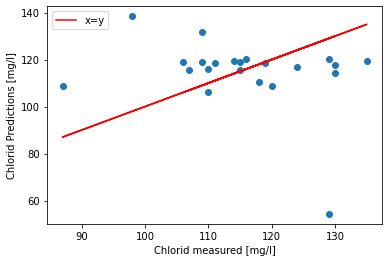

In [12]:
# inverse transform
y_test = scaler_target.inverse_transform(y_test)
yhat = scaler_target.inverse_transform(yhat)

# Scores
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % np.sqrt(mse))
print('R_squared: %.3f' % r2)

plt.figure()
plt.scatter(y_test, yhat)
plt.plot(y_test, y_test, color = 'red', label = 'x=y')
plt.ylabel('Chlorid Predictions [mg/l]')
plt.xlabel('Chlorid measured [mg/l]')
plt.legend()
plt.show()

Das Ergbnis ist an dieser Stelle nicht klar zu interpretieren. Die Fehlerwerte beim MSE und RMSE befinden sich in einem noch akzeptablen Bereich, wenn das Ergebnis einen RMSE Wert von ca 20 aufweist. Allerdings deutet ein negativer R2 Score (liegt normalerweise zwischen 0 und 1) darauf hin, dass das Netz nicht in der Lage ist die Werte vorherzusagen und das Modell nicht funktionert. Auch nach der angewendeten Optimierung scheint das Model nicht in der Lage zu sein, die Chlorid Werte vorherzusagen. Allerdings gibt es auch einige Werte, die auf der Regressionslinie liegen, aber insgesamt sind die Abweichungen schon sehr groß. 

## Datenkorrelation

Um nach dem schlechten Ergebnis die Korrelation zwischen den Daten zu überprüfen wird eine Korrelationsmatrix erstellt und durch eine Heatmap visualisiert. 

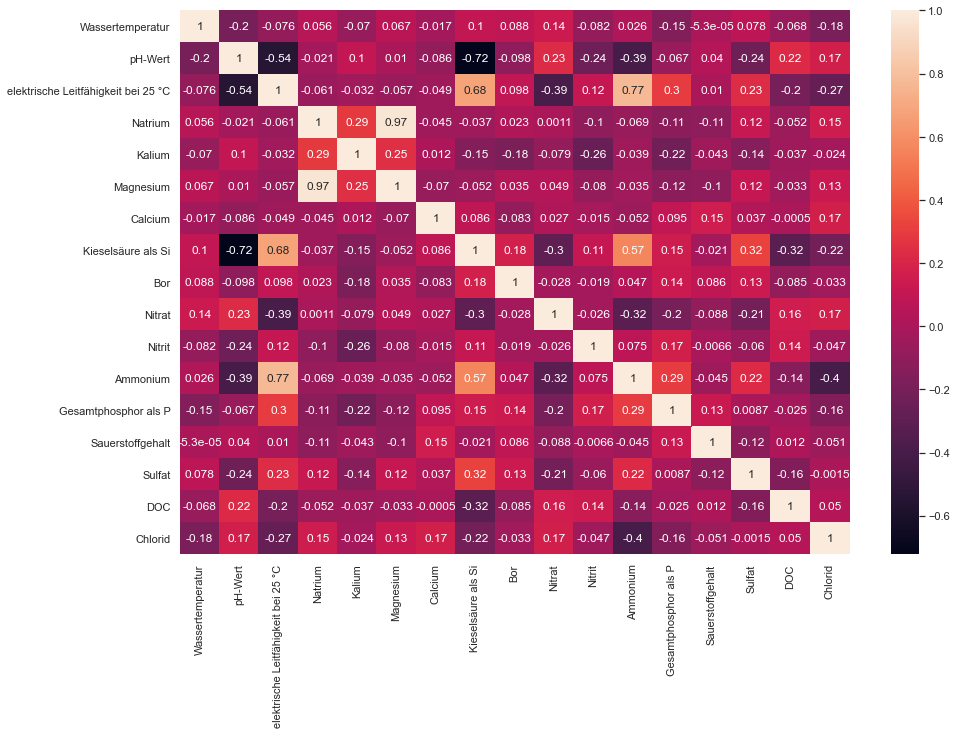

In [13]:
import seaborn as sns
correlation_matrix = data.corr()

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


Das Ergebnis zeigt, dass der Datensatz kaum Korrelationen besitzt. Neben Magnesium und Natrium, die eine Korrelation zueinander aufzuweisen scheinen, korreliert Ammonium mit der elektrischen Leitfähigkeit. 
Chlorid allerdings weist nur sehr kleine Werte und negative Werte bei der Korrelation auf. 

## Andere Methoden
Um die Ergbnisse nochmal zu validieren und andere Methoden am Datensatz zu testen werden die Ergebnisse verschiedener Methoden (SVM, RF) miteinander verglichen und die jeweiligen Metriken ausgewertet.

In [14]:
#Determination of the score and seeds for reproducibility
score = 'neg_root_mean_squared_error'
seed = 42
num_folds = 10

In [15]:
#Setting the X and Y value (Target value and values for prediction) 
X = data.drop(columns='Chlorid')
y = data['Chlorid']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [16]:
# SVM unscaled
svm = SVR(kernel='rbf', gamma='auto')

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_svm = cross_val_score(svm, X_train, Y_train, cv=kfold, scoring=score)
msg = "%f (%f)" % (cv_svm.mean(), cv_svm.std())
print('SVM negative RSME:', msg)

SVM negative RSME: -19.836541 (7.264092)


In [17]:
# SVM scaled
svm_sc = Pipeline([('Scaler', StandardScaler()),('SVM', SVR(kernel='rbf', gamma='auto'))])
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_svm_sc = cross_val_score(svm_sc, X_train, Y_train, cv=kfold, scoring=score)
msg = "%f (%f)" % (cv_svm_sc.mean(), cv_svm_sc.std())
print('SVM(scaled) negative RSME:: ', msg)

SVM(scaled) negative RSME::  -19.631413 (7.342528)


In [18]:
# RF
rf = RandomForestRegressor(random_state=seed)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_rf = cross_val_score(rf, X_train, Y_train, cv=kfold, scoring=score)
msg = "%f (%f)" % (cv_rf.mean(), cv_rf.std())
print('RF negative RSME: :', msg)

RF negative RSME: : -20.182589 (8.746773)


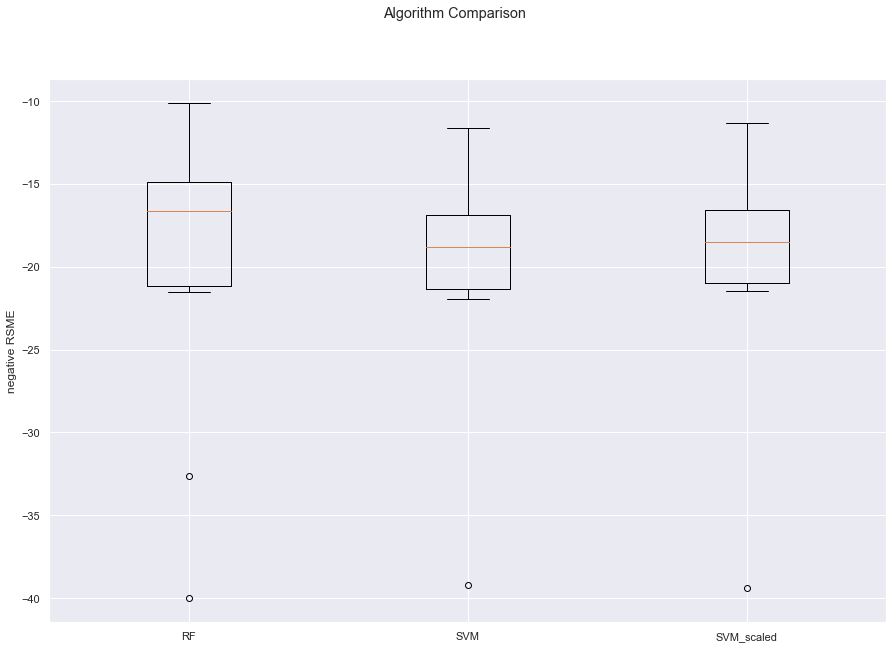

In [19]:
#Display and compare of Results of the above methods 

results = []
results.append(cv_rf)
results.append(cv_svm)
results.append(cv_svm_sc)
# Plotten
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(['RF', 'SVM', 'SVM_scaled'])
ax.set_ylabel('negative RSME')
plt.show()

Mean absolute error: 14.32
Mean squared error: 640.00
Root mean squared error: 25.30
R2-Score: -0.20


Text(0.5, 1.0, 'RandomForrest Predictions')

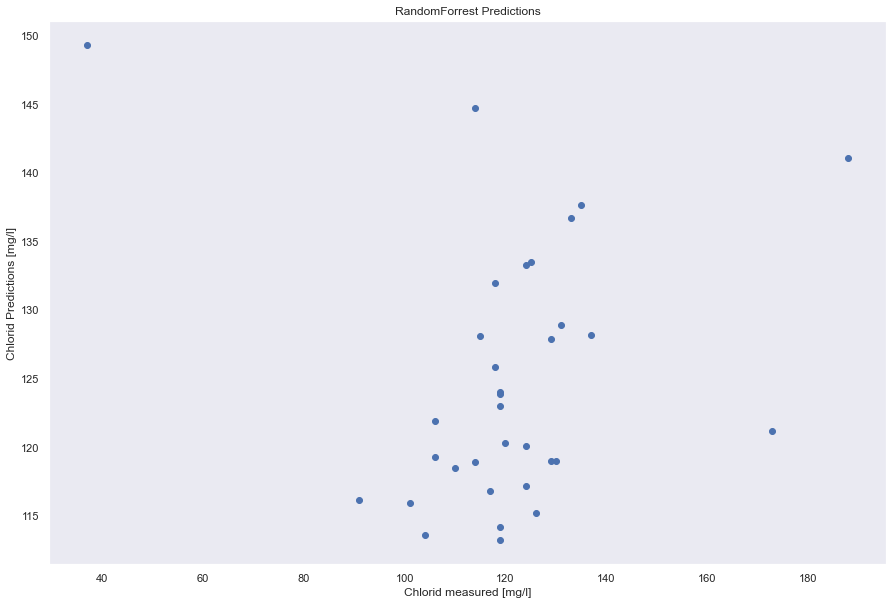

In [20]:
# Make predictions on validation dataset
# Chose the best model
best = RandomForestRegressor(random_state=seed)
best.fit(X_train, Y_train)
predictions = best.predict(X_test)
print("Mean absolute error: %.2f" % (mean_absolute_error(Y_test, predictions)))
print("Mean squared error: %.2f" % (mean_squared_error(Y_test, predictions)))
print("Root mean squared error: %.2f" % (np.sqrt(mean_squared_error(Y_test, predictions))))
print("R2-Score: %.2f" % ((r2_score(Y_test, predictions))))
plt.grid()
plt.scatter(Y_test, predictions)
plt.ylabel('Chlorid Predictions [mg/l]')
plt.xlabel('Chlorid measured [mg/l]')
plt.title('RandomForrest Predictions')

## Interpretation

Beim Vergleich anderer Regressionsmodelle zeigte sich der RF mit den besten Ergebnissen. 
Auch im Vergleich zum KNN zeigt sich eine klare Verbesserung, allerdings nur in Form des R2 Wertes. 
Denn obwohl die statistischen Parameter, der MSE und RMSE, größere Fehler aufweisen als beim KNN, liegt der R2 Score "nur" bei -0.2. Trotzdem ist der Wert hier immer noch negativ, der darauf hinweist, dass es nicht möglich ist den Chloridwert zu bestimmen und die Anpassung des Modells ist schlechter als die Anpassung einer horizontalen Linie.

Zusammenfassend kann man sagen, dass die Modelle nicht in der Lage sind anhand der Grundwasserchemie die Chloridwerte vorherzusagen. Scheinbar sind es doch eher externe Faktoren, die zu einem hohen Chloridgehalt im Rhein und der anliegenden Städte führt. Im Bereich des Mittelrheins kann man vermuten, dass die zusätzliche Salzfracht überwiegend aus dem Zufluss der Mosel stammt.
Für die weitere Vorhersage von Chlorid müssten noch zusätzliche Parameter, wie die Grundwasserhöhe und die mittlere Grundwasserfließrichtung hinzugezogen werden. Allerdings ist die Datenlage hier nicht ausreichend. 